In [3]:
import pynbody
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /home/xiaodongli/projects/mhyl_2pcf/CITAData/output/gadget_015.799

/home/xiaodongli/projects/mhyl_2pcf/CITAData/output/gadget_015.799


### Basic properties of the sample

##### We find 015, 016 files are bascially same.

In [4]:
data = pynbody.load('/home/xiaodongli/projects/mhyl_2pcf/CITAData/output/gadget_015.799')
pos = data['pos']
print pos
print
print
print
data = pynbody.load('/home/xiaodongli/projects/mhyl_2pcf/CITAData/output/gadget_016.799')
pos = data['pos']
print pos

[[9.8192566e+01 9.8158073e+01 7.5048444e+02]
 [9.8312820e+01 9.8707581e+01 7.5050153e+02]
 [9.8498184e+01 9.9037407e+01 7.5146472e+02]
 ...
 [7.7441669e-01 7.9844415e-01 7.9915112e+02]
 [7.9174083e-01 1.0281229e+00 7.9986633e+02]
 [7.8152114e-01 1.0506623e+00 7.9988837e+02]]



[[9.8192566e+01 9.8158073e+01 7.5048444e+02]
 [9.8312820e+01 9.8707581e+01 7.5050153e+02]
 [9.8498184e+01 9.9037407e+01 7.5146472e+02]
 ...
 [7.7441669e-01 7.9844415e-01 7.9915112e+02]
 [7.9174083e-01 1.0281229e+00 7.9986633e+02]
 [7.8152114e-01 1.0506623e+00 7.9988837e+02]]


##### Make a Redshifts.txt file 

In [21]:
om, h, ombh2 = 0.295126, 0.688062, 0.0226
omch2 = om*h**2 - ombh2
print omch2

0.117121300268


In [4]:
data.properties

{'a': 0.9999999999999998,
 'boxsize': Unit("8.00e+02 Mpc a h**-1"),
 'h': 0.688062,
 'omegaL0': 0.704874,
 'omegaM0': 0.295126,
 'time': Unit("9.69e-03 s Mpc a**1/2 h**-1 km**-1")}

In [19]:
(len(data['pos'])*800)**(0.333)

1010.0613124560426

In [5]:
nowf = open('Redshifts.txt', 'w')
for nowid in range(17):
    data = pynbody.load('./CITAData/output/gadget_0%02i'%nowid+'.799')
    prop =  data.properties
    a = prop['a']; z = 1/a -1;
    print 'nowid = ', nowid,  '                     a = ', a, '                    z = ', z
    nowf.write(str(nowid)+' '+str(a)+' '+str(z)+'\n')
nowf.close()
!cat Redshifts.txt

nowid =  0                      a =  0.399999998071                     z =  1.50000001205
nowid =  1                      a =  0.416666668618                     z =  1.39999998876
nowid =  2                      a =  0.434782607778                     z =  1.30000000486
nowid =  3                      a =  0.454545446866                     z =  1.20000003717
nowid =  4                      a =  0.476190478267                     z =  1.09999999084
nowid =  5                      a =  0.499999996749                     z =  1.000000013
nowid =  6                      a =  0.526315788339                     z =  0.900000004097
nowid =  7                      a =  0.555555552722                     z =  0.800000009182
nowid =  8                      a =  0.588235283741                     z =  0.700000029987
nowid =  9                      a =  0.624999994887                     z =  0.600000013088
nowid =  10                      a =  0.666666665526                     z =  0.50000000

### What kind of information available?

In [6]:
data.loadable_keys()

['iord', 'mass', 'pos', 'vel']

### Routhly estimate the size: should be 800 Mpc/h

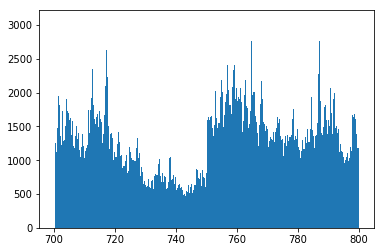

In [7]:
pos = data['pos']
vel = data['vel']
mass = data['mass']
X = [pos[row][2] for row in range(len(pos))]
plt.hist(X, bins=1000);

In [8]:
X = [xx for xx in pos[0]] + [xx for xx in vel[0]] + [mass[0]]
nowstr = ''
for xx in X: nowstr += (str(xx)+' ')
print X
print nowstr
#print [str(xx) for xx in pos[0]]
#print [str(xx) for xx in vel[0]]
#print str(mass[0])

[98.192566, 98.15807, 750.48444, -840.6124, 115.02233, 169.0248, 3.9058788]
98.192566 98.15807 750.48444 -840.6124 115.02233 169.0248 3.9058788 


### Generate a random sample, snap 000 (a=0.4)
    nbar = 5.0e-2 (Mpc/h)^-3
    volume = (800 Mpc/h)**3 
    number = nbar * volume = 2560000
    running over 800 subsamples having 960000000 particles
    we shall take a random ratio 0.0026666666666666666

In [9]:
#!mkdir ./CITAData/subsamples

mkdir: cannot create directory ‘./CITAData/subsamples’: File exists


In [80]:
###################################
### Settings

snapnum = '000'

randratio = 0.0027

randseed = 0

outputfile = './CITAData/subsamples/gadget_'+snapnum+\
    '.rat'+str(0.0027)+'_ranseed'+str(randseed)

###################################
### Run

# names of the 800 files
files = ['./CITAData/output/gadget_'+snapnum+'.'+str(row) 
         for row in range(800) ]

# open outputfile for write
outputf = open(outputfile, 'w')

# open all input files for read & select
np.random.seed(randseed)
num_selected_total = 0
for nowfile in files:
#for nowfile in files:
    data = pynbody.load(nowfile)
    pos, vel, mass = data['pos'], data['vel'], data['mass']
    npar = len(pos); num_selected = 0
    print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
    for ipar in range(npar):
        nowrandom = np.random.uniform()
        if nowrandom < randratio:
            num_selected+=1; num_selected_total +=1
            X = [xx for xx in pos[ipar]] + \
                 [xx for xx in vel[ipar]] # + [mass[ipar]]
            nowstr = ''
            for xx in X: nowstr += (str(xx)+' ')
            outputf.write(nowstr+'\n')
    print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
outputf.close()

Processing 1212196 particles in  file  ./CITAData/output/gadget_000.0 ...
	Done. #-selected (this file, total):  3253 3253
Processing 1373706 particles in  file  ./CITAData/output/gadget_000.1 ...
	Done. #-selected (this file, total):  3741 6994
Processing 1395163 particles in  file  ./CITAData/output/gadget_000.2 ...
	Done. #-selected (this file, total):  3791 10785
Processing 1413307 particles in  file  ./CITAData/output/gadget_000.3 ...
	Done. #-selected (this file, total):  3847 14632
Processing 1324997 particles in  file  ./CITAData/output/gadget_000.4 ...
	Done. #-selected (this file, total):  3647 18279
Processing 1419875 particles in  file  ./CITAData/output/gadget_000.5 ...
	Done. #-selected (this file, total):  3819 22098
Processing 1278950 particles in  file  ./CITAData/output/gadget_000.6 ...
	Done. #-selected (this file, total):  3487 25585
Processing 1451118 particles in  file  ./CITAData/output/gadget_000.7 ...
	Done. #-selected (this file, total):  3952 29537
Processing

	Done. #-selected (this file, total):  3600 239208
Processing 1374329 particles in  file  ./CITAData/output/gadget_000.66 ...
	Done. #-selected (this file, total):  3696 242904
Processing 1481194 particles in  file  ./CITAData/output/gadget_000.67 ...
	Done. #-selected (this file, total):  3994 246898
Processing 1410801 particles in  file  ./CITAData/output/gadget_000.68 ...
	Done. #-selected (this file, total):  3922 250820
Processing 1295180 particles in  file  ./CITAData/output/gadget_000.69 ...
	Done. #-selected (this file, total):  3541 254361
Processing 1238510 particles in  file  ./CITAData/output/gadget_000.70 ...
	Done. #-selected (this file, total):  3346 257707
Processing 1305462 particles in  file  ./CITAData/output/gadget_000.71 ...
	Done. #-selected (this file, total):  3463 261170
Processing 1417620 particles in  file  ./CITAData/output/gadget_000.72 ...
	Done. #-selected (this file, total):  3960 265130
Processing 1337007 particles in  file  ./CITAData/output/gadget_000

	Done. #-selected (this file, total):  3593 474726
Processing 1354864 particles in  file  ./CITAData/output/gadget_000.131 ...
	Done. #-selected (this file, total):  3631 478357
Processing 1403110 particles in  file  ./CITAData/output/gadget_000.132 ...
	Done. #-selected (this file, total):  3759 482116
Processing 1271677 particles in  file  ./CITAData/output/gadget_000.133 ...
	Done. #-selected (this file, total):  3413 485529
Processing 1348969 particles in  file  ./CITAData/output/gadget_000.134 ...
	Done. #-selected (this file, total):  3615 489144
Processing 1353919 particles in  file  ./CITAData/output/gadget_000.135 ...
	Done. #-selected (this file, total):  3614 492758
Processing 1278246 particles in  file  ./CITAData/output/gadget_000.136 ...
	Done. #-selected (this file, total):  3389 496147
Processing 1270473 particles in  file  ./CITAData/output/gadget_000.137 ...
	Done. #-selected (this file, total):  3395 499542
Processing 1428943 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  4029 710549
Processing 1323185 particles in  file  ./CITAData/output/gadget_000.196 ...
	Done. #-selected (this file, total):  3589 714138
Processing 1163417 particles in  file  ./CITAData/output/gadget_000.197 ...
	Done. #-selected (this file, total):  3054 717192
Processing 1325877 particles in  file  ./CITAData/output/gadget_000.198 ...
	Done. #-selected (this file, total):  3578 720770
Processing 1421722 particles in  file  ./CITAData/output/gadget_000.199 ...
	Done. #-selected (this file, total):  3844 724614
Processing 1016654 particles in  file  ./CITAData/output/gadget_000.200 ...
	Done. #-selected (this file, total):  2721 727335
Processing 1376451 particles in  file  ./CITAData/output/gadget_000.201 ...
	Done. #-selected (this file, total):  3603 730938
Processing 1429651 particles in  file  ./CITAData/output/gadget_000.202 ...
	Done. #-selected (this file, total):  3894 734832
Processing 1400595 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  2882 944483
Processing 1216619 particles in  file  ./CITAData/output/gadget_000.261 ...
	Done. #-selected (this file, total):  3283 947766
Processing 1433727 particles in  file  ./CITAData/output/gadget_000.262 ...
	Done. #-selected (this file, total):  3879 951645
Processing 1398894 particles in  file  ./CITAData/output/gadget_000.263 ...
	Done. #-selected (this file, total):  3788 955433
Processing 1382475 particles in  file  ./CITAData/output/gadget_000.264 ...
	Done. #-selected (this file, total):  3694 959127
Processing 1457167 particles in  file  ./CITAData/output/gadget_000.265 ...
	Done. #-selected (this file, total):  3974 963101
Processing 1499385 particles in  file  ./CITAData/output/gadget_000.266 ...
	Done. #-selected (this file, total):  4072 967173
Processing 1230406 particles in  file  ./CITAData/output/gadget_000.267 ...
	Done. #-selected (this file, total):  3393 970566
Processing 1290014 particles in  file  ./CITAData/output/gad

Processing 1492825 particles in  file  ./CITAData/output/gadget_000.325 ...
	Done. #-selected (this file, total):  4053 1179544
Processing 1292008 particles in  file  ./CITAData/output/gadget_000.326 ...
	Done. #-selected (this file, total):  3487 1183031
Processing 1270820 particles in  file  ./CITAData/output/gadget_000.327 ...
	Done. #-selected (this file, total):  3441 1186472
Processing 1329635 particles in  file  ./CITAData/output/gadget_000.328 ...
	Done. #-selected (this file, total):  3620 1190092
Processing 1267871 particles in  file  ./CITAData/output/gadget_000.329 ...
	Done. #-selected (this file, total):  3383 1193475
Processing 1531794 particles in  file  ./CITAData/output/gadget_000.330 ...
	Done. #-selected (this file, total):  4122 1197597
Processing 1437700 particles in  file  ./CITAData/output/gadget_000.331 ...
	Done. #-selected (this file, total):  3897 1201494
Processing 1311605 particles in  file  ./CITAData/output/gadget_000.332 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3595 1411211
Processing 1348720 particles in  file  ./CITAData/output/gadget_000.390 ...
	Done. #-selected (this file, total):  3657 1414868
Processing 1395405 particles in  file  ./CITAData/output/gadget_000.391 ...
	Done. #-selected (this file, total):  3683 1418551
Processing 1240707 particles in  file  ./CITAData/output/gadget_000.392 ...
	Done. #-selected (this file, total):  3343 1421894
Processing 1413001 particles in  file  ./CITAData/output/gadget_000.393 ...
	Done. #-selected (this file, total):  3670 1425564
Processing 1354052 particles in  file  ./CITAData/output/gadget_000.394 ...
	Done. #-selected (this file, total):  3699 1429263
Processing 1469197 particles in  file  ./CITAData/output/gadget_000.395 ...
	Done. #-selected (this file, total):  3959 1433222
Processing 1261958 particles in  file  ./CITAData/output/gadget_000.396 ...
	Done. #-selected (this file, total):  3468 1436690
Processing 1437126 particles in  file  ./CITAData/ou

Processing 1308048 particles in  file  ./CITAData/output/gadget_000.454 ...
	Done. #-selected (this file, total):  3583 1646919
Processing 1076067 particles in  file  ./CITAData/output/gadget_000.455 ...
	Done. #-selected (this file, total):  2984 1649903
Processing 1286291 particles in  file  ./CITAData/output/gadget_000.456 ...
	Done. #-selected (this file, total):  3459 1653362
Processing 1352046 particles in  file  ./CITAData/output/gadget_000.457 ...
	Done. #-selected (this file, total):  3576 1656938
Processing 1439996 particles in  file  ./CITAData/output/gadget_000.458 ...
	Done. #-selected (this file, total):  3884 1660822
Processing 1499454 particles in  file  ./CITAData/output/gadget_000.459 ...
	Done. #-selected (this file, total):  4036 1664858
Processing 1434816 particles in  file  ./CITAData/output/gadget_000.460 ...
	Done. #-selected (this file, total):  3845 1668703
Processing 1237707 particles in  file  ./CITAData/output/gadget_000.461 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3845 1878212
Processing 1312299 particles in  file  ./CITAData/output/gadget_000.519 ...
	Done. #-selected (this file, total):  3584 1881796
Processing 1325748 particles in  file  ./CITAData/output/gadget_000.520 ...
	Done. #-selected (this file, total):  3418 1885214
Processing 1323756 particles in  file  ./CITAData/output/gadget_000.521 ...
	Done. #-selected (this file, total):  3573 1888787
Processing 1434687 particles in  file  ./CITAData/output/gadget_000.522 ...
	Done. #-selected (this file, total):  3884 1892671
Processing 1229057 particles in  file  ./CITAData/output/gadget_000.523 ...
	Done. #-selected (this file, total):  3296 1895967
Processing 1391135 particles in  file  ./CITAData/output/gadget_000.524 ...
	Done. #-selected (this file, total):  3832 1899799
Processing 1402882 particles in  file  ./CITAData/output/gadget_000.525 ...
	Done. #-selected (this file, total):  3838 1903637
Processing 1164755 particles in  file  ./CITAData/ou

Processing 1338721 particles in  file  ./CITAData/output/gadget_000.583 ...
	Done. #-selected (this file, total):  3494 2113717
Processing 1490015 particles in  file  ./CITAData/output/gadget_000.584 ...
	Done. #-selected (this file, total):  3992 2117709
Processing 1291605 particles in  file  ./CITAData/output/gadget_000.585 ...
	Done. #-selected (this file, total):  3467 2121176
Processing 1315946 particles in  file  ./CITAData/output/gadget_000.586 ...
	Done. #-selected (this file, total):  3552 2124728
Processing 1297809 particles in  file  ./CITAData/output/gadget_000.587 ...
	Done. #-selected (this file, total):  3460 2128188
Processing 1257598 particles in  file  ./CITAData/output/gadget_000.588 ...
	Done. #-selected (this file, total):  3367 2131555
Processing 1352477 particles in  file  ./CITAData/output/gadget_000.589 ...
	Done. #-selected (this file, total):  3654 2135209
Processing 1484120 particles in  file  ./CITAData/output/gadget_000.590 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3659 2346179
Processing 1311632 particles in  file  ./CITAData/output/gadget_000.648 ...
	Done. #-selected (this file, total):  3505 2349684
Processing 1296870 particles in  file  ./CITAData/output/gadget_000.649 ...
	Done. #-selected (this file, total):  3473 2353157
Processing 1285939 particles in  file  ./CITAData/output/gadget_000.650 ...
	Done. #-selected (this file, total):  3495 2356652
Processing 1387350 particles in  file  ./CITAData/output/gadget_000.651 ...
	Done. #-selected (this file, total):  3790 2360442
Processing 1342236 particles in  file  ./CITAData/output/gadget_000.652 ...
	Done. #-selected (this file, total):  3560 2364002
Processing 1357427 particles in  file  ./CITAData/output/gadget_000.653 ...
	Done. #-selected (this file, total):  3591 2367593
Processing 1228140 particles in  file  ./CITAData/output/gadget_000.654 ...
	Done. #-selected (this file, total):  3291 2370884
Processing 1401696 particles in  file  ./CITAData/ou

Processing 1389333 particles in  file  ./CITAData/output/gadget_000.712 ...
	Done. #-selected (this file, total):  3687 2580852
Processing 1299507 particles in  file  ./CITAData/output/gadget_000.713 ...
	Done. #-selected (this file, total):  3467 2584319
Processing 1359176 particles in  file  ./CITAData/output/gadget_000.714 ...
	Done. #-selected (this file, total):  3732 2588051
Processing 1300774 particles in  file  ./CITAData/output/gadget_000.715 ...
	Done. #-selected (this file, total):  3540 2591591
Processing 1290097 particles in  file  ./CITAData/output/gadget_000.716 ...
	Done. #-selected (this file, total):  3468 2595059
Processing 1427577 particles in  file  ./CITAData/output/gadget_000.717 ...
	Done. #-selected (this file, total):  3871 2598930
Processing 1284275 particles in  file  ./CITAData/output/gadget_000.718 ...
	Done. #-selected (this file, total):  3531 2602461
Processing 1295518 particles in  file  ./CITAData/output/gadget_000.719 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3826 2812965
Processing 1347390 particles in  file  ./CITAData/output/gadget_000.777 ...
	Done. #-selected (this file, total):  3577 2816542
Processing 1406441 particles in  file  ./CITAData/output/gadget_000.778 ...
	Done. #-selected (this file, total):  3796 2820338
Processing 1177629 particles in  file  ./CITAData/output/gadget_000.779 ...
	Done. #-selected (this file, total):  3043 2823381
Processing 1375029 particles in  file  ./CITAData/output/gadget_000.780 ...
	Done. #-selected (this file, total):  3788 2827169
Processing 1296099 particles in  file  ./CITAData/output/gadget_000.781 ...
	Done. #-selected (this file, total):  3479 2830648
Processing 1449940 particles in  file  ./CITAData/output/gadget_000.782 ...
	Done. #-selected (this file, total):  3923 2834571
Processing 1369249 particles in  file  ./CITAData/output/gadget_000.783 ...
	Done. #-selected (this file, total):  3719 2838290
Processing 1373000 particles in  file  ./CITAData/ou

In [81]:
###################################
### Settings

!sleep 20000

snapnum = '016'

randratio = 0.0027

randseed = 0

outputfile = './CITAData/subsamples/gadget_'+snapnum+\
    '.rat'+str(0.0027)+'_ranseed'+str(randseed)

###################################
### Run

# names of the 800 files
files = ['./CITAData/output/gadget_'+snapnum+'.'+str(row) 
         for row in range(800) ]

# open outputfile for write
outputf = open(outputfile, 'w')

# open all input files for read & select
np.random.seed(randseed)
num_selected_total = 0
for nowfile in files:
#for nowfile in files:
    data = pynbody.load(nowfile)
    pos, vel, mass = data['pos'], data['vel'], data['mass']
    npar = len(pos); num_selected = 0
    print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
    for ipar in range(npar):
        nowrandom = np.random.uniform()
        if nowrandom < randratio:
            num_selected+=1; num_selected_total +=1
            X = [xx for xx in pos[ipar]] + \
                 [xx for xx in vel[ipar]] # + [mass[ipar]]
            nowstr = ''
            for xx in X: nowstr += (str(xx)+' ')
            outputf.write(nowstr+'\n')
    print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
outputf.close()

Processing 1004102 particles in  file  ./CITAData/output/gadget_016.0 ...
	Done. #-selected (this file, total):  2702 2702
Processing 1323392 particles in  file  ./CITAData/output/gadget_016.1 ...
	Done. #-selected (this file, total):  3624 6326
Processing 1577143 particles in  file  ./CITAData/output/gadget_016.2 ...
	Done. #-selected (this file, total):  4251 10577
Processing 1554162 particles in  file  ./CITAData/output/gadget_016.3 ...
	Done. #-selected (this file, total):  4226 14803
Processing 1690244 particles in  file  ./CITAData/output/gadget_016.4 ...
	Done. #-selected (this file, total):  4599 19402
Processing 1228364 particles in  file  ./CITAData/output/gadget_016.5 ...
	Done. #-selected (this file, total):  3349 22751
Processing 1384988 particles in  file  ./CITAData/output/gadget_016.6 ...
	Done. #-selected (this file, total):  3816 26567
Processing 1453179 particles in  file  ./CITAData/output/gadget_016.7 ...
	Done. #-selected (this file, total):  3896 30463
Processing

	Done. #-selected (this file, total):  3549 238775
Processing 1477422 particles in  file  ./CITAData/output/gadget_016.66 ...
	Done. #-selected (this file, total):  3987 242762
Processing 1615152 particles in  file  ./CITAData/output/gadget_016.67 ...
	Done. #-selected (this file, total):  4377 247139
Processing 1226481 particles in  file  ./CITAData/output/gadget_016.68 ...
	Done. #-selected (this file, total):  3385 250524
Processing 1444408 particles in  file  ./CITAData/output/gadget_016.69 ...
	Done. #-selected (this file, total):  3992 254516
Processing 1010976 particles in  file  ./CITAData/output/gadget_016.70 ...
	Done. #-selected (this file, total):  2720 257236
Processing 1443780 particles in  file  ./CITAData/output/gadget_016.71 ...
	Done. #-selected (this file, total):  3810 261046
Processing 1422365 particles in  file  ./CITAData/output/gadget_016.72 ...
	Done. #-selected (this file, total):  3984 265030
Processing 1128196 particles in  file  ./CITAData/output/gadget_016

	Done. #-selected (this file, total):  4230 474931
Processing 1361994 particles in  file  ./CITAData/output/gadget_016.131 ...
	Done. #-selected (this file, total):  3661 478592
Processing 1152525 particles in  file  ./CITAData/output/gadget_016.132 ...
	Done. #-selected (this file, total):  3070 481662
Processing 1407446 particles in  file  ./CITAData/output/gadget_016.133 ...
	Done. #-selected (this file, total):  3776 485438
Processing 1471315 particles in  file  ./CITAData/output/gadget_016.134 ...
	Done. #-selected (this file, total):  3938 489376
Processing 1044381 particles in  file  ./CITAData/output/gadget_016.135 ...
	Done. #-selected (this file, total):  2806 492182
Processing 1223161 particles in  file  ./CITAData/output/gadget_016.136 ...
	Done. #-selected (this file, total):  3218 495400
Processing 1297760 particles in  file  ./CITAData/output/gadget_016.137 ...
	Done. #-selected (this file, total):  3462 498862
Processing 1628576 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  4265 712296
Processing 1175485 particles in  file  ./CITAData/output/gadget_016.196 ...
	Done. #-selected (this file, total):  3150 715446
Processing 863660 particles in  file  ./CITAData/output/gadget_016.197 ...
	Done. #-selected (this file, total):  2320 717766
Processing 1463834 particles in  file  ./CITAData/output/gadget_016.198 ...
	Done. #-selected (this file, total):  3986 721752
Processing 1273515 particles in  file  ./CITAData/output/gadget_016.199 ...
	Done. #-selected (this file, total):  3409 725161
Processing 736568 particles in  file  ./CITAData/output/gadget_016.200 ...
	Done. #-selected (this file, total):  2008 727169
Processing 1152988 particles in  file  ./CITAData/output/gadget_016.201 ...
	Done. #-selected (this file, total):  2973 730142
Processing 1281310 particles in  file  ./CITAData/output/gadget_016.202 ...
	Done. #-selected (this file, total):  3436 733578
Processing 1603657 particles in  file  ./CITAData/output/gadge

	Done. #-selected (this file, total):  3988 945737
Processing 741961 particles in  file  ./CITAData/output/gadget_016.261 ...
	Done. #-selected (this file, total):  1981 947718
Processing 957240 particles in  file  ./CITAData/output/gadget_016.262 ...
	Done. #-selected (this file, total):  2593 950311
Processing 1503809 particles in  file  ./CITAData/output/gadget_016.263 ...
	Done. #-selected (this file, total):  4032 954343
Processing 1452120 particles in  file  ./CITAData/output/gadget_016.264 ...
	Done. #-selected (this file, total):  3921 958264
Processing 1512529 particles in  file  ./CITAData/output/gadget_016.265 ...
	Done. #-selected (this file, total):  4109 962373
Processing 1627678 particles in  file  ./CITAData/output/gadget_016.266 ...
	Done. #-selected (this file, total):  4417 966790
Processing 1609084 particles in  file  ./CITAData/output/gadget_016.267 ...
	Done. #-selected (this file, total):  4445 971235
Processing 1370679 particles in  file  ./CITAData/output/gadge

	Done. #-selected (this file, total):  4267 1180225
Processing 1218247 particles in  file  ./CITAData/output/gadget_016.326 ...
	Done. #-selected (this file, total):  3278 1183503
Processing 1200661 particles in  file  ./CITAData/output/gadget_016.327 ...
	Done. #-selected (this file, total):  3237 1186740
Processing 1429099 particles in  file  ./CITAData/output/gadget_016.328 ...
	Done. #-selected (this file, total):  3861 1190601
Processing 767998 particles in  file  ./CITAData/output/gadget_016.329 ...
	Done. #-selected (this file, total):  2045 1192646
Processing 2017226 particles in  file  ./CITAData/output/gadget_016.330 ...
	Done. #-selected (this file, total):  5474 1198120
Processing 1813933 particles in  file  ./CITAData/output/gadget_016.331 ...
	Done. #-selected (this file, total):  4918 1203038
Processing 1194354 particles in  file  ./CITAData/output/gadget_016.332 ...
	Done. #-selected (this file, total):  3206 1206244
Processing 1133200 particles in  file  ./CITAData/out

	Done. #-selected (this file, total):  3154 1414873
Processing 1319378 particles in  file  ./CITAData/output/gadget_016.391 ...
	Done. #-selected (this file, total):  3485 1418358
Processing 1428181 particles in  file  ./CITAData/output/gadget_016.392 ...
	Done. #-selected (this file, total):  3809 1422167
Processing 1326194 particles in  file  ./CITAData/output/gadget_016.393 ...
	Done. #-selected (this file, total):  3484 1425651
Processing 1632304 particles in  file  ./CITAData/output/gadget_016.394 ...
	Done. #-selected (this file, total):  4467 1430118
Processing 1162974 particles in  file  ./CITAData/output/gadget_016.395 ...
	Done. #-selected (this file, total):  3103 1433221
Processing 1380510 particles in  file  ./CITAData/output/gadget_016.396 ...
	Done. #-selected (this file, total):  3770 1436991
Processing 1029636 particles in  file  ./CITAData/output/gadget_016.397 ...
	Done. #-selected (this file, total):  2753 1439744
Processing 1468011 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  3706 1649413
Processing 1494168 particles in  file  ./CITAData/output/gadget_016.456 ...
	Done. #-selected (this file, total):  4028 1653441
Processing 1822036 particles in  file  ./CITAData/output/gadget_016.457 ...
	Done. #-selected (this file, total):  4862 1658303
Processing 1443339 particles in  file  ./CITAData/output/gadget_016.458 ...
	Done. #-selected (this file, total):  3862 1662165
Processing 1279121 particles in  file  ./CITAData/output/gadget_016.459 ...
	Done. #-selected (this file, total):  3449 1665614
Processing 1429316 particles in  file  ./CITAData/output/gadget_016.460 ...
	Done. #-selected (this file, total):  3852 1669466
Processing 1175085 particles in  file  ./CITAData/output/gadget_016.461 ...
	Done. #-selected (this file, total):  3144 1672610
Processing 1191986 particles in  file  ./CITAData/output/gadget_016.462 ...
	Done. #-selected (this file, total):  3241 1675851
Processing 951834 particles in  file  ./CITAData/out

Processing 1446243 particles in  file  ./CITAData/output/gadget_016.520 ...
	Done. #-selected (this file, total):  3709 1886061
Processing 1416419 particles in  file  ./CITAData/output/gadget_016.521 ...
	Done. #-selected (this file, total):  3859 1889920
Processing 1407076 particles in  file  ./CITAData/output/gadget_016.522 ...
	Done. #-selected (this file, total):  3768 1893688
Processing 1017863 particles in  file  ./CITAData/output/gadget_016.523 ...
	Done. #-selected (this file, total):  2751 1896439
Processing 1532309 particles in  file  ./CITAData/output/gadget_016.524 ...
	Done. #-selected (this file, total):  4195 1900634
Processing 1423305 particles in  file  ./CITAData/output/gadget_016.525 ...
	Done. #-selected (this file, total):  3956 1904590
Processing 1004881 particles in  file  ./CITAData/output/gadget_016.526 ...
	Done. #-selected (this file, total):  2784 1907374
Processing 1280343 particles in  file  ./CITAData/output/gadget_016.527 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3477 2117591
Processing 1470446 particles in  file  ./CITAData/output/gadget_016.585 ...
	Done. #-selected (this file, total):  3917 2121508
Processing 1216851 particles in  file  ./CITAData/output/gadget_016.586 ...
	Done. #-selected (this file, total):  3314 2124822
Processing 1289776 particles in  file  ./CITAData/output/gadget_016.587 ...
	Done. #-selected (this file, total):  3439 2128261
Processing 1345037 particles in  file  ./CITAData/output/gadget_016.588 ...
	Done. #-selected (this file, total):  3595 2131856
Processing 1193343 particles in  file  ./CITAData/output/gadget_016.589 ...
	Done. #-selected (this file, total):  3216 2135072
Processing 1729029 particles in  file  ./CITAData/output/gadget_016.590 ...
	Done. #-selected (this file, total):  4645 2139717
Processing 1553454 particles in  file  ./CITAData/output/gadget_016.591 ...
	Done. #-selected (this file, total):  4131 2143848
Processing 1239499 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  3263 2353360
Processing 1303642 particles in  file  ./CITAData/output/gadget_016.650 ...
	Done. #-selected (this file, total):  3540 2356900
Processing 986958 particles in  file  ./CITAData/output/gadget_016.651 ...
	Done. #-selected (this file, total):  2693 2359593
Processing 1624647 particles in  file  ./CITAData/output/gadget_016.652 ...
	Done. #-selected (this file, total):  4351 2363944
Processing 1474801 particles in  file  ./CITAData/output/gadget_016.653 ...
	Done. #-selected (this file, total):  3875 2367819
Processing 1378919 particles in  file  ./CITAData/output/gadget_016.654 ...
	Done. #-selected (this file, total):  3705 2371524
Processing 1138923 particles in  file  ./CITAData/output/gadget_016.655 ...
	Done. #-selected (this file, total):  3049 2374573
Processing 1460476 particles in  file  ./CITAData/output/gadget_016.656 ...
	Done. #-selected (this file, total):  4051 2378624
Processing 1564420 particles in  file  ./CITAData/out

	Done. #-selected (this file, total):  3271 2588084
Processing 1099442 particles in  file  ./CITAData/output/gadget_016.715 ...
	Done. #-selected (this file, total):  3021 2591105
Processing 1542237 particles in  file  ./CITAData/output/gadget_016.716 ...
	Done. #-selected (this file, total):  4138 2595243
Processing 1284694 particles in  file  ./CITAData/output/gadget_016.717 ...
	Done. #-selected (this file, total):  3470 2598713
Processing 1395875 particles in  file  ./CITAData/output/gadget_016.718 ...
	Done. #-selected (this file, total):  3833 2602546
Processing 1412656 particles in  file  ./CITAData/output/gadget_016.719 ...
	Done. #-selected (this file, total):  3895 2606441
Processing 1106779 particles in  file  ./CITAData/output/gadget_016.720 ...
	Done. #-selected (this file, total):  2927 2609368
Processing 1364517 particles in  file  ./CITAData/output/gadget_016.721 ...
	Done. #-selected (this file, total):  3705 2613073
Processing 1651734 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  1834 2822923
Processing 1276143 particles in  file  ./CITAData/output/gadget_016.780 ...
	Done. #-selected (this file, total):  3455 2826378
Processing 1407719 particles in  file  ./CITAData/output/gadget_016.781 ...
	Done. #-selected (this file, total):  3804 2830182
Processing 1559525 particles in  file  ./CITAData/output/gadget_016.782 ...
	Done. #-selected (this file, total):  4242 2834424
Processing 1496308 particles in  file  ./CITAData/output/gadget_016.783 ...
	Done. #-selected (this file, total):  4030 2838454
Processing 1416625 particles in  file  ./CITAData/output/gadget_016.784 ...
	Done. #-selected (this file, total):  3870 2842324
Processing 1159385 particles in  file  ./CITAData/output/gadget_016.785 ...
	Done. #-selected (this file, total):  3020 2845344
Processing 1111485 particles in  file  ./CITAData/output/gadget_016.786 ...
	Done. #-selected (this file, total):  2943 2848287
Processing 1325824 particles in  file  ./CITAData/ou

In [10]:
for snapnum in ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015']: 

    randratio = 0.0027

    randseed = 0

    outputfile = './CITAData/subsamples/gadget_'+snapnum+\
    '.rat'+str(0.0027)+'_ranseed'+str(randseed)

###################################
### Run

# names of the 800 files
    files = ['./CITAData/output/gadget_'+snapnum+'.'+str(row) 
         for row in range(800) ]

# open outputfile for write
    outputf = open(outputfile, 'w')

# open all input files for read & select
    np.random.seed(randseed)
    num_selected_total = 0
    for nowfile in files:
#for nowfile in files:
        data = pynbody.load(nowfile)
        pos, vel, mass = data['pos'], data['vel'], data['mass']
        npar = len(pos); num_selected = 0
        print 'Processing', npar, 'particles in  file ', nowfile, '...'
    ## 枚举所有particle
        for ipar in range(npar):
            nowrandom = np.random.uniform()
            if nowrandom < randratio:
                num_selected+=1; num_selected_total +=1
                X = [xx for xx in pos[ipar]] + \
                 [xx for xx in vel[ipar]] # + [mass[ipar]]
                nowstr = ''
                for xx in X: nowstr += (str(xx)+' ')
                outputf.write(nowstr+'\n')
        print '\tDone. #-selected (this file, total): ', num_selected, num_selected_total

# Finish.
    outputf.close()

Processing 1216201 particles in  file  ./CITAData/output/gadget_001.0 ...
	Done. #-selected (this file, total):  3264 3264
Processing 1372220 particles in  file  ./CITAData/output/gadget_001.1 ...
	Done. #-selected (this file, total):  3733 6997
Processing 1388853 particles in  file  ./CITAData/output/gadget_001.2 ...
	Done. #-selected (this file, total):  3778 10775
Processing 1407384 particles in  file  ./CITAData/output/gadget_001.3 ...
	Done. #-selected (this file, total):  3829 14604
Processing 1321683 particles in  file  ./CITAData/output/gadget_001.4 ...
	Done. #-selected (this file, total):  3638 18242
Processing 1415591 particles in  file  ./CITAData/output/gadget_001.5 ...
	Done. #-selected (this file, total):  3810 22052
Processing 1279720 particles in  file  ./CITAData/output/gadget_001.6 ...
	Done. #-selected (this file, total):  3486 25538
Processing 1449045 particles in  file  ./CITAData/output/gadget_001.7 ...
	Done. #-selected (this file, total):  3947 29485
Processing

	Done. #-selected (this file, total):  3643 239118
Processing 1360810 particles in  file  ./CITAData/output/gadget_001.66 ...
	Done. #-selected (this file, total):  3657 242775
Processing 1481451 particles in  file  ./CITAData/output/gadget_001.67 ...
	Done. #-selected (this file, total):  4004 246779
Processing 1434417 particles in  file  ./CITAData/output/gadget_001.68 ...
	Done. #-selected (this file, total):  3974 250753
Processing 1296628 particles in  file  ./CITAData/output/gadget_001.69 ...
	Done. #-selected (this file, total):  3550 254303
Processing 1228518 particles in  file  ./CITAData/output/gadget_001.70 ...
	Done. #-selected (this file, total):  3329 257632
Processing 1276026 particles in  file  ./CITAData/output/gadget_001.71 ...
	Done. #-selected (this file, total):  3366 260998
Processing 1407383 particles in  file  ./CITAData/output/gadget_001.72 ...
	Done. #-selected (this file, total):  3913 264911
Processing 1323140 particles in  file  ./CITAData/output/gadget_001

	Done. #-selected (this file, total):  3541 474515
Processing 1378772 particles in  file  ./CITAData/output/gadget_001.131 ...
	Done. #-selected (this file, total):  3677 478192
Processing 1415456 particles in  file  ./CITAData/output/gadget_001.132 ...
	Done. #-selected (this file, total):  3808 482000
Processing 1273780 particles in  file  ./CITAData/output/gadget_001.133 ...
	Done. #-selected (this file, total):  3406 485406
Processing 1378497 particles in  file  ./CITAData/output/gadget_001.134 ...
	Done. #-selected (this file, total):  3704 489110
Processing 1354311 particles in  file  ./CITAData/output/gadget_001.135 ...
	Done. #-selected (this file, total):  3599 492709
Processing 1281811 particles in  file  ./CITAData/output/gadget_001.136 ...
	Done. #-selected (this file, total):  3409 496118
Processing 1243791 particles in  file  ./CITAData/output/gadget_001.137 ...
	Done. #-selected (this file, total):  3317 499435
Processing 1412461 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  4075 710588
Processing 1298961 particles in  file  ./CITAData/output/gadget_001.196 ...
	Done. #-selected (this file, total):  3524 714112
Processing 1170505 particles in  file  ./CITAData/output/gadget_001.197 ...
	Done. #-selected (this file, total):  3068 717180
Processing 1329942 particles in  file  ./CITAData/output/gadget_001.198 ...
	Done. #-selected (this file, total):  3592 720772
Processing 1423386 particles in  file  ./CITAData/output/gadget_001.199 ...
	Done. #-selected (this file, total):  3847 724619
Processing 957271 particles in  file  ./CITAData/output/gadget_001.200 ...
	Done. #-selected (this file, total):  2588 727207
Processing 1409559 particles in  file  ./CITAData/output/gadget_001.201 ...
	Done. #-selected (this file, total):  3668 730875
Processing 1419711 particles in  file  ./CITAData/output/gadget_001.202 ...
	Done. #-selected (this file, total):  3866 734741
Processing 1349454 particles in  file  ./CITAData/output/gadg

	Done. #-selected (this file, total):  2805 944464
Processing 1202276 particles in  file  ./CITAData/output/gadget_001.261 ...
	Done. #-selected (this file, total):  3245 947709
Processing 1413884 particles in  file  ./CITAData/output/gadget_001.262 ...
	Done. #-selected (this file, total):  3831 951540
Processing 1434415 particles in  file  ./CITAData/output/gadget_001.263 ...
	Done. #-selected (this file, total):  3879 955419
Processing 1346923 particles in  file  ./CITAData/output/gadget_001.264 ...
	Done. #-selected (this file, total):  3602 959021
Processing 1477179 particles in  file  ./CITAData/output/gadget_001.265 ...
	Done. #-selected (this file, total):  4032 963053
Processing 1507329 particles in  file  ./CITAData/output/gadget_001.266 ...
	Done. #-selected (this file, total):  4081 967134
Processing 1249231 particles in  file  ./CITAData/output/gadget_001.267 ...
	Done. #-selected (this file, total):  3443 970577
Processing 1325762 particles in  file  ./CITAData/output/gad

Processing 1502375 particles in  file  ./CITAData/output/gadget_001.325 ...
	Done. #-selected (this file, total):  4083 1179825
Processing 1241308 particles in  file  ./CITAData/output/gadget_001.326 ...
	Done. #-selected (this file, total):  3344 1183169
Processing 1307621 particles in  file  ./CITAData/output/gadget_001.327 ...
	Done. #-selected (this file, total):  3550 1186719
Processing 1244101 particles in  file  ./CITAData/output/gadget_001.328 ...
	Done. #-selected (this file, total):  3389 1190108
Processing 1226068 particles in  file  ./CITAData/output/gadget_001.329 ...
	Done. #-selected (this file, total):  3266 1193374
Processing 1536976 particles in  file  ./CITAData/output/gadget_001.330 ...
	Done. #-selected (this file, total):  4139 1197513
Processing 1466469 particles in  file  ./CITAData/output/gadget_001.331 ...
	Done. #-selected (this file, total):  3977 1201490
Processing 1313139 particles in  file  ./CITAData/output/gadget_001.332 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3683 1411322
Processing 1320592 particles in  file  ./CITAData/output/gadget_001.390 ...
	Done. #-selected (this file, total):  3596 1414918
Processing 1429545 particles in  file  ./CITAData/output/gadget_001.391 ...
	Done. #-selected (this file, total):  3755 1418673
Processing 1234781 particles in  file  ./CITAData/output/gadget_001.392 ...
	Done. #-selected (this file, total):  3329 1422002
Processing 1383509 particles in  file  ./CITAData/output/gadget_001.393 ...
	Done. #-selected (this file, total):  3623 1425625
Processing 1340626 particles in  file  ./CITAData/output/gadget_001.394 ...
	Done. #-selected (this file, total):  3655 1429280
Processing 1465120 particles in  file  ./CITAData/output/gadget_001.395 ...
	Done. #-selected (this file, total):  3948 1433228
Processing 1226483 particles in  file  ./CITAData/output/gadget_001.396 ...
	Done. #-selected (this file, total):  3387 1436615
Processing 1435838 particles in  file  ./CITAData/ou

Processing 1289919 particles in  file  ./CITAData/output/gadget_001.454 ...
	Done. #-selected (this file, total):  3527 1646824
Processing 1049482 particles in  file  ./CITAData/output/gadget_001.455 ...
	Done. #-selected (this file, total):  2912 1649736
Processing 1296192 particles in  file  ./CITAData/output/gadget_001.456 ...
	Done. #-selected (this file, total):  3459 1653195
Processing 1380834 particles in  file  ./CITAData/output/gadget_001.457 ...
	Done. #-selected (this file, total):  3697 1656892
Processing 1469479 particles in  file  ./CITAData/output/gadget_001.458 ...
	Done. #-selected (this file, total):  3942 1660834
Processing 1499323 particles in  file  ./CITAData/output/gadget_001.459 ...
	Done. #-selected (this file, total):  4037 1664871
Processing 1405885 particles in  file  ./CITAData/output/gadget_001.460 ...
	Done. #-selected (this file, total):  3769 1668640
Processing 1243674 particles in  file  ./CITAData/output/gadget_001.461 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3950 1878275
Processing 1340538 particles in  file  ./CITAData/output/gadget_001.519 ...
	Done. #-selected (this file, total):  3667 1881942
Processing 1349412 particles in  file  ./CITAData/output/gadget_001.520 ...
	Done. #-selected (this file, total):  3473 1885415
Processing 1297687 particles in  file  ./CITAData/output/gadget_001.521 ...
	Done. #-selected (this file, total):  3511 1888926
Processing 1443676 particles in  file  ./CITAData/output/gadget_001.522 ...
	Done. #-selected (this file, total):  3899 1892825
Processing 1264558 particles in  file  ./CITAData/output/gadget_001.523 ...
	Done. #-selected (this file, total):  3409 1896234
Processing 1397222 particles in  file  ./CITAData/output/gadget_001.524 ...
	Done. #-selected (this file, total):  3834 1900068
Processing 1346511 particles in  file  ./CITAData/output/gadget_001.525 ...
	Done. #-selected (this file, total):  3698 1903766
Processing 1180856 particles in  file  ./CITAData/ou

Processing 1357780 particles in  file  ./CITAData/output/gadget_001.583 ...
	Done. #-selected (this file, total):  3536 2113737
Processing 1478480 particles in  file  ./CITAData/output/gadget_001.584 ...
	Done. #-selected (this file, total):  3966 2117703
Processing 1306297 particles in  file  ./CITAData/output/gadget_001.585 ...
	Done. #-selected (this file, total):  3494 2121197
Processing 1308824 particles in  file  ./CITAData/output/gadget_001.586 ...
	Done. #-selected (this file, total):  3545 2124742
Processing 1310597 particles in  file  ./CITAData/output/gadget_001.587 ...
	Done. #-selected (this file, total):  3499 2128241
Processing 1247829 particles in  file  ./CITAData/output/gadget_001.588 ...
	Done. #-selected (this file, total):  3333 2131574
Processing 1337832 particles in  file  ./CITAData/output/gadget_001.589 ...
	Done. #-selected (this file, total):  3616 2135190
Processing 1488449 particles in  file  ./CITAData/output/gadget_001.590 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3723 2346116
Processing 1323200 particles in  file  ./CITAData/output/gadget_001.648 ...
	Done. #-selected (this file, total):  3538 2349654
Processing 1313303 particles in  file  ./CITAData/output/gadget_001.649 ...
	Done. #-selected (this file, total):  3518 2353172
Processing 1262359 particles in  file  ./CITAData/output/gadget_001.650 ...
	Done. #-selected (this file, total):  3434 2356606
Processing 1426630 particles in  file  ./CITAData/output/gadget_001.651 ...
	Done. #-selected (this file, total):  3899 2360505
Processing 1319117 particles in  file  ./CITAData/output/gadget_001.652 ...
	Done. #-selected (this file, total):  3500 2364005
Processing 1384135 particles in  file  ./CITAData/output/gadget_001.653 ...
	Done. #-selected (this file, total):  3661 2367666
Processing 1226206 particles in  file  ./CITAData/output/gadget_001.654 ...
	Done. #-selected (this file, total):  3290 2370956
Processing 1397975 particles in  file  ./CITAData/ou

Processing 1441020 particles in  file  ./CITAData/output/gadget_001.712 ...
	Done. #-selected (this file, total):  3801 2580928
Processing 1300238 particles in  file  ./CITAData/output/gadget_001.713 ...
	Done. #-selected (this file, total):  3462 2584390
Processing 1358384 particles in  file  ./CITAData/output/gadget_001.714 ...
	Done. #-selected (this file, total):  3733 2588123
Processing 1298975 particles in  file  ./CITAData/output/gadget_001.715 ...
	Done. #-selected (this file, total):  3519 2591642
Processing 1267322 particles in  file  ./CITAData/output/gadget_001.716 ...
	Done. #-selected (this file, total):  3425 2595067
Processing 1423589 particles in  file  ./CITAData/output/gadget_001.717 ...
	Done. #-selected (this file, total):  3860 2598927
Processing 1308381 particles in  file  ./CITAData/output/gadget_001.718 ...
	Done. #-selected (this file, total):  3589 2602516
Processing 1295411 particles in  file  ./CITAData/output/gadget_001.719 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3860 2813062
Processing 1354339 particles in  file  ./CITAData/output/gadget_001.777 ...
	Done. #-selected (this file, total):  3590 2816652
Processing 1430518 particles in  file  ./CITAData/output/gadget_001.778 ...
	Done. #-selected (this file, total):  3879 2820531
Processing 1113498 particles in  file  ./CITAData/output/gadget_001.779 ...
	Done. #-selected (this file, total):  2858 2823389
Processing 1374669 particles in  file  ./CITAData/output/gadget_001.780 ...
	Done. #-selected (this file, total):  3782 2827171
Processing 1298771 particles in  file  ./CITAData/output/gadget_001.781 ...
	Done. #-selected (this file, total):  3490 2830661
Processing 1484712 particles in  file  ./CITAData/output/gadget_001.782 ...
	Done. #-selected (this file, total):  4016 2834677
Processing 1369837 particles in  file  ./CITAData/output/gadget_001.783 ...
	Done. #-selected (this file, total):  3709 2838386
Processing 1370175 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  3576 152354
Processing 1595252 particles in  file  ./CITAData/output/gadget_002.42 ...
	Done. #-selected (this file, total):  4308 156662
Processing 1305485 particles in  file  ./CITAData/output/gadget_002.43 ...
	Done. #-selected (this file, total):  3498 160160
Processing 1230843 particles in  file  ./CITAData/output/gadget_002.44 ...
	Done. #-selected (this file, total):  3291 163451
Processing 1392080 particles in  file  ./CITAData/output/gadget_002.45 ...
	Done. #-selected (this file, total):  3656 167107
Processing 1216740 particles in  file  ./CITAData/output/gadget_002.46 ...
	Done. #-selected (this file, total):  3214 170321
Processing 1407196 particles in  file  ./CITAData/output/gadget_002.47 ...
	Done. #-selected (this file, total):  3897 174218
Processing 1375247 particles in  file  ./CITAData/output/gadget_002.48 ...
	Done. #-selected (this file, total):  3651 177869
Processing 1417756 particles in  file  ./CITAData/output/gadget_002

	Done. #-selected (this file, total):  3714 387752
Processing 1314887 particles in  file  ./CITAData/output/gadget_002.107 ...
	Done. #-selected (this file, total):  3466 391218
Processing 1395896 particles in  file  ./CITAData/output/gadget_002.108 ...
	Done. #-selected (this file, total):  3696 394914
Processing 1399617 particles in  file  ./CITAData/output/gadget_002.109 ...
	Done. #-selected (this file, total):  3785 398699
Processing 1445556 particles in  file  ./CITAData/output/gadget_002.110 ...
	Done. #-selected (this file, total):  3830 402529
Processing 1254760 particles in  file  ./CITAData/output/gadget_002.111 ...
	Done. #-selected (this file, total):  3374 405903
Processing 1289520 particles in  file  ./CITAData/output/gadget_002.112 ...
	Done. #-selected (this file, total):  3500 409403
Processing 1269649 particles in  file  ./CITAData/output/gadget_002.113 ...
	Done. #-selected (this file, total):  3473 412876
Processing 1377638 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3680 623050
Processing 1359068 particles in  file  ./CITAData/output/gadget_002.172 ...
	Done. #-selected (this file, total):  3695 626745
Processing 1289169 particles in  file  ./CITAData/output/gadget_002.173 ...
	Done. #-selected (this file, total):  3487 630232
Processing 1145093 particles in  file  ./CITAData/output/gadget_002.174 ...
	Done. #-selected (this file, total):  3021 633253
Processing 1405830 particles in  file  ./CITAData/output/gadget_002.175 ...
	Done. #-selected (this file, total):  3726 636979
Processing 1448832 particles in  file  ./CITAData/output/gadget_002.176 ...
	Done. #-selected (this file, total):  3849 640828
Processing 1428470 particles in  file  ./CITAData/output/gadget_002.177 ...
	Done. #-selected (this file, total):  3803 644631
Processing 1311284 particles in  file  ./CITAData/output/gadget_002.178 ...
	Done. #-selected (this file, total):  3402 648033
Processing 1429089 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  4193 858082
Processing 1450065 particles in  file  ./CITAData/output/gadget_002.237 ...
	Done. #-selected (this file, total):  3982 862064
Processing 1279710 particles in  file  ./CITAData/output/gadget_002.238 ...
	Done. #-selected (this file, total):  3350 865414
Processing 1206671 particles in  file  ./CITAData/output/gadget_002.239 ...
	Done. #-selected (this file, total):  3260 868674
Processing 1414784 particles in  file  ./CITAData/output/gadget_002.240 ...
	Done. #-selected (this file, total):  3871 872545
Processing 1335922 particles in  file  ./CITAData/output/gadget_002.241 ...
	Done. #-selected (this file, total):  3473 876018
Processing 1198640 particles in  file  ./CITAData/output/gadget_002.242 ...
	Done. #-selected (this file, total):  3186 879204
Processing 1427275 particles in  file  ./CITAData/output/gadget_002.243 ...
	Done. #-selected (this file, total):  3846 883050
Processing 1337781 particles in  file  ./CITAData/output/gad

Processing 1409739 particles in  file  ./CITAData/output/gadget_002.301 ...
	Done. #-selected (this file, total):  3748 1092885
Processing 1377220 particles in  file  ./CITAData/output/gadget_002.302 ...
	Done. #-selected (this file, total):  3659 1096544
Processing 1222213 particles in  file  ./CITAData/output/gadget_002.303 ...
	Done. #-selected (this file, total):  3220 1099764
Processing 1338008 particles in  file  ./CITAData/output/gadget_002.304 ...
	Done. #-selected (this file, total):  3513 1103277
Processing 1388518 particles in  file  ./CITAData/output/gadget_002.305 ...
	Done. #-selected (this file, total):  3817 1107094
Processing 1562445 particles in  file  ./CITAData/output/gadget_002.306 ...
	Done. #-selected (this file, total):  4215 1111309
Processing 1224550 particles in  file  ./CITAData/output/gadget_002.307 ...
	Done. #-selected (this file, total):  3286 1114595
Processing 1186797 particles in  file  ./CITAData/output/gadget_002.308 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3997 1324265
Processing 1399818 particles in  file  ./CITAData/output/gadget_002.366 ...
	Done. #-selected (this file, total):  3896 1328161
Processing 1282960 particles in  file  ./CITAData/output/gadget_002.367 ...
	Done. #-selected (this file, total):  3492 1331653
Processing 1268430 particles in  file  ./CITAData/output/gadget_002.368 ...
	Done. #-selected (this file, total):  3461 1335114
Processing 1249410 particles in  file  ./CITAData/output/gadget_002.369 ...
	Done. #-selected (this file, total):  3322 1338436
Processing 1358586 particles in  file  ./CITAData/output/gadget_002.370 ...
	Done. #-selected (this file, total):  3759 1342195
Processing 1426801 particles in  file  ./CITAData/output/gadget_002.371 ...
	Done. #-selected (this file, total):  3866 1346061
Processing 1463333 particles in  file  ./CITAData/output/gadget_002.372 ...
	Done. #-selected (this file, total):  3853 1349914
Processing 1386557 particles in  file  ./CITAData/ou

Processing 1318119 particles in  file  ./CITAData/output/gadget_002.430 ...
	Done. #-selected (this file, total):  3482 1559749
Processing 1174894 particles in  file  ./CITAData/output/gadget_002.431 ...
	Done. #-selected (this file, total):  3179 1562928
Processing 1323592 particles in  file  ./CITAData/output/gadget_002.432 ...
	Done. #-selected (this file, total):  3613 1566541
Processing 1420951 particles in  file  ./CITAData/output/gadget_002.433 ...
	Done. #-selected (this file, total):  3920 1570461
Processing 1406820 particles in  file  ./CITAData/output/gadget_002.434 ...
	Done. #-selected (this file, total):  3738 1574199
Processing 1367484 particles in  file  ./CITAData/output/gadget_002.435 ...
	Done. #-selected (this file, total):  3584 1577783
Processing 1262176 particles in  file  ./CITAData/output/gadget_002.436 ...
	Done. #-selected (this file, total):  3467 1581250
Processing 1342228 particles in  file  ./CITAData/output/gadget_002.437 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3566 1791164
Processing 1381105 particles in  file  ./CITAData/output/gadget_002.495 ...
	Done. #-selected (this file, total):  3725 1794889
Processing 1290655 particles in  file  ./CITAData/output/gadget_002.496 ...
	Done. #-selected (this file, total):  3442 1798331
Processing 1389034 particles in  file  ./CITAData/output/gadget_002.497 ...
	Done. #-selected (this file, total):  3797 1802128
Processing 1259474 particles in  file  ./CITAData/output/gadget_002.498 ...
	Done. #-selected (this file, total):  3453 1805581
Processing 1351851 particles in  file  ./CITAData/output/gadget_002.499 ...
	Done. #-selected (this file, total):  3673 1809254
Processing 1314298 particles in  file  ./CITAData/output/gadget_002.500 ...
	Done. #-selected (this file, total):  3522 1812776
Processing 1416626 particles in  file  ./CITAData/output/gadget_002.501 ...
	Done. #-selected (this file, total):  3949 1816725
Processing 1420765 particles in  file  ./CITAData/ou

Processing 1352407 particles in  file  ./CITAData/output/gadget_002.559 ...
	Done. #-selected (this file, total):  3730 2027202
Processing 1419776 particles in  file  ./CITAData/output/gadget_002.560 ...
	Done. #-selected (this file, total):  3822 2031024
Processing 1354308 particles in  file  ./CITAData/output/gadget_002.561 ...
	Done. #-selected (this file, total):  3640 2034664
Processing 1443187 particles in  file  ./CITAData/output/gadget_002.562 ...
	Done. #-selected (this file, total):  3926 2038590
Processing 1330381 particles in  file  ./CITAData/output/gadget_002.563 ...
	Done. #-selected (this file, total):  3646 2042236
Processing 971767 particles in  file  ./CITAData/output/gadget_002.564 ...
	Done. #-selected (this file, total):  2618 2044854
Processing 1390836 particles in  file  ./CITAData/output/gadget_002.565 ...
	Done. #-selected (this file, total):  3759 2048613
Processing 1310150 particles in  file  ./CITAData/output/gadget_002.566 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3916 2259189
Processing 1211062 particles in  file  ./CITAData/output/gadget_002.624 ...
	Done. #-selected (this file, total):  3304 2262493
Processing 1397413 particles in  file  ./CITAData/output/gadget_002.625 ...
	Done. #-selected (this file, total):  3700 2266193
Processing 1311966 particles in  file  ./CITAData/output/gadget_002.626 ...
	Done. #-selected (this file, total):  3463 2269656
Processing 1548845 particles in  file  ./CITAData/output/gadget_002.627 ...
	Done. #-selected (this file, total):  4219 2273875
Processing 1315419 particles in  file  ./CITAData/output/gadget_002.628 ...
	Done. #-selected (this file, total):  3562 2277437
Processing 1332473 particles in  file  ./CITAData/output/gadget_002.629 ...
	Done. #-selected (this file, total):  3529 2280966
Processing 1095691 particles in  file  ./CITAData/output/gadget_002.630 ...
	Done. #-selected (this file, total):  2978 2283944
Processing 1290387 particles in  file  ./CITAData/ou

Processing 1349904 particles in  file  ./CITAData/output/gadget_002.688 ...
	Done. #-selected (this file, total):  3658 2493922
Processing 1514489 particles in  file  ./CITAData/output/gadget_002.689 ...
	Done. #-selected (this file, total):  4158 2498080
Processing 1272651 particles in  file  ./CITAData/output/gadget_002.690 ...
	Done. #-selected (this file, total):  3410 2501490
Processing 1196364 particles in  file  ./CITAData/output/gadget_002.691 ...
	Done. #-selected (this file, total):  3266 2504756
Processing 1278774 particles in  file  ./CITAData/output/gadget_002.692 ...
	Done. #-selected (this file, total):  3492 2508248
Processing 1507574 particles in  file  ./CITAData/output/gadget_002.693 ...
	Done. #-selected (this file, total):  4046 2512294
Processing 1319213 particles in  file  ./CITAData/output/gadget_002.694 ...
	Done. #-selected (this file, total):  3520 2515814
Processing 1393422 particles in  file  ./CITAData/output/gadget_002.695 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3339 2725862
Processing 1308902 particles in  file  ./CITAData/output/gadget_002.753 ...
	Done. #-selected (this file, total):  3548 2729410
Processing 1380744 particles in  file  ./CITAData/output/gadget_002.754 ...
	Done. #-selected (this file, total):  3773 2733183
Processing 1436941 particles in  file  ./CITAData/output/gadget_002.755 ...
	Done. #-selected (this file, total):  3954 2737137
Processing 1572784 particles in  file  ./CITAData/output/gadget_002.756 ...
	Done. #-selected (this file, total):  4281 2741418
Processing 1315753 particles in  file  ./CITAData/output/gadget_002.757 ...
	Done. #-selected (this file, total):  3632 2745050
Processing 1235723 particles in  file  ./CITAData/output/gadget_002.758 ...
	Done. #-selected (this file, total):  3327 2748377
Processing 938422 particles in  file  ./CITAData/output/gadget_002.759 ...
	Done. #-selected (this file, total):  2588 2750965
Processing 1316152 particles in  file  ./CITAData/out

	Done. #-selected (this file, total):  3589 65568
Processing 1245398 particles in  file  ./CITAData/output/gadget_003.18 ...
	Done. #-selected (this file, total):  3446 69014
Processing 1456989 particles in  file  ./CITAData/output/gadget_003.19 ...
	Done. #-selected (this file, total):  4032 73046
Processing 1342977 particles in  file  ./CITAData/output/gadget_003.20 ...
	Done. #-selected (this file, total):  3593 76639
Processing 1339447 particles in  file  ./CITAData/output/gadget_003.21 ...
	Done. #-selected (this file, total):  3629 80268
Processing 1458924 particles in  file  ./CITAData/output/gadget_003.22 ...
	Done. #-selected (this file, total):  3945 84213
Processing 1158728 particles in  file  ./CITAData/output/gadget_003.23 ...
	Done. #-selected (this file, total):  3178 87391
Processing 1210234 particles in  file  ./CITAData/output/gadget_003.24 ...
	Done. #-selected (this file, total):  3284 90675
Processing 1443712 particles in  file  ./CITAData/output/gadget_003.25 ...


Processing 1110202 particles in  file  ./CITAData/output/gadget_003.83 ...
	Done. #-selected (this file, total):  2891 304320
Processing 1437619 particles in  file  ./CITAData/output/gadget_003.84 ...
	Done. #-selected (this file, total):  3771 308091
Processing 1475872 particles in  file  ./CITAData/output/gadget_003.85 ...
	Done. #-selected (this file, total):  4027 312118
Processing 1253285 particles in  file  ./CITAData/output/gadget_003.86 ...
	Done. #-selected (this file, total):  3343 315461
Processing 1569582 particles in  file  ./CITAData/output/gadget_003.87 ...
	Done. #-selected (this file, total):  4320 319781
Processing 1015075 particles in  file  ./CITAData/output/gadget_003.88 ...
	Done. #-selected (this file, total):  2673 322454
Processing 1414874 particles in  file  ./CITAData/output/gadget_003.89 ...
	Done. #-selected (this file, total):  3849 326303
Processing 1249860 particles in  file  ./CITAData/output/gadget_003.90 ...
	Done. #-selected (this file, total):  3362

Processing 1281077 particles in  file  ./CITAData/output/gadget_003.148 ...
	Done. #-selected (this file, total):  3443 539203
Processing 1401893 particles in  file  ./CITAData/output/gadget_003.149 ...
	Done. #-selected (this file, total):  3883 543086
Processing 1366943 particles in  file  ./CITAData/output/gadget_003.150 ...
	Done. #-selected (this file, total):  3636 546722
Processing 1386212 particles in  file  ./CITAData/output/gadget_003.151 ...
	Done. #-selected (this file, total):  3718 550440
Processing 1482464 particles in  file  ./CITAData/output/gadget_003.152 ...
	Done. #-selected (this file, total):  4055 554495
Processing 1276321 particles in  file  ./CITAData/output/gadget_003.153 ...
	Done. #-selected (this file, total):  3486 557981
Processing 1088857 particles in  file  ./CITAData/output/gadget_003.154 ...
	Done. #-selected (this file, total):  2910 560891
Processing 1496761 particles in  file  ./CITAData/output/gadget_003.155 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3376 771255
Processing 1374265 particles in  file  ./CITAData/output/gadget_003.213 ...
	Done. #-selected (this file, total):  3783 775038
Processing 1330283 particles in  file  ./CITAData/output/gadget_003.214 ...
	Done. #-selected (this file, total):  3596 778634
Processing 1306470 particles in  file  ./CITAData/output/gadget_003.215 ...
	Done. #-selected (this file, total):  3459 782093
Processing 1445138 particles in  file  ./CITAData/output/gadget_003.216 ...
	Done. #-selected (this file, total):  3866 785959
Processing 1339680 particles in  file  ./CITAData/output/gadget_003.217 ...
	Done. #-selected (this file, total):  3615 789574
Processing 1178985 particles in  file  ./CITAData/output/gadget_003.218 ...
	Done. #-selected (this file, total):  3187 792761
Processing 1399897 particles in  file  ./CITAData/output/gadget_003.219 ...
	Done. #-selected (this file, total):  3792 796553
Processing 1395268 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3665 1006488
Processing 1212197 particles in  file  ./CITAData/output/gadget_003.278 ...
	Done. #-selected (this file, total):  3205 1009693
Processing 1399490 particles in  file  ./CITAData/output/gadget_003.279 ...
	Done. #-selected (this file, total):  3869 1013562
Processing 1447637 particles in  file  ./CITAData/output/gadget_003.280 ...
	Done. #-selected (this file, total):  3858 1017420
Processing 1294446 particles in  file  ./CITAData/output/gadget_003.281 ...
	Done. #-selected (this file, total):  3595 1021015
Processing 1424388 particles in  file  ./CITAData/output/gadget_003.282 ...
	Done. #-selected (this file, total):  3698 1024713
Processing 1169486 particles in  file  ./CITAData/output/gadget_003.283 ...
	Done. #-selected (this file, total):  3087 1027800
Processing 1392745 particles in  file  ./CITAData/output/gadget_003.284 ...
	Done. #-selected (this file, total):  3831 1031631
Processing 1289173 particles in  file  ./CITAData/ou

Processing 1398763 particles in  file  ./CITAData/output/gadget_003.342 ...
	Done. #-selected (this file, total):  3761 1241126
Processing 1268459 particles in  file  ./CITAData/output/gadget_003.343 ...
	Done. #-selected (this file, total):  3434 1244560
Processing 1443981 particles in  file  ./CITAData/output/gadget_003.344 ...
	Done. #-selected (this file, total):  3775 1248335
Processing 1234678 particles in  file  ./CITAData/output/gadget_003.345 ...
	Done. #-selected (this file, total):  3182 1251517
Processing 1410117 particles in  file  ./CITAData/output/gadget_003.346 ...
	Done. #-selected (this file, total):  3759 1255276
Processing 1247477 particles in  file  ./CITAData/output/gadget_003.347 ...
	Done. #-selected (this file, total):  3348 1258624
Processing 1390807 particles in  file  ./CITAData/output/gadget_003.348 ...
	Done. #-selected (this file, total):  3791 1262415
Processing 1529317 particles in  file  ./CITAData/output/gadget_003.349 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3863 1472354
Processing 1484514 particles in  file  ./CITAData/output/gadget_003.407 ...
	Done. #-selected (this file, total):  4073 1476427
Processing 1339465 particles in  file  ./CITAData/output/gadget_003.408 ...
	Done. #-selected (this file, total):  3693 1480120
Processing 1475913 particles in  file  ./CITAData/output/gadget_003.409 ...
	Done. #-selected (this file, total):  4094 1484214
Processing 1324496 particles in  file  ./CITAData/output/gadget_003.410 ...
	Done. #-selected (this file, total):  3655 1487869
Processing 1200483 particles in  file  ./CITAData/output/gadget_003.411 ...
	Done. #-selected (this file, total):  3186 1491055
Processing 1458402 particles in  file  ./CITAData/output/gadget_003.412 ...
	Done. #-selected (this file, total):  3857 1494912
Processing 1249769 particles in  file  ./CITAData/output/gadget_003.413 ...
	Done. #-selected (this file, total):  3389 1498301
Processing 1209302 particles in  file  ./CITAData/ou

Processing 1376485 particles in  file  ./CITAData/output/gadget_003.471 ...
	Done. #-selected (this file, total):  3738 1708164
Processing 1426309 particles in  file  ./CITAData/output/gadget_003.472 ...
	Done. #-selected (this file, total):  3863 1712027
Processing 1230819 particles in  file  ./CITAData/output/gadget_003.473 ...
	Done. #-selected (this file, total):  3324 1715351
Processing 1614503 particles in  file  ./CITAData/output/gadget_003.474 ...
	Done. #-selected (this file, total):  4375 1719726
Processing 1211720 particles in  file  ./CITAData/output/gadget_003.475 ...
	Done. #-selected (this file, total):  3320 1723046
Processing 1168691 particles in  file  ./CITAData/output/gadget_003.476 ...
	Done. #-selected (this file, total):  3146 1726192
Processing 1134350 particles in  file  ./CITAData/output/gadget_003.477 ...
	Done. #-selected (this file, total):  3039 1729231
Processing 1494271 particles in  file  ./CITAData/output/gadget_003.478 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3378 1939925
Processing 1086959 particles in  file  ./CITAData/output/gadget_003.536 ...
	Done. #-selected (this file, total):  2972 1942897
Processing 1210893 particles in  file  ./CITAData/output/gadget_003.537 ...
	Done. #-selected (this file, total):  3334 1946231
Processing 1524413 particles in  file  ./CITAData/output/gadget_003.538 ...
	Done. #-selected (this file, total):  4122 1950353
Processing 1460840 particles in  file  ./CITAData/output/gadget_003.539 ...
	Done. #-selected (this file, total):  4073 1954426
Processing 1431086 particles in  file  ./CITAData/output/gadget_003.540 ...
	Done. #-selected (this file, total):  3995 1958421
Processing 1372178 particles in  file  ./CITAData/output/gadget_003.541 ...
	Done. #-selected (this file, total):  3670 1962091
Processing 1289922 particles in  file  ./CITAData/output/gadget_003.542 ...
	Done. #-selected (this file, total):  3575 1965666
Processing 1309460 particles in  file  ./CITAData/ou

Processing 1320613 particles in  file  ./CITAData/output/gadget_003.600 ...
	Done. #-selected (this file, total):  3624 2175430
Processing 1294414 particles in  file  ./CITAData/output/gadget_003.601 ...
	Done. #-selected (this file, total):  3414 2178844
Processing 1512530 particles in  file  ./CITAData/output/gadget_003.602 ...
	Done. #-selected (this file, total):  4009 2182853
Processing 1351762 particles in  file  ./CITAData/output/gadget_003.603 ...
	Done. #-selected (this file, total):  3803 2186656
Processing 1292966 particles in  file  ./CITAData/output/gadget_003.604 ...
	Done. #-selected (this file, total):  3563 2190219
Processing 1460624 particles in  file  ./CITAData/output/gadget_003.605 ...
	Done. #-selected (this file, total):  3949 2194168
Processing 1397776 particles in  file  ./CITAData/output/gadget_003.606 ...
	Done. #-selected (this file, total):  3857 2198025
Processing 1319182 particles in  file  ./CITAData/output/gadget_003.607 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3308 2407659
Processing 1353869 particles in  file  ./CITAData/output/gadget_003.665 ...
	Done. #-selected (this file, total):  3628 2411287
Processing 1324782 particles in  file  ./CITAData/output/gadget_003.666 ...
	Done. #-selected (this file, total):  3609 2414896
Processing 1393882 particles in  file  ./CITAData/output/gadget_003.667 ...
	Done. #-selected (this file, total):  3797 2418693
Processing 1292549 particles in  file  ./CITAData/output/gadget_003.668 ...
	Done. #-selected (this file, total):  3372 2422065
Processing 1216003 particles in  file  ./CITAData/output/gadget_003.669 ...
	Done. #-selected (this file, total):  3188 2425253
Processing 1289390 particles in  file  ./CITAData/output/gadget_003.670 ...
	Done. #-selected (this file, total):  3542 2428795
Processing 1398933 particles in  file  ./CITAData/output/gadget_003.671 ...
	Done. #-selected (this file, total):  3746 2432541
Processing 1421873 particles in  file  ./CITAData/ou

Processing 1489249 particles in  file  ./CITAData/output/gadget_003.729 ...
	Done. #-selected (this file, total):  4062 2642914
Processing 1498930 particles in  file  ./CITAData/output/gadget_003.730 ...
	Done. #-selected (this file, total):  4081 2646995
Processing 1208823 particles in  file  ./CITAData/output/gadget_003.731 ...
	Done. #-selected (this file, total):  3219 2650214
Processing 987175 particles in  file  ./CITAData/output/gadget_003.732 ...
	Done. #-selected (this file, total):  2707 2652921
Processing 1353989 particles in  file  ./CITAData/output/gadget_003.733 ...
	Done. #-selected (this file, total):  3693 2656614
Processing 1343825 particles in  file  ./CITAData/output/gadget_003.734 ...
	Done. #-selected (this file, total):  3625 2660239
Processing 1480840 particles in  file  ./CITAData/output/gadget_003.735 ...
	Done. #-selected (this file, total):  4055 2664294
Processing 1374020 particles in  file  ./CITAData/output/gadget_003.736 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3704 2874013
Processing 1446848 particles in  file  ./CITAData/output/gadget_003.794 ...
	Done. #-selected (this file, total):  3896 2877909
Processing 1522890 particles in  file  ./CITAData/output/gadget_003.795 ...
	Done. #-selected (this file, total):  4178 2882087
Processing 1208980 particles in  file  ./CITAData/output/gadget_003.796 ...
	Done. #-selected (this file, total):  3255 2885342
Processing 1332870 particles in  file  ./CITAData/output/gadget_003.797 ...
	Done. #-selected (this file, total):  3612 2888954
Processing 1262957 particles in  file  ./CITAData/output/gadget_003.798 ...
	Done. #-selected (this file, total):  3279 2892233
Processing 1390351 particles in  file  ./CITAData/output/gadget_003.799 ...
	Done. #-selected (this file, total):  3628 2895861
Processing 1189404 particles in  file  ./CITAData/output/gadget_004.0 ...
	Done. #-selected (this file, total):  3177 3177
Processing 1374304 particles in  file  ./CITAData/output/

Processing 1311403 particles in  file  ./CITAData/output/gadget_004.59 ...
	Done. #-selected (this file, total):  3456 217466
Processing 1448341 particles in  file  ./CITAData/output/gadget_004.60 ...
	Done. #-selected (this file, total):  3824 221290
Processing 1275531 particles in  file  ./CITAData/output/gadget_004.61 ...
	Done. #-selected (this file, total):  3473 224763
Processing 1136013 particles in  file  ./CITAData/output/gadget_004.62 ...
	Done. #-selected (this file, total):  3031 227794
Processing 1362222 particles in  file  ./CITAData/output/gadget_004.63 ...
	Done. #-selected (this file, total):  3663 231457
Processing 1404835 particles in  file  ./CITAData/output/gadget_004.64 ...
	Done. #-selected (this file, total):  3870 235327
Processing 1321397 particles in  file  ./CITAData/output/gadget_004.65 ...
	Done. #-selected (this file, total):  3680 239007
Processing 1380780 particles in  file  ./CITAData/output/gadget_004.66 ...
	Done. #-selected (this file, total):  3715

Processing 1037946 particles in  file  ./CITAData/output/gadget_004.124 ...
	Done. #-selected (this file, total):  2853 452434
Processing 1388631 particles in  file  ./CITAData/output/gadget_004.125 ...
	Done. #-selected (this file, total):  3832 456266
Processing 1534077 particles in  file  ./CITAData/output/gadget_004.126 ...
	Done. #-selected (this file, total):  4173 460439
Processing 1272647 particles in  file  ./CITAData/output/gadget_004.127 ...
	Done. #-selected (this file, total):  3418 463857
Processing 1278308 particles in  file  ./CITAData/output/gadget_004.128 ...
	Done. #-selected (this file, total):  3403 467260
Processing 1339085 particles in  file  ./CITAData/output/gadget_004.129 ...
	Done. #-selected (this file, total):  3686 470946
Processing 1306237 particles in  file  ./CITAData/output/gadget_004.130 ...
	Done. #-selected (this file, total):  3506 474452
Processing 1361280 particles in  file  ./CITAData/output/gadget_004.131 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3721 683895
Processing 1467092 particles in  file  ./CITAData/output/gadget_004.189 ...
	Done. #-selected (this file, total):  4013 687908
Processing 1245785 particles in  file  ./CITAData/output/gadget_004.190 ...
	Done. #-selected (this file, total):  3425 691333
Processing 1341262 particles in  file  ./CITAData/output/gadget_004.191 ...
	Done. #-selected (this file, total):  3651 694984
Processing 1449825 particles in  file  ./CITAData/output/gadget_004.192 ...
	Done. #-selected (this file, total):  4026 699010
Processing 1460095 particles in  file  ./CITAData/output/gadget_004.193 ...
	Done. #-selected (this file, total):  3979 702989
Processing 1431981 particles in  file  ./CITAData/output/gadget_004.194 ...
	Done. #-selected (this file, total):  3862 706851
Processing 1578552 particles in  file  ./CITAData/output/gadget_004.195 ...
	Done. #-selected (this file, total):  4201 711052
Processing 1303377 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3522 918557
Processing 1374268 particles in  file  ./CITAData/output/gadget_004.254 ...
	Done. #-selected (this file, total):  3775 922332
Processing 1441060 particles in  file  ./CITAData/output/gadget_004.255 ...
	Done. #-selected (this file, total):  3922 926254
Processing 1364385 particles in  file  ./CITAData/output/gadget_004.256 ...
	Done. #-selected (this file, total):  3705 929959
Processing 1526042 particles in  file  ./CITAData/output/gadget_004.257 ...
	Done. #-selected (this file, total):  4123 934082
Processing 1392025 particles in  file  ./CITAData/output/gadget_004.258 ...
	Done. #-selected (this file, total):  3903 937985
Processing 1404476 particles in  file  ./CITAData/output/gadget_004.259 ...
	Done. #-selected (this file, total):  3740 941725
Processing 1008082 particles in  file  ./CITAData/output/gadget_004.260 ...
	Done. #-selected (this file, total):  2727 944452
Processing 1088937 particles in  file  ./CITAData/output/gad

Processing 1395497 particles in  file  ./CITAData/output/gadget_004.318 ...
	Done. #-selected (this file, total):  3753 1154354
Processing 1396452 particles in  file  ./CITAData/output/gadget_004.319 ...
	Done. #-selected (this file, total):  3876 1158230
Processing 1271110 particles in  file  ./CITAData/output/gadget_004.320 ...
	Done. #-selected (this file, total):  3458 1161688
Processing 1292770 particles in  file  ./CITAData/output/gadget_004.321 ...
	Done. #-selected (this file, total):  3517 1165205
Processing 1303580 particles in  file  ./CITAData/output/gadget_004.322 ...
	Done. #-selected (this file, total):  3515 1168720
Processing 1197048 particles in  file  ./CITAData/output/gadget_004.323 ...
	Done. #-selected (this file, total):  3154 1171874
Processing 1420452 particles in  file  ./CITAData/output/gadget_004.324 ...
	Done. #-selected (this file, total):  3776 1175650
Processing 1550608 particles in  file  ./CITAData/output/gadget_004.325 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3648 1385398
Processing 1445038 particles in  file  ./CITAData/output/gadget_004.383 ...
	Done. #-selected (this file, total):  3991 1389389
Processing 1406338 particles in  file  ./CITAData/output/gadget_004.384 ...
	Done. #-selected (this file, total):  3855 1393244
Processing 1369356 particles in  file  ./CITAData/output/gadget_004.385 ...
	Done. #-selected (this file, total):  3700 1396944
Processing 1362045 particles in  file  ./CITAData/output/gadget_004.386 ...
	Done. #-selected (this file, total):  3783 1400727
Processing 1279128 particles in  file  ./CITAData/output/gadget_004.387 ...
	Done. #-selected (this file, total):  3418 1404145
Processing 1318653 particles in  file  ./CITAData/output/gadget_004.388 ...
	Done. #-selected (this file, total):  3536 1407681
Processing 1355951 particles in  file  ./CITAData/output/gadget_004.389 ...
	Done. #-selected (this file, total):  3604 1411285
Processing 1340469 particles in  file  ./CITAData/ou

Processing 1402203 particles in  file  ./CITAData/output/gadget_004.447 ...
	Done. #-selected (this file, total):  3844 1621496
Processing 1291237 particles in  file  ./CITAData/output/gadget_004.448 ...
	Done. #-selected (this file, total):  3439 1624935
Processing 1246919 particles in  file  ./CITAData/output/gadget_004.449 ...
	Done. #-selected (this file, total):  3391 1628326
Processing 1153372 particles in  file  ./CITAData/output/gadget_004.450 ...
	Done. #-selected (this file, total):  3132 1631458
Processing 1344622 particles in  file  ./CITAData/output/gadget_004.451 ...
	Done. #-selected (this file, total):  3618 1635076
Processing 1642867 particles in  file  ./CITAData/output/gadget_004.452 ...
	Done. #-selected (this file, total):  4442 1639518
Processing 1522714 particles in  file  ./CITAData/output/gadget_004.453 ...
	Done. #-selected (this file, total):  4085 1643603
Processing 1247428 particles in  file  ./CITAData/output/gadget_004.454 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  4136 1852684
Processing 1474844 particles in  file  ./CITAData/output/gadget_004.512 ...
	Done. #-selected (this file, total):  3966 1856650
Processing 1390590 particles in  file  ./CITAData/output/gadget_004.513 ...
	Done. #-selected (this file, total):  3835 1860485
Processing 1141907 particles in  file  ./CITAData/output/gadget_004.514 ...
	Done. #-selected (this file, total):  3067 1863552
Processing 1283627 particles in  file  ./CITAData/output/gadget_004.515 ...
	Done. #-selected (this file, total):  3395 1866947
Processing 1418468 particles in  file  ./CITAData/output/gadget_004.516 ...
	Done. #-selected (this file, total):  3787 1870734
Processing 1306475 particles in  file  ./CITAData/output/gadget_004.517 ...
	Done. #-selected (this file, total):  3556 1874290
Processing 1491518 particles in  file  ./CITAData/output/gadget_004.518 ...
	Done. #-selected (this file, total):  4025 1878315
Processing 1371676 particles in  file  ./CITAData/ou

Processing 1452369 particles in  file  ./CITAData/output/gadget_004.576 ...
	Done. #-selected (this file, total):  3866 2089074
Processing 1400117 particles in  file  ./CITAData/output/gadget_004.577 ...
	Done. #-selected (this file, total):  3779 2092853
Processing 1253586 particles in  file  ./CITAData/output/gadget_004.578 ...
	Done. #-selected (this file, total):  3322 2096175
Processing 1121455 particles in  file  ./CITAData/output/gadget_004.579 ...
	Done. #-selected (this file, total):  2971 2099146
Processing 1506974 particles in  file  ./CITAData/output/gadget_004.580 ...
	Done. #-selected (this file, total):  4045 2103191
Processing 1276653 particles in  file  ./CITAData/output/gadget_004.581 ...
	Done. #-selected (this file, total):  3408 2106599
Processing 1367777 particles in  file  ./CITAData/output/gadget_004.582 ...
	Done. #-selected (this file, total):  3752 2110351
Processing 1349465 particles in  file  ./CITAData/output/gadget_004.583 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  2910 2320800
Processing 1243767 particles in  file  ./CITAData/output/gadget_004.641 ...
	Done. #-selected (this file, total):  3330 2324130
Processing 1234700 particles in  file  ./CITAData/output/gadget_004.642 ...
	Done. #-selected (this file, total):  3261 2327391
Processing 1304615 particles in  file  ./CITAData/output/gadget_004.643 ...
	Done. #-selected (this file, total):  3538 2330929
Processing 1290761 particles in  file  ./CITAData/output/gadget_004.644 ...
	Done. #-selected (this file, total):  3514 2334443
Processing 1460380 particles in  file  ./CITAData/output/gadget_004.645 ...
	Done. #-selected (this file, total):  4000 2338443
Processing 1517968 particles in  file  ./CITAData/output/gadget_004.646 ...
	Done. #-selected (this file, total):  4056 2342499
Processing 1381885 particles in  file  ./CITAData/output/gadget_004.647 ...
	Done. #-selected (this file, total):  3746 2346245
Processing 1262213 particles in  file  ./CITAData/ou

Processing 1387814 particles in  file  ./CITAData/output/gadget_004.705 ...
	Done. #-selected (this file, total):  3856 2555622
Processing 1299246 particles in  file  ./CITAData/output/gadget_004.706 ...
	Done. #-selected (this file, total):  3524 2559146
Processing 1236531 particles in  file  ./CITAData/output/gadget_004.707 ...
	Done. #-selected (this file, total):  3269 2562415
Processing 1369808 particles in  file  ./CITAData/output/gadget_004.708 ...
	Done. #-selected (this file, total):  3635 2566050
Processing 1189900 particles in  file  ./CITAData/output/gadget_004.709 ...
	Done. #-selected (this file, total):  3179 2569229
Processing 1601299 particles in  file  ./CITAData/output/gadget_004.710 ...
	Done. #-selected (this file, total):  4341 2573570
Processing 1407833 particles in  file  ./CITAData/output/gadget_004.711 ...
	Done. #-selected (this file, total):  3742 2577312
Processing 1380505 particles in  file  ./CITAData/output/gadget_004.712 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3847 2788195
Processing 1184213 particles in  file  ./CITAData/output/gadget_004.770 ...
	Done. #-selected (this file, total):  3236 2791431
Processing 1204733 particles in  file  ./CITAData/output/gadget_004.771 ...
	Done. #-selected (this file, total):  3167 2794598
Processing 1476264 particles in  file  ./CITAData/output/gadget_004.772 ...
	Done. #-selected (this file, total):  3957 2798555
Processing 1444684 particles in  file  ./CITAData/output/gadget_004.773 ...
	Done. #-selected (this file, total):  3958 2802513
Processing 1259840 particles in  file  ./CITAData/output/gadget_004.774 ...
	Done. #-selected (this file, total):  3378 2805891
Processing 1171859 particles in  file  ./CITAData/output/gadget_004.775 ...
	Done. #-selected (this file, total):  3171 2809062
Processing 1452031 particles in  file  ./CITAData/output/gadget_004.776 ...
	Done. #-selected (this file, total):  3944 2813006
Processing 1370580 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  3775 127513
Processing 1346658 particles in  file  ./CITAData/output/gadget_005.35 ...
	Done. #-selected (this file, total):  3596 131109
Processing 1538901 particles in  file  ./CITAData/output/gadget_005.36 ...
	Done. #-selected (this file, total):  4152 135261
Processing 1285151 particles in  file  ./CITAData/output/gadget_005.37 ...
	Done. #-selected (this file, total):  3403 138664
Processing 1414791 particles in  file  ./CITAData/output/gadget_005.38 ...
	Done. #-selected (this file, total):  3741 142405
Processing 1192743 particles in  file  ./CITAData/output/gadget_005.39 ...
	Done. #-selected (this file, total):  3202 145607
Processing 1197192 particles in  file  ./CITAData/output/gadget_005.40 ...
	Done. #-selected (this file, total):  3257 148864
Processing 1287964 particles in  file  ./CITAData/output/gadget_005.41 ...
	Done. #-selected (this file, total):  3369 152233
Processing 1653385 particles in  file  ./CITAData/output/gadget_005

Processing 1407578 particles in  file  ./CITAData/output/gadget_005.100 ...
	Done. #-selected (this file, total):  3771 366975
Processing 1046847 particles in  file  ./CITAData/output/gadget_005.101 ...
	Done. #-selected (this file, total):  2759 369734
Processing 1337395 particles in  file  ./CITAData/output/gadget_005.102 ...
	Done. #-selected (this file, total):  3614 373348
Processing 1417015 particles in  file  ./CITAData/output/gadget_005.103 ...
	Done. #-selected (this file, total):  3792 377140
Processing 1361996 particles in  file  ./CITAData/output/gadget_005.104 ...
	Done. #-selected (this file, total):  3653 380793
Processing 1195037 particles in  file  ./CITAData/output/gadget_005.105 ...
	Done. #-selected (this file, total):  3235 384028
Processing 1397149 particles in  file  ./CITAData/output/gadget_005.106 ...
	Done. #-selected (this file, total):  3724 387752
Processing 1329638 particles in  file  ./CITAData/output/gadget_005.107 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  4221 597577
Processing 1296479 particles in  file  ./CITAData/output/gadget_005.165 ...
	Done. #-selected (this file, total):  3508 601085
Processing 1323791 particles in  file  ./CITAData/output/gadget_005.166 ...
	Done. #-selected (this file, total):  3655 604740
Processing 1305772 particles in  file  ./CITAData/output/gadget_005.167 ...
	Done. #-selected (this file, total):  3582 608322
Processing 1457052 particles in  file  ./CITAData/output/gadget_005.168 ...
	Done. #-selected (this file, total):  4025 612347
Processing 1219829 particles in  file  ./CITAData/output/gadget_005.169 ...
	Done. #-selected (this file, total):  3286 615633
Processing 1425842 particles in  file  ./CITAData/output/gadget_005.170 ...
	Done. #-selected (this file, total):  3947 619580
Processing 1324326 particles in  file  ./CITAData/output/gadget_005.171 ...
	Done. #-selected (this file, total):  3579 623159
Processing 1365443 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  4147 833620
Processing 1315039 particles in  file  ./CITAData/output/gadget_005.230 ...
	Done. #-selected (this file, total):  3568 837188
Processing 1121528 particles in  file  ./CITAData/output/gadget_005.231 ...
	Done. #-selected (this file, total):  2994 840182
Processing 1182580 particles in  file  ./CITAData/output/gadget_005.232 ...
	Done. #-selected (this file, total):  3157 843339
Processing 1382052 particles in  file  ./CITAData/output/gadget_005.233 ...
	Done. #-selected (this file, total):  3691 847030
Processing 1221427 particles in  file  ./CITAData/output/gadget_005.234 ...
	Done. #-selected (this file, total):  3251 850281
Processing 1274797 particles in  file  ./CITAData/output/gadget_005.235 ...
	Done. #-selected (this file, total):  3425 853706
Processing 1646493 particles in  file  ./CITAData/output/gadget_005.236 ...
	Done. #-selected (this file, total):  4421 858127
Processing 1466308 particles in  file  ./CITAData/output/gad

Processing 1218272 particles in  file  ./CITAData/output/gadget_005.294 ...
	Done. #-selected (this file, total):  3324 1067505
Processing 1338334 particles in  file  ./CITAData/output/gadget_005.295 ...
	Done. #-selected (this file, total):  3541 1071046
Processing 1532061 particles in  file  ./CITAData/output/gadget_005.296 ...
	Done. #-selected (this file, total):  4106 1075152
Processing 1430109 particles in  file  ./CITAData/output/gadget_005.297 ...
	Done. #-selected (this file, total):  3930 1079082
Processing 1085224 particles in  file  ./CITAData/output/gadget_005.298 ...
	Done. #-selected (this file, total):  2891 1081973
Processing 1360116 particles in  file  ./CITAData/output/gadget_005.299 ...
	Done. #-selected (this file, total):  3562 1085535
Processing 1315974 particles in  file  ./CITAData/output/gadget_005.300 ...
	Done. #-selected (this file, total):  3566 1089101
Processing 1398351 particles in  file  ./CITAData/output/gadget_005.301 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3647 1299617
Processing 1185662 particles in  file  ./CITAData/output/gadget_005.359 ...
	Done. #-selected (this file, total):  3205 1302822
Processing 1235508 particles in  file  ./CITAData/output/gadget_005.360 ...
	Done. #-selected (this file, total):  3203 1306025
Processing 1326910 particles in  file  ./CITAData/output/gadget_005.361 ...
	Done. #-selected (this file, total):  3483 1309508
Processing 1159052 particles in  file  ./CITAData/output/gadget_005.362 ...
	Done. #-selected (this file, total):  3103 1312611
Processing 1351513 particles in  file  ./CITAData/output/gadget_005.363 ...
	Done. #-selected (this file, total):  3577 1316188
Processing 1530548 particles in  file  ./CITAData/output/gadget_005.364 ...
	Done. #-selected (this file, total):  4100 1320288
Processing 1458403 particles in  file  ./CITAData/output/gadget_005.365 ...
	Done. #-selected (this file, total):  4026 1324314
Processing 1399776 particles in  file  ./CITAData/ou

Processing 1336506 particles in  file  ./CITAData/output/gadget_005.423 ...
	Done. #-selected (this file, total):  3622 1534143
Processing 1480812 particles in  file  ./CITAData/output/gadget_005.424 ...
	Done. #-selected (this file, total):  4000 1538143
Processing 1329277 particles in  file  ./CITAData/output/gadget_005.425 ...
	Done. #-selected (this file, total):  3522 1541665
Processing 1261070 particles in  file  ./CITAData/output/gadget_005.426 ...
	Done. #-selected (this file, total):  3497 1545162
Processing 1241607 particles in  file  ./CITAData/output/gadget_005.427 ...
	Done. #-selected (this file, total):  3296 1548458
Processing 1351379 particles in  file  ./CITAData/output/gadget_005.428 ...
	Done. #-selected (this file, total):  3643 1552101
Processing 1545741 particles in  file  ./CITAData/output/gadget_005.429 ...
	Done. #-selected (this file, total):  4122 1556223
Processing 1268112 particles in  file  ./CITAData/output/gadget_005.430 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3575 1765868
Processing 1297727 particles in  file  ./CITAData/output/gadget_005.488 ...
	Done. #-selected (this file, total):  3478 1769346
Processing 1492283 particles in  file  ./CITAData/output/gadget_005.489 ...
	Done. #-selected (this file, total):  4026 1773372
Processing 1362759 particles in  file  ./CITAData/output/gadget_005.490 ...
	Done. #-selected (this file, total):  3729 1777101
Processing 1504482 particles in  file  ./CITAData/output/gadget_005.491 ...
	Done. #-selected (this file, total):  3998 1781099
Processing 1336567 particles in  file  ./CITAData/output/gadget_005.492 ...
	Done. #-selected (this file, total):  3542 1784641
Processing 1172408 particles in  file  ./CITAData/output/gadget_005.493 ...
	Done. #-selected (this file, total):  3237 1787878
Processing 1344439 particles in  file  ./CITAData/output/gadget_005.494 ...
	Done. #-selected (this file, total):  3610 1791488
Processing 1271974 particles in  file  ./CITAData/ou

Processing 1265080 particles in  file  ./CITAData/output/gadget_005.552 ...
	Done. #-selected (this file, total):  3359 2001425
Processing 1318843 particles in  file  ./CITAData/output/gadget_005.553 ...
	Done. #-selected (this file, total):  3557 2004982
Processing 1426971 particles in  file  ./CITAData/output/gadget_005.554 ...
	Done. #-selected (this file, total):  3875 2008857
Processing 1470416 particles in  file  ./CITAData/output/gadget_005.555 ...
	Done. #-selected (this file, total):  4080 2012937
Processing 1123648 particles in  file  ./CITAData/output/gadget_005.556 ...
	Done. #-selected (this file, total):  2992 2015929
Processing 1336314 particles in  file  ./CITAData/output/gadget_005.557 ...
	Done. #-selected (this file, total):  3648 2019577
Processing 1437561 particles in  file  ./CITAData/output/gadget_005.558 ...
	Done. #-selected (this file, total):  3764 2023341
Processing 1383643 particles in  file  ./CITAData/output/gadget_005.559 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3599 2233618
Processing 1325698 particles in  file  ./CITAData/output/gadget_005.617 ...
	Done. #-selected (this file, total):  3550 2237168
Processing 1311635 particles in  file  ./CITAData/output/gadget_005.618 ...
	Done. #-selected (this file, total):  3685 2240853
Processing 1260797 particles in  file  ./CITAData/output/gadget_005.619 ...
	Done. #-selected (this file, total):  3376 2244229
Processing 1324724 particles in  file  ./CITAData/output/gadget_005.620 ...
	Done. #-selected (this file, total):  3567 2247796
Processing 1541883 particles in  file  ./CITAData/output/gadget_005.621 ...
	Done. #-selected (this file, total):  4160 2251956
Processing 1108885 particles in  file  ./CITAData/output/gadget_005.622 ...
	Done. #-selected (this file, total):  2958 2254914
Processing 1545557 particles in  file  ./CITAData/output/gadget_005.623 ...
	Done. #-selected (this file, total):  4191 2259105
Processing 1237243 particles in  file  ./CITAData/ou

Processing 1419049 particles in  file  ./CITAData/output/gadget_005.681 ...
	Done. #-selected (this file, total):  3825 2468840
Processing 1292075 particles in  file  ./CITAData/output/gadget_005.682 ...
	Done. #-selected (this file, total):  3404 2472244
Processing 1261789 particles in  file  ./CITAData/output/gadget_005.683 ...
	Done. #-selected (this file, total):  3383 2475627
Processing 1560619 particles in  file  ./CITAData/output/gadget_005.684 ...
	Done. #-selected (this file, total):  4224 2479851
Processing 1280167 particles in  file  ./CITAData/output/gadget_005.685 ...
	Done. #-selected (this file, total):  3480 2483331
Processing 1407921 particles in  file  ./CITAData/output/gadget_005.686 ...
	Done. #-selected (this file, total):  3766 2487097
Processing 1249566 particles in  file  ./CITAData/output/gadget_005.687 ...
	Done. #-selected (this file, total):  3331 2490428
Processing 1329744 particles in  file  ./CITAData/output/gadget_005.688 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3621 2699683
Processing 1344914 particles in  file  ./CITAData/output/gadget_005.746 ...
	Done. #-selected (this file, total):  3755 2703438
Processing 1332154 particles in  file  ./CITAData/output/gadget_005.747 ...
	Done. #-selected (this file, total):  3717 2707155
Processing 1429548 particles in  file  ./CITAData/output/gadget_005.748 ...
	Done. #-selected (this file, total):  3910 2711065
Processing 1364737 particles in  file  ./CITAData/output/gadget_005.749 ...
	Done. #-selected (this file, total):  3637 2714702
Processing 1314795 particles in  file  ./CITAData/output/gadget_005.750 ...
	Done. #-selected (this file, total):  3591 2718293
Processing 1555035 particles in  file  ./CITAData/output/gadget_005.751 ...
	Done. #-selected (this file, total):  4231 2722524
Processing 1243566 particles in  file  ./CITAData/output/gadget_005.752 ...
	Done. #-selected (this file, total):  3329 2725853
Processing 1263109 particles in  file  ./CITAData/ou

Processing 1263612 particles in  file  ./CITAData/output/gadget_006.10 ...
	Done. #-selected (this file, total):  3429 39855
Processing 1137400 particles in  file  ./CITAData/output/gadget_006.11 ...
	Done. #-selected (this file, total):  3083 42938
Processing 1431017 particles in  file  ./CITAData/output/gadget_006.12 ...
	Done. #-selected (this file, total):  3915 46853
Processing 1658787 particles in  file  ./CITAData/output/gadget_006.13 ...
	Done. #-selected (this file, total):  4400 51253
Processing 1241903 particles in  file  ./CITAData/output/gadget_006.14 ...
	Done. #-selected (this file, total):  3348 54601
Processing 1343412 particles in  file  ./CITAData/output/gadget_006.15 ...
	Done. #-selected (this file, total):  3663 58264
Processing 1495231 particles in  file  ./CITAData/output/gadget_006.16 ...
	Done. #-selected (this file, total):  4090 62354
Processing 1302571 particles in  file  ./CITAData/output/gadget_006.17 ...
	Done. #-selected (this file, total):  3548 65902


	Done. #-selected (this file, total):  3341 274896
Processing 1420897 particles in  file  ./CITAData/output/gadget_006.76 ...
	Done. #-selected (this file, total):  3904 278800
Processing 1503525 particles in  file  ./CITAData/output/gadget_006.77 ...
	Done. #-selected (this file, total):  4121 282921
Processing 1409188 particles in  file  ./CITAData/output/gadget_006.78 ...
	Done. #-selected (this file, total):  3811 286732
Processing 1292556 particles in  file  ./CITAData/output/gadget_006.79 ...
	Done. #-selected (this file, total):  3471 290203
Processing 1254945 particles in  file  ./CITAData/output/gadget_006.80 ...
	Done. #-selected (this file, total):  3375 293578
Processing 1401507 particles in  file  ./CITAData/output/gadget_006.81 ...
	Done. #-selected (this file, total):  3782 297360
Processing 1419774 particles in  file  ./CITAData/output/gadget_006.82 ...
	Done. #-selected (this file, total):  3804 301164
Processing 1088068 particles in  file  ./CITAData/output/gadget_006

	Done. #-selected (this file, total):  3326 510658
Processing 1348692 particles in  file  ./CITAData/output/gadget_006.141 ...
	Done. #-selected (this file, total):  3554 514212
Processing 1323312 particles in  file  ./CITAData/output/gadget_006.142 ...
	Done. #-selected (this file, total):  3414 517626
Processing 1205879 particles in  file  ./CITAData/output/gadget_006.143 ...
	Done. #-selected (this file, total):  3236 520862
Processing 1560204 particles in  file  ./CITAData/output/gadget_006.144 ...
	Done. #-selected (this file, total):  4077 524939
Processing 1237770 particles in  file  ./CITAData/output/gadget_006.145 ...
	Done. #-selected (this file, total):  3335 528274
Processing 1502038 particles in  file  ./CITAData/output/gadget_006.146 ...
	Done. #-selected (this file, total):  4050 532324
Processing 1231186 particles in  file  ./CITAData/output/gadget_006.147 ...
	Done. #-selected (this file, total):  3423 535747
Processing 1274990 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3656 745650
Processing 1436960 particles in  file  ./CITAData/output/gadget_006.206 ...
	Done. #-selected (this file, total):  3990 749640
Processing 1292905 particles in  file  ./CITAData/output/gadget_006.207 ...
	Done. #-selected (this file, total):  3511 753151
Processing 1200458 particles in  file  ./CITAData/output/gadget_006.208 ...
	Done. #-selected (this file, total):  3299 756450
Processing 1330335 particles in  file  ./CITAData/output/gadget_006.209 ...
	Done. #-selected (this file, total):  3604 760054
Processing 1263938 particles in  file  ./CITAData/output/gadget_006.210 ...
	Done. #-selected (this file, total):  3376 763430
Processing 1653945 particles in  file  ./CITAData/output/gadget_006.211 ...
	Done. #-selected (this file, total):  4442 767872
Processing 1223414 particles in  file  ./CITAData/output/gadget_006.212 ...
	Done. #-selected (this file, total):  3290 771162
Processing 1380837 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3101 981075
Processing 1138196 particles in  file  ./CITAData/output/gadget_006.271 ...
	Done. #-selected (this file, total):  3054 984129
Processing 1486231 particles in  file  ./CITAData/output/gadget_006.272 ...
	Done. #-selected (this file, total):  3927 988056
Processing 1345472 particles in  file  ./CITAData/output/gadget_006.273 ...
	Done. #-selected (this file, total):  3655 991711
Processing 1316752 particles in  file  ./CITAData/output/gadget_006.274 ...
	Done. #-selected (this file, total):  3527 995238
Processing 1427152 particles in  file  ./CITAData/output/gadget_006.275 ...
	Done. #-selected (this file, total):  3874 999112
Processing 1361611 particles in  file  ./CITAData/output/gadget_006.276 ...
	Done. #-selected (this file, total):  3712 1002824
Processing 1383966 particles in  file  ./CITAData/output/gadget_006.277 ...
	Done. #-selected (this file, total):  3802 1006626
Processing 1241062 particles in  file  ./CITAData/output/g

Processing 1331858 particles in  file  ./CITAData/output/gadget_006.335 ...
	Done. #-selected (this file, total):  3607 1216007
Processing 1043147 particles in  file  ./CITAData/output/gadget_006.336 ...
	Done. #-selected (this file, total):  2860 1218867
Processing 1297935 particles in  file  ./CITAData/output/gadget_006.337 ...
	Done. #-selected (this file, total):  3494 1222361
Processing 1456119 particles in  file  ./CITAData/output/gadget_006.338 ...
	Done. #-selected (this file, total):  3907 1226268
Processing 1542912 particles in  file  ./CITAData/output/gadget_006.339 ...
	Done. #-selected (this file, total):  4140 1230408
Processing 1170062 particles in  file  ./CITAData/output/gadget_006.340 ...
	Done. #-selected (this file, total):  3212 1233620
Processing 1316000 particles in  file  ./CITAData/output/gadget_006.341 ...
	Done. #-selected (this file, total):  3510 1237130
Processing 1501166 particles in  file  ./CITAData/output/gadget_006.342 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3340 1447532
Processing 1483817 particles in  file  ./CITAData/output/gadget_006.400 ...
	Done. #-selected (this file, total):  3965 1451497
Processing 1362317 particles in  file  ./CITAData/output/gadget_006.401 ...
	Done. #-selected (this file, total):  3723 1455220
Processing 1234157 particles in  file  ./CITAData/output/gadget_006.402 ...
	Done. #-selected (this file, total):  3310 1458530
Processing 1149925 particles in  file  ./CITAData/output/gadget_006.403 ...
	Done. #-selected (this file, total):  3060 1461590
Processing 1304182 particles in  file  ./CITAData/output/gadget_006.404 ...
	Done. #-selected (this file, total):  3519 1465109
Processing 1311639 particles in  file  ./CITAData/output/gadget_006.405 ...
	Done. #-selected (this file, total):  3515 1468624
Processing 1425234 particles in  file  ./CITAData/output/gadget_006.406 ...
	Done. #-selected (this file, total):  3900 1472524
Processing 1434408 particles in  file  ./CITAData/ou

Processing 1321953 particles in  file  ./CITAData/output/gadget_006.464 ...
	Done. #-selected (this file, total):  3586 1682490
Processing 1323724 particles in  file  ./CITAData/output/gadget_006.465 ...
	Done. #-selected (this file, total):  3583 1686073
Processing 1286563 particles in  file  ./CITAData/output/gadget_006.466 ...
	Done. #-selected (this file, total):  3376 1689449
Processing 1412799 particles in  file  ./CITAData/output/gadget_006.467 ...
	Done. #-selected (this file, total):  3801 1693250
Processing 1315304 particles in  file  ./CITAData/output/gadget_006.468 ...
	Done. #-selected (this file, total):  3617 1696867
Processing 1323642 particles in  file  ./CITAData/output/gadget_006.469 ...
	Done. #-selected (this file, total):  3590 1700457
Processing 1511849 particles in  file  ./CITAData/output/gadget_006.470 ...
	Done. #-selected (this file, total):  4090 1704547
Processing 1366713 particles in  file  ./CITAData/output/gadget_006.471 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3489 1914107
Processing 1265181 particles in  file  ./CITAData/output/gadget_006.529 ...
	Done. #-selected (this file, total):  3378 1917485
Processing 1488143 particles in  file  ./CITAData/output/gadget_006.530 ...
	Done. #-selected (this file, total):  3925 1921410
Processing 1364633 particles in  file  ./CITAData/output/gadget_006.531 ...
	Done. #-selected (this file, total):  3724 1925134
Processing 1353460 particles in  file  ./CITAData/output/gadget_006.532 ...
	Done. #-selected (this file, total):  3716 1928850
Processing 1596655 particles in  file  ./CITAData/output/gadget_006.533 ...
	Done. #-selected (this file, total):  4239 1933089
Processing 1388443 particles in  file  ./CITAData/output/gadget_006.534 ...
	Done. #-selected (this file, total):  3774 1936863
Processing 1259238 particles in  file  ./CITAData/output/gadget_006.535 ...
	Done. #-selected (this file, total):  3320 1940183
Processing 1004473 particles in  file  ./CITAData/ou

Processing 1245063 particles in  file  ./CITAData/output/gadget_006.593 ...
	Done. #-selected (this file, total):  3397 2149480
Processing 1312787 particles in  file  ./CITAData/output/gadget_006.594 ...
	Done. #-selected (this file, total):  3536 2153016
Processing 1413362 particles in  file  ./CITAData/output/gadget_006.595 ...
	Done. #-selected (this file, total):  3839 2156855
Processing 1259857 particles in  file  ./CITAData/output/gadget_006.596 ...
	Done. #-selected (this file, total):  3374 2160229
Processing 1372506 particles in  file  ./CITAData/output/gadget_006.597 ...
	Done. #-selected (this file, total):  3684 2163913
Processing 1442078 particles in  file  ./CITAData/output/gadget_006.598 ...
	Done. #-selected (this file, total):  3957 2167870
Processing 1389030 particles in  file  ./CITAData/output/gadget_006.599 ...
	Done. #-selected (this file, total):  3782 2171652
Processing 1427146 particles in  file  ./CITAData/output/gadget_006.600 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3511 2382478
Processing 1133783 particles in  file  ./CITAData/output/gadget_006.658 ...
	Done. #-selected (this file, total):  3132 2385610
Processing 1340332 particles in  file  ./CITAData/output/gadget_006.659 ...
	Done. #-selected (this file, total):  3706 2389316
Processing 1303595 particles in  file  ./CITAData/output/gadget_006.660 ...
	Done. #-selected (this file, total):  3607 2392923
Processing 1522988 particles in  file  ./CITAData/output/gadget_006.661 ...
	Done. #-selected (this file, total):  4059 2396982
Processing 1459404 particles in  file  ./CITAData/output/gadget_006.662 ...
	Done. #-selected (this file, total):  3812 2400794
Processing 1293878 particles in  file  ./CITAData/output/gadget_006.663 ...
	Done. #-selected (this file, total):  3515 2404309
Processing 1221679 particles in  file  ./CITAData/output/gadget_006.664 ...
	Done. #-selected (this file, total):  3180 2407489
Processing 1444938 particles in  file  ./CITAData/ou

Processing 1486229 particles in  file  ./CITAData/output/gadget_006.722 ...
	Done. #-selected (this file, total):  3915 2617095
Processing 1228831 particles in  file  ./CITAData/output/gadget_006.723 ...
	Done. #-selected (this file, total):  3395 2620490
Processing 1327608 particles in  file  ./CITAData/output/gadget_006.724 ...
	Done. #-selected (this file, total):  3599 2624089
Processing 1356918 particles in  file  ./CITAData/output/gadget_006.725 ...
	Done. #-selected (this file, total):  3674 2627763
Processing 1431328 particles in  file  ./CITAData/output/gadget_006.726 ...
	Done. #-selected (this file, total):  3877 2631640
Processing 1351012 particles in  file  ./CITAData/output/gadget_006.727 ...
	Done. #-selected (this file, total):  3688 2635328
Processing 1393782 particles in  file  ./CITAData/output/gadget_006.728 ...
	Done. #-selected (this file, total):  3558 2638886
Processing 1525997 particles in  file  ./CITAData/output/gadget_006.729 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3280 2848654
Processing 1384693 particles in  file  ./CITAData/output/gadget_006.787 ...
	Done. #-selected (this file, total):  3652 2852306
Processing 1441847 particles in  file  ./CITAData/output/gadget_006.788 ...
	Done. #-selected (this file, total):  3864 2856170
Processing 1398851 particles in  file  ./CITAData/output/gadget_006.789 ...
	Done. #-selected (this file, total):  3776 2859946
Processing 1273562 particles in  file  ./CITAData/output/gadget_006.790 ...
	Done. #-selected (this file, total):  3515 2863461
Processing 1313451 particles in  file  ./CITAData/output/gadget_006.791 ...
	Done. #-selected (this file, total):  3526 2866987
Processing 1219419 particles in  file  ./CITAData/output/gadget_006.792 ...
	Done. #-selected (this file, total):  3287 2870274
Processing 1414910 particles in  file  ./CITAData/output/gadget_006.793 ...
	Done. #-selected (this file, total):  3871 2874145
Processing 1514970 particles in  file  ./CITAData/ou

Processing 1110215 particles in  file  ./CITAData/output/gadget_007.52 ...
	Done. #-selected (this file, total):  3062 192003
Processing 1430476 particles in  file  ./CITAData/output/gadget_007.53 ...
	Done. #-selected (this file, total):  3889 195892
Processing 1365662 particles in  file  ./CITAData/output/gadget_007.54 ...
	Done. #-selected (this file, total):  3652 199544
Processing 1160048 particles in  file  ./CITAData/output/gadget_007.55 ...
	Done. #-selected (this file, total):  3148 202692
Processing 1445028 particles in  file  ./CITAData/output/gadget_007.56 ...
	Done. #-selected (this file, total):  3882 206574
Processing 1406078 particles in  file  ./CITAData/output/gadget_007.57 ...
	Done. #-selected (this file, total):  3859 210433
Processing 1261768 particles in  file  ./CITAData/output/gadget_007.58 ...
	Done. #-selected (this file, total):  3430 213863
Processing 1383829 particles in  file  ./CITAData/output/gadget_007.59 ...
	Done. #-selected (this file, total):  3647

Processing 1096063 particles in  file  ./CITAData/output/gadget_007.117 ...
	Done. #-selected (this file, total):  2941 427095
Processing 1353138 particles in  file  ./CITAData/output/gadget_007.118 ...
	Done. #-selected (this file, total):  3635 430730
Processing 1441320 particles in  file  ./CITAData/output/gadget_007.119 ...
	Done. #-selected (this file, total):  3815 434545
Processing 1430326 particles in  file  ./CITAData/output/gadget_007.120 ...
	Done. #-selected (this file, total):  3849 438394
Processing 1473025 particles in  file  ./CITAData/output/gadget_007.121 ...
	Done. #-selected (this file, total):  3953 442347
Processing 1443054 particles in  file  ./CITAData/output/gadget_007.122 ...
	Done. #-selected (this file, total):  3919 446266
Processing 1255537 particles in  file  ./CITAData/output/gadget_007.123 ...
	Done. #-selected (this file, total):  3379 449645
Processing 1024492 particles in  file  ./CITAData/output/gadget_007.124 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3327 658520
Processing 1312512 particles in  file  ./CITAData/output/gadget_007.182 ...
	Done. #-selected (this file, total):  3604 662124
Processing 1428230 particles in  file  ./CITAData/output/gadget_007.183 ...
	Done. #-selected (this file, total):  3883 666007
Processing 1228657 particles in  file  ./CITAData/output/gadget_007.184 ...
	Done. #-selected (this file, total):  3236 669243
Processing 1380211 particles in  file  ./CITAData/output/gadget_007.185 ...
	Done. #-selected (this file, total):  3708 672951
Processing 1338759 particles in  file  ./CITAData/output/gadget_007.186 ...
	Done. #-selected (this file, total):  3597 676548
Processing 1388757 particles in  file  ./CITAData/output/gadget_007.187 ...
	Done. #-selected (this file, total):  3697 680245
Processing 1364801 particles in  file  ./CITAData/output/gadget_007.188 ...
	Done. #-selected (this file, total):  3677 683922
Processing 1532553 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  4029 894297
Processing 1262764 particles in  file  ./CITAData/output/gadget_007.247 ...
	Done. #-selected (this file, total):  3325 897622
Processing 1210858 particles in  file  ./CITAData/output/gadget_007.248 ...
	Done. #-selected (this file, total):  3264 900886
Processing 1400773 particles in  file  ./CITAData/output/gadget_007.249 ...
	Done. #-selected (this file, total):  3767 904653
Processing 1585804 particles in  file  ./CITAData/output/gadget_007.250 ...
	Done. #-selected (this file, total):  4295 908948
Processing 1209495 particles in  file  ./CITAData/output/gadget_007.251 ...
	Done. #-selected (this file, total):  3229 912177
Processing 1105814 particles in  file  ./CITAData/output/gadget_007.252 ...
	Done. #-selected (this file, total):  2967 915144
Processing 1238644 particles in  file  ./CITAData/output/gadget_007.253 ...
	Done. #-selected (this file, total):  3262 918406
Processing 1296730 particles in  file  ./CITAData/output/gad

Processing 1336310 particles in  file  ./CITAData/output/gadget_007.311 ...
	Done. #-selected (this file, total):  3684 1128759
Processing 1392977 particles in  file  ./CITAData/output/gadget_007.312 ...
	Done. #-selected (this file, total):  3733 1132492
Processing 1273440 particles in  file  ./CITAData/output/gadget_007.313 ...
	Done. #-selected (this file, total):  3338 1135830
Processing 1381018 particles in  file  ./CITAData/output/gadget_007.314 ...
	Done. #-selected (this file, total):  3747 1139577
Processing 1365571 particles in  file  ./CITAData/output/gadget_007.315 ...
	Done. #-selected (this file, total):  3708 1143285
Processing 1408534 particles in  file  ./CITAData/output/gadget_007.316 ...
	Done. #-selected (this file, total):  3790 1147075
Processing 1352567 particles in  file  ./CITAData/output/gadget_007.317 ...
	Done. #-selected (this file, total):  3596 1150671
Processing 1476560 particles in  file  ./CITAData/output/gadget_007.318 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  2770 1359923
Processing 1438993 particles in  file  ./CITAData/output/gadget_007.376 ...
	Done. #-selected (this file, total):  3850 1363773
Processing 1500914 particles in  file  ./CITAData/output/gadget_007.377 ...
	Done. #-selected (this file, total):  4062 1367835
Processing 1458913 particles in  file  ./CITAData/output/gadget_007.378 ...
	Done. #-selected (this file, total):  3969 1371804
Processing 1061318 particles in  file  ./CITAData/output/gadget_007.379 ...
	Done. #-selected (this file, total):  2824 1374628
Processing 1241780 particles in  file  ./CITAData/output/gadget_007.380 ...
	Done. #-selected (this file, total):  3354 1377982
Processing 1426945 particles in  file  ./CITAData/output/gadget_007.381 ...
	Done. #-selected (this file, total):  3866 1381848
Processing 1369680 particles in  file  ./CITAData/output/gadget_007.382 ...
	Done. #-selected (this file, total):  3690 1385538
Processing 1411850 particles in  file  ./CITAData/ou

Processing 1439939 particles in  file  ./CITAData/output/gadget_007.440 ...
	Done. #-selected (this file, total):  3749 1595640
Processing 1117743 particles in  file  ./CITAData/output/gadget_007.441 ...
	Done. #-selected (this file, total):  3107 1598747
Processing 1436744 particles in  file  ./CITAData/output/gadget_007.442 ...
	Done. #-selected (this file, total):  3862 1602609
Processing 1518935 particles in  file  ./CITAData/output/gadget_007.443 ...
	Done. #-selected (this file, total):  4196 1606805
Processing 1044780 particles in  file  ./CITAData/output/gadget_007.444 ...
	Done. #-selected (this file, total):  2833 1609638
Processing 1404182 particles in  file  ./CITAData/output/gadget_007.445 ...
	Done. #-selected (this file, total):  3805 1613443
Processing 1600106 particles in  file  ./CITAData/output/gadget_007.446 ...
	Done. #-selected (this file, total):  4351 1617794
Processing 1275741 particles in  file  ./CITAData/output/gadget_007.447 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3423 1827663
Processing 1416345 particles in  file  ./CITAData/output/gadget_007.505 ...
	Done. #-selected (this file, total):  3814 1831477
Processing 1164915 particles in  file  ./CITAData/output/gadget_007.506 ...
	Done. #-selected (this file, total):  3136 1834613
Processing 1533233 particles in  file  ./CITAData/output/gadget_007.507 ...
	Done. #-selected (this file, total):  4130 1838743
Processing 1259294 particles in  file  ./CITAData/output/gadget_007.508 ...
	Done. #-selected (this file, total):  3384 1842127
Processing 1125475 particles in  file  ./CITAData/output/gadget_007.509 ...
	Done. #-selected (this file, total):  3009 1845136
Processing 1347495 particles in  file  ./CITAData/output/gadget_007.510 ...
	Done. #-selected (this file, total):  3571 1848707
Processing 1523248 particles in  file  ./CITAData/output/gadget_007.511 ...
	Done. #-selected (this file, total):  4136 1852843
Processing 1428693 particles in  file  ./CITAData/ou

Processing 1294804 particles in  file  ./CITAData/output/gadget_007.569 ...
	Done. #-selected (this file, total):  3518 2063370
Processing 1166680 particles in  file  ./CITAData/output/gadget_007.570 ...
	Done. #-selected (this file, total):  3216 2066586
Processing 1105439 particles in  file  ./CITAData/output/gadget_007.571 ...
	Done. #-selected (this file, total):  2971 2069557
Processing 1235642 particles in  file  ./CITAData/output/gadget_007.572 ...
	Done. #-selected (this file, total):  3334 2072891
Processing 1449291 particles in  file  ./CITAData/output/gadget_007.573 ...
	Done. #-selected (this file, total):  3893 2076784
Processing 1563141 particles in  file  ./CITAData/output/gadget_007.574 ...
	Done. #-selected (this file, total):  4327 2081111
Processing 1471265 particles in  file  ./CITAData/output/gadget_007.575 ...
	Done. #-selected (this file, total):  4020 2085131
Processing 1429896 particles in  file  ./CITAData/output/gadget_007.576 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3349 2294683
Processing 1570075 particles in  file  ./CITAData/output/gadget_007.634 ...
	Done. #-selected (this file, total):  4224 2298907
Processing 1392347 particles in  file  ./CITAData/output/gadget_007.635 ...
	Done. #-selected (this file, total):  3750 2302657
Processing 1350654 particles in  file  ./CITAData/output/gadget_007.636 ...
	Done. #-selected (this file, total):  3642 2306299
Processing 1321610 particles in  file  ./CITAData/output/gadget_007.637 ...
	Done. #-selected (this file, total):  3505 2309804
Processing 1422521 particles in  file  ./CITAData/output/gadget_007.638 ...
	Done. #-selected (this file, total):  3866 2313670
Processing 1486473 particles in  file  ./CITAData/output/gadget_007.639 ...
	Done. #-selected (this file, total):  4099 2317769
Processing 1107693 particles in  file  ./CITAData/output/gadget_007.640 ...
	Done. #-selected (this file, total):  2973 2320742
Processing 1221632 particles in  file  ./CITAData/ou

Processing 1353946 particles in  file  ./CITAData/output/gadget_007.698 ...
	Done. #-selected (this file, total):  3481 2529814
Processing 1402125 particles in  file  ./CITAData/output/gadget_007.699 ...
	Done. #-selected (this file, total):  3882 2533696
Processing 1039072 particles in  file  ./CITAData/output/gadget_007.700 ...
	Done. #-selected (this file, total):  2750 2536446
Processing 1271480 particles in  file  ./CITAData/output/gadget_007.701 ...
	Done. #-selected (this file, total):  3440 2539886
Processing 1510542 particles in  file  ./CITAData/output/gadget_007.702 ...
	Done. #-selected (this file, total):  4009 2543895
Processing 1418022 particles in  file  ./CITAData/output/gadget_007.703 ...
	Done. #-selected (this file, total):  3788 2547683
Processing 1454507 particles in  file  ./CITAData/output/gadget_007.704 ...
	Done. #-selected (this file, total):  3996 2551679
Processing 1409949 particles in  file  ./CITAData/output/gadget_007.705 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3808 2761451
Processing 1525388 particles in  file  ./CITAData/output/gadget_007.763 ...
	Done. #-selected (this file, total):  4063 2765514
Processing 1407715 particles in  file  ./CITAData/output/gadget_007.764 ...
	Done. #-selected (this file, total):  3810 2769324
Processing 1282926 particles in  file  ./CITAData/output/gadget_007.765 ...
	Done. #-selected (this file, total):  3479 2772803
Processing 1427078 particles in  file  ./CITAData/output/gadget_007.766 ...
	Done. #-selected (this file, total):  3796 2776599
Processing 1322823 particles in  file  ./CITAData/output/gadget_007.767 ...
	Done. #-selected (this file, total):  3483 2780082
Processing 1562437 particles in  file  ./CITAData/output/gadget_007.768 ...
	Done. #-selected (this file, total):  4169 2784251
Processing 1410210 particles in  file  ./CITAData/output/gadget_007.769 ...
	Done. #-selected (this file, total):  3873 2788124
Processing 1193277 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  3598 102349
Processing 1372691 particles in  file  ./CITAData/output/gadget_008.28 ...
	Done. #-selected (this file, total):  3744 106093
Processing 1150079 particles in  file  ./CITAData/output/gadget_008.29 ...
	Done. #-selected (this file, total):  3188 109281
Processing 1449108 particles in  file  ./CITAData/output/gadget_008.30 ...
	Done. #-selected (this file, total):  3861 113142
Processing 1479047 particles in  file  ./CITAData/output/gadget_008.31 ...
	Done. #-selected (this file, total):  3963 117105
Processing 1306371 particles in  file  ./CITAData/output/gadget_008.32 ...
	Done. #-selected (this file, total):  3573 120678
Processing 1099410 particles in  file  ./CITAData/output/gadget_008.33 ...
	Done. #-selected (this file, total):  2954 123632
Processing 1378204 particles in  file  ./CITAData/output/gadget_008.34 ...
	Done. #-selected (this file, total):  3787 127419
Processing 1296164 particles in  file  ./CITAData/output/gadget_008

Processing 1304905 particles in  file  ./CITAData/output/gadget_008.93 ...
	Done. #-selected (this file, total):  3632 340626
Processing 1202322 particles in  file  ./CITAData/output/gadget_008.94 ...
	Done. #-selected (this file, total):  3205 343831
Processing 1298656 particles in  file  ./CITAData/output/gadget_008.95 ...
	Done. #-selected (this file, total):  3457 347288
Processing 1517038 particles in  file  ./CITAData/output/gadget_008.96 ...
	Done. #-selected (this file, total):  4071 351359
Processing 1585171 particles in  file  ./CITAData/output/gadget_008.97 ...
	Done. #-selected (this file, total):  4235 355594
Processing 1295530 particles in  file  ./CITAData/output/gadget_008.98 ...
	Done. #-selected (this file, total):  3695 359289
Processing 1597113 particles in  file  ./CITAData/output/gadget_008.99 ...
	Done. #-selected (this file, total):  4413 363702
Processing 1193997 particles in  file  ./CITAData/output/gadget_008.100 ...
	Done. #-selected (this file, total):  319

	Done. #-selected (this file, total):  3502 571533
Processing 1507907 particles in  file  ./CITAData/output/gadget_008.158 ...
	Done. #-selected (this file, total):  4052 575585
Processing 1530389 particles in  file  ./CITAData/output/gadget_008.159 ...
	Done. #-selected (this file, total):  4061 579646
Processing 1297531 particles in  file  ./CITAData/output/gadget_008.160 ...
	Done. #-selected (this file, total):  3529 583175
Processing 1364652 particles in  file  ./CITAData/output/gadget_008.161 ...
	Done. #-selected (this file, total):  3687 586862
Processing 1049382 particles in  file  ./CITAData/output/gadget_008.162 ...
	Done. #-selected (this file, total):  2881 589743
Processing 1432487 particles in  file  ./CITAData/output/gadget_008.163 ...
	Done. #-selected (this file, total):  3772 593515
Processing 1544040 particles in  file  ./CITAData/output/gadget_008.164 ...
	Done. #-selected (this file, total):  4163 597678
Processing 1214729 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3987 807824
Processing 1243876 particles in  file  ./CITAData/output/gadget_008.223 ...
	Done. #-selected (this file, total):  3296 811120
Processing 1541470 particles in  file  ./CITAData/output/gadget_008.224 ...
	Done. #-selected (this file, total):  4287 815407
Processing 1164211 particles in  file  ./CITAData/output/gadget_008.225 ...
	Done. #-selected (this file, total):  3060 818467
Processing 1265918 particles in  file  ./CITAData/output/gadget_008.226 ...
	Done. #-selected (this file, total):  3374 821841
Processing 1500897 particles in  file  ./CITAData/output/gadget_008.227 ...
	Done. #-selected (this file, total):  4037 825878
Processing 1406639 particles in  file  ./CITAData/output/gadget_008.228 ...
	Done. #-selected (this file, total):  3805 829683
Processing 1638905 particles in  file  ./CITAData/output/gadget_008.229 ...
	Done. #-selected (this file, total):  4366 834049
Processing 1298917 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3311 1042148
Processing 1234430 particles in  file  ./CITAData/output/gadget_008.288 ...
	Done. #-selected (this file, total):  3286 1045434
Processing 1533256 particles in  file  ./CITAData/output/gadget_008.289 ...
	Done. #-selected (this file, total):  4205 1049639
Processing 1393695 particles in  file  ./CITAData/output/gadget_008.290 ...
	Done. #-selected (this file, total):  3753 1053392
Processing 1388424 particles in  file  ./CITAData/output/gadget_008.291 ...
	Done. #-selected (this file, total):  3686 1057078
Processing 1134096 particles in  file  ./CITAData/output/gadget_008.292 ...
	Done. #-selected (this file, total):  2984 1060062
Processing 1522790 particles in  file  ./CITAData/output/gadget_008.293 ...
	Done. #-selected (this file, total):  4121 1064183
Processing 1235589 particles in  file  ./CITAData/output/gadget_008.294 ...
	Done. #-selected (this file, total):  3367 1067550
Processing 1344081 particles in  file  ./CITAData/ou

Processing 1270554 particles in  file  ./CITAData/output/gadget_008.352 ...
	Done. #-selected (this file, total):  3450 1276598
Processing 1398692 particles in  file  ./CITAData/output/gadget_008.353 ...
	Done. #-selected (this file, total):  3961 1280559
Processing 1386097 particles in  file  ./CITAData/output/gadget_008.354 ...
	Done. #-selected (this file, total):  3686 1284245
Processing 1288619 particles in  file  ./CITAData/output/gadget_008.355 ...
	Done. #-selected (this file, total):  3552 1287797
Processing 1557120 particles in  file  ./CITAData/output/gadget_008.356 ...
	Done. #-selected (this file, total):  4228 1292025
Processing 1449354 particles in  file  ./CITAData/output/gadget_008.357 ...
	Done. #-selected (this file, total):  4055 1296080
Processing 1341497 particles in  file  ./CITAData/output/gadget_008.358 ...
	Done. #-selected (this file, total):  3613 1299693
Processing 1133867 particles in  file  ./CITAData/output/gadget_008.359 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3564 1508142
Processing 1575616 particles in  file  ./CITAData/output/gadget_008.417 ...
	Done. #-selected (this file, total):  4235 1512377
Processing 1598002 particles in  file  ./CITAData/output/gadget_008.418 ...
	Done. #-selected (this file, total):  4259 1516636
Processing 1139484 particles in  file  ./CITAData/output/gadget_008.419 ...
	Done. #-selected (this file, total):  3122 1519758
Processing 1441396 particles in  file  ./CITAData/output/gadget_008.420 ...
	Done. #-selected (this file, total):  3824 1523582
Processing 1246892 particles in  file  ./CITAData/output/gadget_008.421 ...
	Done. #-selected (this file, total):  3271 1526853
Processing 1366963 particles in  file  ./CITAData/output/gadget_008.422 ...
	Done. #-selected (this file, total):  3691 1530544
Processing 1245826 particles in  file  ./CITAData/output/gadget_008.423 ...
	Done. #-selected (this file, total):  3387 1533931
Processing 1577806 particles in  file  ./CITAData/ou

Processing 1440012 particles in  file  ./CITAData/output/gadget_008.481 ...
	Done. #-selected (this file, total):  3925 1743731
Processing 1454988 particles in  file  ./CITAData/output/gadget_008.482 ...
	Done. #-selected (this file, total):  3820 1747551
Processing 1643474 particles in  file  ./CITAData/output/gadget_008.483 ...
	Done. #-selected (this file, total):  4489 1752040
Processing 1172361 particles in  file  ./CITAData/output/gadget_008.484 ...
	Done. #-selected (this file, total):  3140 1755180
Processing 1375671 particles in  file  ./CITAData/output/gadget_008.485 ...
	Done. #-selected (this file, total):  3625 1758805
Processing 1235762 particles in  file  ./CITAData/output/gadget_008.486 ...
	Done. #-selected (this file, total):  3293 1762098
Processing 1278116 particles in  file  ./CITAData/output/gadget_008.487 ...
	Done. #-selected (this file, total):  3452 1765550
Processing 1297256 particles in  file  ./CITAData/output/gadget_008.488 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3632 1976181
Processing 1482117 particles in  file  ./CITAData/output/gadget_008.546 ...
	Done. #-selected (this file, total):  3969 1980150
Processing 1187698 particles in  file  ./CITAData/output/gadget_008.547 ...
	Done. #-selected (this file, total):  3204 1983354
Processing 1373804 particles in  file  ./CITAData/output/gadget_008.548 ...
	Done. #-selected (this file, total):  3825 1987179
Processing 1293611 particles in  file  ./CITAData/output/gadget_008.549 ...
	Done. #-selected (this file, total):  3475 1990654
Processing 1274120 particles in  file  ./CITAData/output/gadget_008.550 ...
	Done. #-selected (this file, total):  3452 1994106
Processing 1587376 particles in  file  ./CITAData/output/gadget_008.551 ...
	Done. #-selected (this file, total):  4108 1998214
Processing 1253639 particles in  file  ./CITAData/output/gadget_008.552 ...
	Done. #-selected (this file, total):  3325 2001539
Processing 1339272 particles in  file  ./CITAData/ou

Processing 1372454 particles in  file  ./CITAData/output/gadget_008.610 ...
	Done. #-selected (this file, total):  3657 2211500
Processing 1139516 particles in  file  ./CITAData/output/gadget_008.611 ...
	Done. #-selected (this file, total):  3057 2214557
Processing 1398058 particles in  file  ./CITAData/output/gadget_008.612 ...
	Done. #-selected (this file, total):  3816 2218373
Processing 1026366 particles in  file  ./CITAData/output/gadget_008.613 ...
	Done. #-selected (this file, total):  2811 2221184
Processing 1324522 particles in  file  ./CITAData/output/gadget_008.614 ...
	Done. #-selected (this file, total):  3619 2224803
Processing 1741395 particles in  file  ./CITAData/output/gadget_008.615 ...
	Done. #-selected (this file, total):  4634 2229437
Processing 1501763 particles in  file  ./CITAData/output/gadget_008.616 ...
	Done. #-selected (this file, total):  4104 2233541
Processing 1322397 particles in  file  ./CITAData/output/gadget_008.617 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3437 2444040
Processing 1152759 particles in  file  ./CITAData/output/gadget_008.675 ...
	Done. #-selected (this file, total):  3031 2447071
Processing 1254929 particles in  file  ./CITAData/output/gadget_008.676 ...
	Done. #-selected (this file, total):  3488 2450559
Processing 1456520 particles in  file  ./CITAData/output/gadget_008.677 ...
	Done. #-selected (this file, total):  3941 2454500
Processing 1456048 particles in  file  ./CITAData/output/gadget_008.678 ...
	Done. #-selected (this file, total):  3850 2458350
Processing 1260384 particles in  file  ./CITAData/output/gadget_008.679 ...
	Done. #-selected (this file, total):  3401 2461751
Processing 1234445 particles in  file  ./CITAData/output/gadget_008.680 ...
	Done. #-selected (this file, total):  3260 2465011
Processing 1492772 particles in  file  ./CITAData/output/gadget_008.681 ...
	Done. #-selected (this file, total):  4012 2469023
Processing 1348635 particles in  file  ./CITAData/ou

Processing 1217578 particles in  file  ./CITAData/output/gadget_008.739 ...
	Done. #-selected (this file, total):  3368 2677958
Processing 1446645 particles in  file  ./CITAData/output/gadget_008.740 ...
	Done. #-selected (this file, total):  3815 2681773
Processing 1616843 particles in  file  ./CITAData/output/gadget_008.741 ...
	Done. #-selected (this file, total):  4289 2686062
Processing 1405781 particles in  file  ./CITAData/output/gadget_008.742 ...
	Done. #-selected (this file, total):  3742 2689804
Processing 1200204 particles in  file  ./CITAData/output/gadget_008.743 ...
	Done. #-selected (this file, total):  3205 2693009
Processing 1143981 particles in  file  ./CITAData/output/gadget_008.744 ...
	Done. #-selected (this file, total):  3008 2696017
Processing 1393518 particles in  file  ./CITAData/output/gadget_008.745 ...
	Done. #-selected (this file, total):  3708 2699725
Processing 1278518 particles in  file  ./CITAData/output/gadget_008.746 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3993 14696
Processing 1431440 particles in  file  ./CITAData/output/gadget_009.4 ...
	Done. #-selected (this file, total):  3903 18599
Processing 1537549 particles in  file  ./CITAData/output/gadget_009.5 ...
	Done. #-selected (this file, total):  4183 22782
Processing 1306950 particles in  file  ./CITAData/output/gadget_009.6 ...
	Done. #-selected (this file, total):  3610 26392
Processing 1440775 particles in  file  ./CITAData/output/gadget_009.7 ...
	Done. #-selected (this file, total):  3841 30233
Processing 1120382 particles in  file  ./CITAData/output/gadget_009.8 ...
	Done. #-selected (this file, total):  3050 33283
Processing 1107583 particles in  file  ./CITAData/output/gadget_009.9 ...
	Done. #-selected (this file, total):  3031 36314
Processing 1271148 particles in  file  ./CITAData/output/gadget_009.10 ...
	Done. #-selected (this file, total):  3452 39766
Processing 1115017 particles in  file  ./CITAData/output/gadget_009.11 ...
	Done.

Processing 1376100 particles in  file  ./CITAData/output/gadget_009.69 ...
	Done. #-selected (this file, total):  3790 254718
Processing 1070954 particles in  file  ./CITAData/output/gadget_009.70 ...
	Done. #-selected (this file, total):  2867 257585
Processing 1276045 particles in  file  ./CITAData/output/gadget_009.71 ...
	Done. #-selected (this file, total):  3358 260943
Processing 1445043 particles in  file  ./CITAData/output/gadget_009.72 ...
	Done. #-selected (this file, total):  4029 264972
Processing 1228184 particles in  file  ./CITAData/output/gadget_009.73 ...
	Done. #-selected (this file, total):  3262 268234
Processing 1127546 particles in  file  ./CITAData/output/gadget_009.74 ...
	Done. #-selected (this file, total):  3055 271289
Processing 1288494 particles in  file  ./CITAData/output/gadget_009.75 ...
	Done. #-selected (this file, total):  3360 274649
Processing 1469236 particles in  file  ./CITAData/output/gadget_009.76 ...
	Done. #-selected (this file, total):  4031

Processing 1356864 particles in  file  ./CITAData/output/gadget_009.134 ...
	Done. #-selected (this file, total):  3661 488977
Processing 1258494 particles in  file  ./CITAData/output/gadget_009.135 ...
	Done. #-selected (this file, total):  3379 492356
Processing 1289553 particles in  file  ./CITAData/output/gadget_009.136 ...
	Done. #-selected (this file, total):  3401 495757
Processing 1271056 particles in  file  ./CITAData/output/gadget_009.137 ...
	Done. #-selected (this file, total):  3389 499146
Processing 1497052 particles in  file  ./CITAData/output/gadget_009.138 ...
	Done. #-selected (this file, total):  4089 503235
Processing 1581634 particles in  file  ./CITAData/output/gadget_009.139 ...
	Done. #-selected (this file, total):  4258 507493
Processing 1208597 particles in  file  ./CITAData/output/gadget_009.140 ...
	Done. #-selected (this file, total):  3299 510792
Processing 1328746 particles in  file  ./CITAData/output/gadget_009.141 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3788 721500
Processing 1334390 particles in  file  ./CITAData/output/gadget_009.199 ...
	Done. #-selected (this file, total):  3586 725086
Processing 779917 particles in  file  ./CITAData/output/gadget_009.200 ...
	Done. #-selected (this file, total):  2109 727195
Processing 1432317 particles in  file  ./CITAData/output/gadget_009.201 ...
	Done. #-selected (this file, total):  3727 730922
Processing 1345041 particles in  file  ./CITAData/output/gadget_009.202 ...
	Done. #-selected (this file, total):  3657 734579
Processing 1475017 particles in  file  ./CITAData/output/gadget_009.203 ...
	Done. #-selected (this file, total):  3959 738538
Processing 1337714 particles in  file  ./CITAData/output/gadget_009.204 ...
	Done. #-selected (this file, total):  3568 742106
Processing 1358796 particles in  file  ./CITAData/output/gadget_009.205 ...
	Done. #-selected (this file, total):  3682 745788
Processing 1401559 particles in  file  ./CITAData/output/gadg

	Done. #-selected (this file, total):  3875 954656
Processing 1387540 particles in  file  ./CITAData/output/gadget_009.264 ...
	Done. #-selected (this file, total):  3720 958376
Processing 1642034 particles in  file  ./CITAData/output/gadget_009.265 ...
	Done. #-selected (this file, total):  4487 962863
Processing 1486205 particles in  file  ./CITAData/output/gadget_009.266 ...
	Done. #-selected (this file, total):  3997 966860
Processing 1429269 particles in  file  ./CITAData/output/gadget_009.267 ...
	Done. #-selected (this file, total):  3939 970799
Processing 1406153 particles in  file  ./CITAData/output/gadget_009.268 ...
	Done. #-selected (this file, total):  3760 974559
Processing 1368453 particles in  file  ./CITAData/output/gadget_009.269 ...
	Done. #-selected (this file, total):  3677 978236
Processing 1120568 particles in  file  ./CITAData/output/gadget_009.270 ...
	Done. #-selected (this file, total):  3080 981316
Processing 1043663 particles in  file  ./CITAData/output/gad

Processing 1382688 particles in  file  ./CITAData/output/gadget_009.328 ...
	Done. #-selected (this file, total):  3733 1190300
Processing 1017214 particles in  file  ./CITAData/output/gadget_009.329 ...
	Done. #-selected (this file, total):  2718 1193018
Processing 1804840 particles in  file  ./CITAData/output/gadget_009.330 ...
	Done. #-selected (this file, total):  4865 1197883
Processing 1672775 particles in  file  ./CITAData/output/gadget_009.331 ...
	Done. #-selected (this file, total):  4543 1202426
Processing 1157986 particles in  file  ./CITAData/output/gadget_009.332 ...
	Done. #-selected (this file, total):  3139 1205565
Processing 1287283 particles in  file  ./CITAData/output/gadget_009.333 ...
	Done. #-selected (this file, total):  3472 1209037
Processing 1219014 particles in  file  ./CITAData/output/gadget_009.334 ...
	Done. #-selected (this file, total):  3318 1212355
Processing 1365246 particles in  file  ./CITAData/output/gadget_009.335 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3704 1422377
Processing 1348425 particles in  file  ./CITAData/output/gadget_009.393 ...
	Done. #-selected (this file, total):  3534 1425911
Processing 1440943 particles in  file  ./CITAData/output/gadget_009.394 ...
	Done. #-selected (this file, total):  3943 1429854
Processing 1493197 particles in  file  ./CITAData/output/gadget_009.395 ...
	Done. #-selected (this file, total):  4034 1433888
Processing 1313915 particles in  file  ./CITAData/output/gadget_009.396 ...
	Done. #-selected (this file, total):  3556 1437444
Processing 1181532 particles in  file  ./CITAData/output/gadget_009.397 ...
	Done. #-selected (this file, total):  3145 1440589
Processing 1304779 particles in  file  ./CITAData/output/gadget_009.398 ...
	Done. #-selected (this file, total):  3584 1444173
Processing 1232701 particles in  file  ./CITAData/output/gadget_009.399 ...
	Done. #-selected (this file, total):  3320 1447493
Processing 1490682 particles in  file  ./CITAData/ou

Processing 1722403 particles in  file  ./CITAData/output/gadget_009.457 ...
	Done. #-selected (this file, total):  4584 1657655
Processing 1562723 particles in  file  ./CITAData/output/gadget_009.458 ...
	Done. #-selected (this file, total):  4201 1661856
Processing 1537774 particles in  file  ./CITAData/output/gadget_009.459 ...
	Done. #-selected (this file, total):  4144 1666000
Processing 1110517 particles in  file  ./CITAData/output/gadget_009.460 ...
	Done. #-selected (this file, total):  2981 1668981
Processing 1290887 particles in  file  ./CITAData/output/gadget_009.461 ...
	Done. #-selected (this file, total):  3472 1672453
Processing 1224677 particles in  file  ./CITAData/output/gadget_009.462 ...
	Done. #-selected (this file, total):  3322 1675775
Processing 1092206 particles in  file  ./CITAData/output/gadget_009.463 ...
	Done. #-selected (this file, total):  2953 1678728
Processing 1322595 particles in  file  ./CITAData/output/gadget_009.464 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3548 1888898
Processing 1568857 particles in  file  ./CITAData/output/gadget_009.522 ...
	Done. #-selected (this file, total):  4229 1893127
Processing 1129448 particles in  file  ./CITAData/output/gadget_009.523 ...
	Done. #-selected (this file, total):  3049 1896176
Processing 1453915 particles in  file  ./CITAData/output/gadget_009.524 ...
	Done. #-selected (this file, total):  4000 1900176
Processing 1361911 particles in  file  ./CITAData/output/gadget_009.525 ...
	Done. #-selected (this file, total):  3736 1903912
Processing 1099623 particles in  file  ./CITAData/output/gadget_009.526 ...
	Done. #-selected (this file, total):  3109 1907021
Processing 1107372 particles in  file  ./CITAData/output/gadget_009.527 ...
	Done. #-selected (this file, total):  3000 1910021
Processing 1419740 particles in  file  ./CITAData/output/gadget_009.528 ...
	Done. #-selected (this file, total):  3848 1913869
Processing 1119100 particles in  file  ./CITAData/ou

Processing 1302701 particles in  file  ./CITAData/output/gadget_009.586 ...
	Done. #-selected (this file, total):  3535 2124828
Processing 1298179 particles in  file  ./CITAData/output/gadget_009.587 ...
	Done. #-selected (this file, total):  3461 2128289
Processing 1268562 particles in  file  ./CITAData/output/gadget_009.588 ...
	Done. #-selected (this file, total):  3377 2131666
Processing 1318803 particles in  file  ./CITAData/output/gadget_009.589 ...
	Done. #-selected (this file, total):  3579 2135245
Processing 1513653 particles in  file  ./CITAData/output/gadget_009.590 ...
	Done. #-selected (this file, total):  4022 2139267
Processing 1468205 particles in  file  ./CITAData/output/gadget_009.591 ...
	Done. #-selected (this file, total):  3940 2143207
Processing 1148914 particles in  file  ./CITAData/output/gadget_009.592 ...
	Done. #-selected (this file, total):  3102 2146309
Processing 1071324 particles in  file  ./CITAData/output/gadget_009.593 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3499 2356668
Processing 1277887 particles in  file  ./CITAData/output/gadget_009.651 ...
	Done. #-selected (this file, total):  3509 2360177
Processing 1548203 particles in  file  ./CITAData/output/gadget_009.652 ...
	Done. #-selected (this file, total):  4090 2364267
Processing 1198436 particles in  file  ./CITAData/output/gadget_009.653 ...
	Done. #-selected (this file, total):  3179 2367446
Processing 1345367 particles in  file  ./CITAData/output/gadget_009.654 ...
	Done. #-selected (this file, total):  3616 2371062
Processing 1296708 particles in  file  ./CITAData/output/gadget_009.655 ...
	Done. #-selected (this file, total):  3454 2374516
Processing 1526604 particles in  file  ./CITAData/output/gadget_009.656 ...
	Done. #-selected (this file, total):  4226 2378742
Processing 1380010 particles in  file  ./CITAData/output/gadget_009.657 ...
	Done. #-selected (this file, total):  3759 2382501
Processing 1070879 particles in  file  ./CITAData/ou

Processing 1185878 particles in  file  ./CITAData/output/gadget_009.715 ...
	Done. #-selected (this file, total):  3268 2591278
Processing 1448584 particles in  file  ./CITAData/output/gadget_009.716 ...
	Done. #-selected (this file, total):  3865 2595143
Processing 1348663 particles in  file  ./CITAData/output/gadget_009.717 ...
	Done. #-selected (this file, total):  3655 2598798
Processing 1341983 particles in  file  ./CITAData/output/gadget_009.718 ...
	Done. #-selected (this file, total):  3693 2602491
Processing 1381373 particles in  file  ./CITAData/output/gadget_009.719 ...
	Done. #-selected (this file, total):  3814 2606305
Processing 1166868 particles in  file  ./CITAData/output/gadget_009.720 ...
	Done. #-selected (this file, total):  3079 2609384
Processing 1395246 particles in  file  ./CITAData/output/gadget_009.721 ...
	Done. #-selected (this file, total):  3792 2613176
Processing 1521866 particles in  file  ./CITAData/output/gadget_009.722 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  2363 2823277
Processing 1403412 particles in  file  ./CITAData/output/gadget_009.780 ...
	Done. #-selected (this file, total):  3855 2827132
Processing 1259469 particles in  file  ./CITAData/output/gadget_009.781 ...
	Done. #-selected (this file, total):  3377 2830509
Processing 1575450 particles in  file  ./CITAData/output/gadget_009.782 ...
	Done. #-selected (this file, total):  4267 2834776
Processing 1420876 particles in  file  ./CITAData/output/gadget_009.783 ...
	Done. #-selected (this file, total):  3807 2838583
Processing 1379084 particles in  file  ./CITAData/output/gadget_009.784 ...
	Done. #-selected (this file, total):  3791 2842374
Processing 1198376 particles in  file  ./CITAData/output/gadget_009.785 ...
	Done. #-selected (this file, total):  3142 2845516
Processing 1174739 particles in  file  ./CITAData/output/gadget_009.786 ...
	Done. #-selected (this file, total):  3110 2848626
Processing 1331351 particles in  file  ./CITAData/ou

Processing 1533788 particles in  file  ./CITAData/output/gadget_010.45 ...
	Done. #-selected (this file, total):  4011 167276
Processing 1229128 particles in  file  ./CITAData/output/gadget_010.46 ...
	Done. #-selected (this file, total):  3239 170515
Processing 1310012 particles in  file  ./CITAData/output/gadget_010.47 ...
	Done. #-selected (this file, total):  3657 174172
Processing 1465606 particles in  file  ./CITAData/output/gadget_010.48 ...
	Done. #-selected (this file, total):  3894 178066
Processing 1308070 particles in  file  ./CITAData/output/gadget_010.49 ...
	Done. #-selected (this file, total):  3450 181516
Processing 1342740 particles in  file  ./CITAData/output/gadget_010.50 ...
	Done. #-selected (this file, total):  3548 185064
Processing 1393480 particles in  file  ./CITAData/output/gadget_010.51 ...
	Done. #-selected (this file, total):  3697 188761
Processing 1182413 particles in  file  ./CITAData/output/gadget_010.52 ...
	Done. #-selected (this file, total):  3249

Processing 1342740 particles in  file  ./CITAData/output/gadget_010.110 ...
	Done. #-selected (this file, total):  3578 402755
Processing 1322405 particles in  file  ./CITAData/output/gadget_010.111 ...
	Done. #-selected (this file, total):  3554 406309
Processing 931546 particles in  file  ./CITAData/output/gadget_010.112 ...
	Done. #-selected (this file, total):  2556 408865
Processing 1498993 particles in  file  ./CITAData/output/gadget_010.113 ...
	Done. #-selected (this file, total):  4074 412939
Processing 1329144 particles in  file  ./CITAData/output/gadget_010.114 ...
	Done. #-selected (this file, total):  3615 416554
Processing 1413210 particles in  file  ./CITAData/output/gadget_010.115 ...
	Done. #-selected (this file, total):  3783 420337
Processing 1470522 particles in  file  ./CITAData/output/gadget_010.116 ...
	Done. #-selected (this file, total):  3916 424253
Processing 1094745 particles in  file  ./CITAData/output/gadget_010.117 ...
	Done. #-selected (this file, total)

	Done. #-selected (this file, total):  2887 633219
Processing 1284822 particles in  file  ./CITAData/output/gadget_010.175 ...
	Done. #-selected (this file, total):  3426 636645
Processing 1615070 particles in  file  ./CITAData/output/gadget_010.176 ...
	Done. #-selected (this file, total):  4280 640925
Processing 1587385 particles in  file  ./CITAData/output/gadget_010.177 ...
	Done. #-selected (this file, total):  4200 645125
Processing 1246573 particles in  file  ./CITAData/output/gadget_010.178 ...
	Done. #-selected (this file, total):  3241 648366
Processing 1428502 particles in  file  ./CITAData/output/gadget_010.179 ...
	Done. #-selected (this file, total):  3922 652288
Processing 1043269 particles in  file  ./CITAData/output/gadget_010.180 ...
	Done. #-selected (this file, total):  2826 655114
Processing 1291383 particles in  file  ./CITAData/output/gadget_010.181 ...
	Done. #-selected (this file, total):  3483 658597
Processing 1312912 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  2559 868357
Processing 1599391 particles in  file  ./CITAData/output/gadget_010.240 ...
	Done. #-selected (this file, total):  4358 872715
Processing 1283448 particles in  file  ./CITAData/output/gadget_010.241 ...
	Done. #-selected (this file, total):  3334 876049
Processing 1209216 particles in  file  ./CITAData/output/gadget_010.242 ...
	Done. #-selected (this file, total):  3210 879259
Processing 1374991 particles in  file  ./CITAData/output/gadget_010.243 ...
	Done. #-selected (this file, total):  3719 882978
Processing 1287203 particles in  file  ./CITAData/output/gadget_010.244 ...
	Done. #-selected (this file, total):  3442 886420
Processing 1473502 particles in  file  ./CITAData/output/gadget_010.245 ...
	Done. #-selected (this file, total):  3999 890419
Processing 1351257 particles in  file  ./CITAData/output/gadget_010.246 ...
	Done. #-selected (this file, total):  3643 894062
Processing 1353601 particles in  file  ./CITAData/output/gad

Processing 1360000 particles in  file  ./CITAData/output/gadget_010.304 ...
	Done. #-selected (this file, total):  3585 1103367
Processing 1415712 particles in  file  ./CITAData/output/gadget_010.305 ...
	Done. #-selected (this file, total):  3876 1107243
Processing 1605789 particles in  file  ./CITAData/output/gadget_010.306 ...
	Done. #-selected (this file, total):  4327 1111570
Processing 1160766 particles in  file  ./CITAData/output/gadget_010.307 ...
	Done. #-selected (this file, total):  3139 1114709
Processing 1093791 particles in  file  ./CITAData/output/gadget_010.308 ...
	Done. #-selected (this file, total):  2932 1117641
Processing 1342848 particles in  file  ./CITAData/output/gadget_010.309 ...
	Done. #-selected (this file, total):  3586 1121227
Processing 1356037 particles in  file  ./CITAData/output/gadget_010.310 ...
	Done. #-selected (this file, total):  3663 1124890
Processing 1400985 particles in  file  ./CITAData/output/gadget_010.311 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3504 1334977
Processing 1208103 particles in  file  ./CITAData/output/gadget_010.369 ...
	Done. #-selected (this file, total):  3246 1338223
Processing 1484641 particles in  file  ./CITAData/output/gadget_010.370 ...
	Done. #-selected (this file, total):  4069 1342292
Processing 1429628 particles in  file  ./CITAData/output/gadget_010.371 ...
	Done. #-selected (this file, total):  3876 1346168
Processing 1555154 particles in  file  ./CITAData/output/gadget_010.372 ...
	Done. #-selected (this file, total):  4073 1350241
Processing 1336395 particles in  file  ./CITAData/output/gadget_010.373 ...
	Done. #-selected (this file, total):  3641 1353882
Processing 1226374 particles in  file  ./CITAData/output/gadget_010.374 ...
	Done. #-selected (this file, total):  3300 1357182
Processing 1107609 particles in  file  ./CITAData/output/gadget_010.375 ...
	Done. #-selected (this file, total):  2960 1360142
Processing 1375461 particles in  file  ./CITAData/ou

Processing 1510266 particles in  file  ./CITAData/output/gadget_010.433 ...
	Done. #-selected (this file, total):  4146 1570553
Processing 1353371 particles in  file  ./CITAData/output/gadget_010.434 ...
	Done. #-selected (this file, total):  3602 1574155
Processing 1356275 particles in  file  ./CITAData/output/gadget_010.435 ...
	Done. #-selected (this file, total):  3565 1577720
Processing 1235646 particles in  file  ./CITAData/output/gadget_010.436 ...
	Done. #-selected (this file, total):  3367 1581087
Processing 1343865 particles in  file  ./CITAData/output/gadget_010.437 ...
	Done. #-selected (this file, total):  3576 1584663
Processing 1411747 particles in  file  ./CITAData/output/gadget_010.438 ...
	Done. #-selected (this file, total):  3698 1588361
Processing 1363928 particles in  file  ./CITAData/output/gadget_010.439 ...
	Done. #-selected (this file, total):  3703 1592064
Processing 1459326 particles in  file  ./CITAData/output/gadget_010.440 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3123 1801868
Processing 1220330 particles in  file  ./CITAData/output/gadget_010.498 ...
	Done. #-selected (this file, total):  3339 1805207
Processing 1465945 particles in  file  ./CITAData/output/gadget_010.499 ...
	Done. #-selected (this file, total):  4002 1809209
Processing 1217930 particles in  file  ./CITAData/output/gadget_010.500 ...
	Done. #-selected (this file, total):  3249 1812458
Processing 1641982 particles in  file  ./CITAData/output/gadget_010.501 ...
	Done. #-selected (this file, total):  4544 1817002
Processing 1395546 particles in  file  ./CITAData/output/gadget_010.502 ...
	Done. #-selected (this file, total):  3767 1820769
Processing 1384867 particles in  file  ./CITAData/output/gadget_010.503 ...
	Done. #-selected (this file, total):  3703 1824472
Processing 1413390 particles in  file  ./CITAData/output/gadget_010.504 ...
	Done. #-selected (this file, total):  3737 1828209
Processing 1414909 particles in  file  ./CITAData/ou

Processing 1490855 particles in  file  ./CITAData/output/gadget_010.562 ...
	Done. #-selected (this file, total):  4018 2038958
Processing 1397778 particles in  file  ./CITAData/output/gadget_010.563 ...
	Done. #-selected (this file, total):  3853 2042811
Processing 672401 particles in  file  ./CITAData/output/gadget_010.564 ...
	Done. #-selected (this file, total):  1824 2044635
Processing 1334863 particles in  file  ./CITAData/output/gadget_010.565 ...
	Done. #-selected (this file, total):  3557 2048192
Processing 1317964 particles in  file  ./CITAData/output/gadget_010.566 ...
	Done. #-selected (this file, total):  3599 2051791
Processing 1425023 particles in  file  ./CITAData/output/gadget_010.567 ...
	Done. #-selected (this file, total):  3770 2055561
Processing 1548022 particles in  file  ./CITAData/output/gadget_010.568 ...
	Done. #-selected (this file, total):  4153 2059714
Processing 1450507 particles in  file  ./CITAData/output/gadget_010.569 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3571 2269501
Processing 1464232 particles in  file  ./CITAData/output/gadget_010.627 ...
	Done. #-selected (this file, total):  3987 2273488
Processing 1526608 particles in  file  ./CITAData/output/gadget_010.628 ...
	Done. #-selected (this file, total):  4122 2277610
Processing 1346932 particles in  file  ./CITAData/output/gadget_010.629 ...
	Done. #-selected (this file, total):  3597 2281207
Processing 1180371 particles in  file  ./CITAData/output/gadget_010.630 ...
	Done. #-selected (this file, total):  3226 2284433
Processing 991062 particles in  file  ./CITAData/output/gadget_010.631 ...
	Done. #-selected (this file, total):  2768 2287201
Processing 1394792 particles in  file  ./CITAData/output/gadget_010.632 ...
	Done. #-selected (this file, total):  3759 2290960
Processing 1458186 particles in  file  ./CITAData/output/gadget_010.633 ...
	Done. #-selected (this file, total):  4035 2294995
Processing 1506616 particles in  file  ./CITAData/out

Processing 1041970 particles in  file  ./CITAData/output/gadget_010.691 ...
	Done. #-selected (this file, total):  2859 2504351
Processing 1501068 particles in  file  ./CITAData/output/gadget_010.692 ...
	Done. #-selected (this file, total):  4075 2508426
Processing 1172928 particles in  file  ./CITAData/output/gadget_010.693 ...
	Done. #-selected (this file, total):  3104 2511530
Processing 1470358 particles in  file  ./CITAData/output/gadget_010.694 ...
	Done. #-selected (this file, total):  3968 2515498
Processing 1569508 particles in  file  ./CITAData/output/gadget_010.695 ...
	Done. #-selected (this file, total):  4260 2519758
Processing 1306565 particles in  file  ./CITAData/output/gadget_010.696 ...
	Done. #-selected (this file, total):  3501 2523259
Processing 1231827 particles in  file  ./CITAData/output/gadget_010.697 ...
	Done. #-selected (this file, total):  3209 2526468
Processing 1380014 particles in  file  ./CITAData/output/gadget_010.698 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  4321 2737592
Processing 1556356 particles in  file  ./CITAData/output/gadget_010.756 ...
	Done. #-selected (this file, total):  4192 2741784
Processing 1185119 particles in  file  ./CITAData/output/gadget_010.757 ...
	Done. #-selected (this file, total):  3305 2745089
Processing 1170412 particles in  file  ./CITAData/output/gadget_010.758 ...
	Done. #-selected (this file, total):  3145 2748234
Processing 773959 particles in  file  ./CITAData/output/gadget_010.759 ...
	Done. #-selected (this file, total):  2130 2750364
Processing 1336568 particles in  file  ./CITAData/output/gadget_010.760 ...
	Done. #-selected (this file, total):  3631 2753995
Processing 1328475 particles in  file  ./CITAData/output/gadget_010.761 ...
	Done. #-selected (this file, total):  3623 2757618
Processing 1415251 particles in  file  ./CITAData/output/gadget_010.762 ...
	Done. #-selected (this file, total):  3882 2761500
Processing 1474983 particles in  file  ./CITAData/out

	Done. #-selected (this file, total):  3483 76877
Processing 1184566 particles in  file  ./CITAData/output/gadget_011.21 ...
	Done. #-selected (this file, total):  3210 80087
Processing 1489015 particles in  file  ./CITAData/output/gadget_011.22 ...
	Done. #-selected (this file, total):  4039 84126
Processing 1078332 particles in  file  ./CITAData/output/gadget_011.23 ...
	Done. #-selected (this file, total):  2949 87075
Processing 1159824 particles in  file  ./CITAData/output/gadget_011.24 ...
	Done. #-selected (this file, total):  3169 90244
Processing 1558911 particles in  file  ./CITAData/output/gadget_011.25 ...
	Done. #-selected (this file, total):  4299 94543
Processing 1541686 particles in  file  ./CITAData/output/gadget_011.26 ...
	Done. #-selected (this file, total):  4137 98680
Processing 1284475 particles in  file  ./CITAData/output/gadget_011.27 ...
	Done. #-selected (this file, total):  3422 102102
Processing 1401382 particles in  file  ./CITAData/output/gadget_011.28 ...

Processing 1272450 particles in  file  ./CITAData/output/gadget_011.86 ...
	Done. #-selected (this file, total):  3401 315568
Processing 1632294 particles in  file  ./CITAData/output/gadget_011.87 ...
	Done. #-selected (this file, total):  4511 320079
Processing 840727 particles in  file  ./CITAData/output/gadget_011.88 ...
	Done. #-selected (this file, total):  2189 322268
Processing 1330821 particles in  file  ./CITAData/output/gadget_011.89 ...
	Done. #-selected (this file, total):  3586 325854
Processing 1300561 particles in  file  ./CITAData/output/gadget_011.90 ...
	Done. #-selected (this file, total):  3500 329354
Processing 1440604 particles in  file  ./CITAData/output/gadget_011.91 ...
	Done. #-selected (this file, total):  3824 333178
Processing 1397364 particles in  file  ./CITAData/output/gadget_011.92 ...
	Done. #-selected (this file, total):  3837 337015
Processing 1299759 particles in  file  ./CITAData/output/gadget_011.93 ...
	Done. #-selected (this file, total):  3624 

Processing 1498138 particles in  file  ./CITAData/output/gadget_011.151 ...
	Done. #-selected (this file, total):  4010 550704
Processing 1531295 particles in  file  ./CITAData/output/gadget_011.152 ...
	Done. #-selected (this file, total):  4207 554911
Processing 1083663 particles in  file  ./CITAData/output/gadget_011.153 ...
	Done. #-selected (this file, total):  2951 557862
Processing 1060487 particles in  file  ./CITAData/output/gadget_011.154 ...
	Done. #-selected (this file, total):  2831 560693
Processing 1656036 particles in  file  ./CITAData/output/gadget_011.155 ...
	Done. #-selected (this file, total):  4424 565117
Processing 1113241 particles in  file  ./CITAData/output/gadget_011.156 ...
	Done. #-selected (this file, total):  2950 568067
Processing 1266521 particles in  file  ./CITAData/output/gadget_011.157 ...
	Done. #-selected (this file, total):  3456 571523
Processing 1474052 particles in  file  ./CITAData/output/gadget_011.158 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3532 782010
Processing 1470499 particles in  file  ./CITAData/output/gadget_011.216 ...
	Done. #-selected (this file, total):  3936 785946
Processing 1255904 particles in  file  ./CITAData/output/gadget_011.217 ...
	Done. #-selected (this file, total):  3408 789354
Processing 1170500 particles in  file  ./CITAData/output/gadget_011.218 ...
	Done. #-selected (this file, total):  3161 792515
Processing 1462292 particles in  file  ./CITAData/output/gadget_011.219 ...
	Done. #-selected (this file, total):  3950 796465
Processing 1446115 particles in  file  ./CITAData/output/gadget_011.220 ...
	Done. #-selected (this file, total):  3922 800387
Processing 1293227 particles in  file  ./CITAData/output/gadget_011.221 ...
	Done. #-selected (this file, total):  3498 803885
Processing 1414391 particles in  file  ./CITAData/output/gadget_011.222 ...
	Done. #-selected (this file, total):  3861 807746
Processing 1337185 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3731 1017274
Processing 1278051 particles in  file  ./CITAData/output/gadget_011.281 ...
	Done. #-selected (this file, total):  3546 1020820
Processing 1507306 particles in  file  ./CITAData/output/gadget_011.282 ...
	Done. #-selected (this file, total):  3914 1024734
Processing 1226617 particles in  file  ./CITAData/output/gadget_011.283 ...
	Done. #-selected (this file, total):  3269 1028003
Processing 1248186 particles in  file  ./CITAData/output/gadget_011.284 ...
	Done. #-selected (this file, total):  3431 1031434
Processing 1524678 particles in  file  ./CITAData/output/gadget_011.285 ...
	Done. #-selected (this file, total):  3977 1035411
Processing 1344903 particles in  file  ./CITAData/output/gadget_011.286 ...
	Done. #-selected (this file, total):  3620 1039031
Processing 1304219 particles in  file  ./CITAData/output/gadget_011.287 ...
	Done. #-selected (this file, total):  3488 1042519
Processing 1084790 particles in  file  ./CITAData/ou

Processing 1190397 particles in  file  ./CITAData/output/gadget_011.345 ...
	Done. #-selected (this file, total):  3030 1251675
Processing 1352278 particles in  file  ./CITAData/output/gadget_011.346 ...
	Done. #-selected (this file, total):  3621 1255296
Processing 1241743 particles in  file  ./CITAData/output/gadget_011.347 ...
	Done. #-selected (this file, total):  3335 1258631
Processing 1512900 particles in  file  ./CITAData/output/gadget_011.348 ...
	Done. #-selected (this file, total):  4117 1262748
Processing 1668887 particles in  file  ./CITAData/output/gadget_011.349 ...
	Done. #-selected (this file, total):  4294 1267042
Processing 1061456 particles in  file  ./CITAData/output/gadget_011.350 ...
	Done. #-selected (this file, total):  2891 1269933
Processing 1285479 particles in  file  ./CITAData/output/gadget_011.351 ...
	Done. #-selected (this file, total):  3452 1273385
Processing 1043398 particles in  file  ./CITAData/output/gadget_011.352 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3757 1483984
Processing 1428514 particles in  file  ./CITAData/output/gadget_011.410 ...
	Done. #-selected (this file, total):  3958 1487942
Processing 1094656 particles in  file  ./CITAData/output/gadget_011.411 ...
	Done. #-selected (this file, total):  2914 1490856
Processing 1563906 particles in  file  ./CITAData/output/gadget_011.412 ...
	Done. #-selected (this file, total):  4109 1494965
Processing 1049309 particles in  file  ./CITAData/output/gadget_011.413 ...
	Done. #-selected (this file, total):  2864 1497829
Processing 1208717 particles in  file  ./CITAData/output/gadget_011.414 ...
	Done. #-selected (this file, total):  3209 1501038
Processing 1246210 particles in  file  ./CITAData/output/gadget_011.415 ...
	Done. #-selected (this file, total):  3338 1504376
Processing 1406950 particles in  file  ./CITAData/output/gadget_011.416 ...
	Done. #-selected (this file, total):  3758 1508134
Processing 1601836 particles in  file  ./CITAData/ou

Processing 1730130 particles in  file  ./CITAData/output/gadget_011.474 ...
	Done. #-selected (this file, total):  4703 1719867
Processing 1013738 particles in  file  ./CITAData/output/gadget_011.475 ...
	Done. #-selected (this file, total):  2748 1722615
Processing 1294618 particles in  file  ./CITAData/output/gadget_011.476 ...
	Done. #-selected (this file, total):  3521 1726136
Processing 1181101 particles in  file  ./CITAData/output/gadget_011.477 ...
	Done. #-selected (this file, total):  3158 1729294
Processing 1407643 particles in  file  ./CITAData/output/gadget_011.478 ...
	Done. #-selected (this file, total):  3808 1733102
Processing 1207731 particles in  file  ./CITAData/output/gadget_011.479 ...
	Done. #-selected (this file, total):  3222 1736324
Processing 1414795 particles in  file  ./CITAData/output/gadget_011.480 ...
	Done. #-selected (this file, total):  3896 1740220
Processing 1484516 particles in  file  ./CITAData/output/gadget_011.481 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3268 1949358
Processing 1570245 particles in  file  ./CITAData/output/gadget_011.539 ...
	Done. #-selected (this file, total):  4366 1953724
Processing 1541866 particles in  file  ./CITAData/output/gadget_011.540 ...
	Done. #-selected (this file, total):  4302 1958026
Processing 1535696 particles in  file  ./CITAData/output/gadget_011.541 ...
	Done. #-selected (this file, total):  4099 1962125
Processing 1382374 particles in  file  ./CITAData/output/gadget_011.542 ...
	Done. #-selected (this file, total):  3813 1965938
Processing 1295953 particles in  file  ./CITAData/output/gadget_011.543 ...
	Done. #-selected (this file, total):  3420 1969358
Processing 1080743 particles in  file  ./CITAData/output/gadget_011.544 ...
	Done. #-selected (this file, total):  2988 1972346
Processing 1386387 particles in  file  ./CITAData/output/gadget_011.545 ...
	Done. #-selected (this file, total):  3730 1976076
Processing 1504835 particles in  file  ./CITAData/ou

Processing 1360433 particles in  file  ./CITAData/output/gadget_011.603 ...
	Done. #-selected (this file, total):  3848 2186396
Processing 1340674 particles in  file  ./CITAData/output/gadget_011.604 ...
	Done. #-selected (this file, total):  3699 2190095
Processing 1402533 particles in  file  ./CITAData/output/gadget_011.605 ...
	Done. #-selected (this file, total):  3807 2193902
Processing 1640135 particles in  file  ./CITAData/output/gadget_011.606 ...
	Done. #-selected (this file, total):  4473 2198375
Processing 1409828 particles in  file  ./CITAData/output/gadget_011.607 ...
	Done. #-selected (this file, total):  3812 2202187
Processing 966531 particles in  file  ./CITAData/output/gadget_011.608 ...
	Done. #-selected (this file, total):  2586 2204773
Processing 858384 particles in  file  ./CITAData/output/gadget_011.609 ...
	Done. #-selected (this file, total):  2324 2207097
Processing 1657783 particles in  file  ./CITAData/output/gadget_011.610 ...
	Done. #-selected (this file, 

	Done. #-selected (this file, total):  4220 2418824
Processing 1364899 particles in  file  ./CITAData/output/gadget_011.668 ...
	Done. #-selected (this file, total):  3564 2422388
Processing 923497 particles in  file  ./CITAData/output/gadget_011.669 ...
	Done. #-selected (this file, total):  2398 2424786
Processing 1408164 particles in  file  ./CITAData/output/gadget_011.670 ...
	Done. #-selected (this file, total):  3841 2428627
Processing 1305286 particles in  file  ./CITAData/output/gadget_011.671 ...
	Done. #-selected (this file, total):  3506 2432133
Processing 1388637 particles in  file  ./CITAData/output/gadget_011.672 ...
	Done. #-selected (this file, total):  3738 2435871
Processing 1751858 particles in  file  ./CITAData/output/gadget_011.673 ...
	Done. #-selected (this file, total):  4725 2440596
Processing 1296126 particles in  file  ./CITAData/output/gadget_011.674 ...
	Done. #-selected (this file, total):  3466 2444062
Processing 1175427 particles in  file  ./CITAData/out

Processing 958437 particles in  file  ./CITAData/output/gadget_011.732 ...
	Done. #-selected (this file, total):  2628 2652995
Processing 1282342 particles in  file  ./CITAData/output/gadget_011.733 ...
	Done. #-selected (this file, total):  3525 2656520
Processing 1309126 particles in  file  ./CITAData/output/gadget_011.734 ...
	Done. #-selected (this file, total):  3530 2660050
Processing 1524591 particles in  file  ./CITAData/output/gadget_011.735 ...
	Done. #-selected (this file, total):  4149 2664199
Processing 1475913 particles in  file  ./CITAData/output/gadget_011.736 ...
	Done. #-selected (this file, total):  4131 2668330
Processing 1049844 particles in  file  ./CITAData/output/gadget_011.737 ...
	Done. #-selected (this file, total):  2755 2671085
Processing 1265179 particles in  file  ./CITAData/output/gadget_011.738 ...
	Done. #-selected (this file, total):  3483 2674568
Processing 1085291 particles in  file  ./CITAData/output/gadget_011.739 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3043 2885426
Processing 1367887 particles in  file  ./CITAData/output/gadget_011.797 ...
	Done. #-selected (this file, total):  3702 2889128
Processing 1271240 particles in  file  ./CITAData/output/gadget_011.798 ...
	Done. #-selected (this file, total):  3317 2892445
Processing 1316781 particles in  file  ./CITAData/output/gadget_011.799 ...
	Done. #-selected (this file, total):  3416 2895861
Processing 1032951 particles in  file  ./CITAData/output/gadget_012.0 ...
	Done. #-selected (this file, total):  2776 2776
Processing 1300104 particles in  file  ./CITAData/output/gadget_012.1 ...
	Done. #-selected (this file, total):  3559 6335
Processing 1563761 particles in  file  ./CITAData/output/gadget_012.2 ...
	Done. #-selected (this file, total):  4219 10554
Processing 1539032 particles in  file  ./CITAData/output/gadget_012.3 ...
	Done. #-selected (this file, total):  4192 14746
Processing 1402717 particles in  file  ./CITAData/output/gadget_012.4 

Processing 1102300 particles in  file  ./CITAData/output/gadget_012.62 ...
	Done. #-selected (this file, total):  2970 227486
Processing 1365335 particles in  file  ./CITAData/output/gadget_012.63 ...
	Done. #-selected (this file, total):  3666 231152
Processing 1475654 particles in  file  ./CITAData/output/gadget_012.64 ...
	Done. #-selected (this file, total):  4022 235174
Processing 1279285 particles in  file  ./CITAData/output/gadget_012.65 ...
	Done. #-selected (this file, total):  3584 238758
Processing 1459656 particles in  file  ./CITAData/output/gadget_012.66 ...
	Done. #-selected (this file, total):  3943 242701
Processing 1712916 particles in  file  ./CITAData/output/gadget_012.67 ...
	Done. #-selected (this file, total):  4605 247306
Processing 1316182 particles in  file  ./CITAData/output/gadget_012.68 ...
	Done. #-selected (this file, total):  3690 250996
Processing 1466963 particles in  file  ./CITAData/output/gadget_012.69 ...
	Done. #-selected (this file, total):  4007

Processing 1193057 particles in  file  ./CITAData/output/gadget_012.127 ...
	Done. #-selected (this file, total):  3200 463697
Processing 1351359 particles in  file  ./CITAData/output/gadget_012.128 ...
	Done. #-selected (this file, total):  3623 467320
Processing 1311321 particles in  file  ./CITAData/output/gadget_012.129 ...
	Done. #-selected (this file, total):  3605 470925
Processing 1408673 particles in  file  ./CITAData/output/gadget_012.130 ...
	Done. #-selected (this file, total):  3776 474701
Processing 1305395 particles in  file  ./CITAData/output/gadget_012.131 ...
	Done. #-selected (this file, total):  3490 478191
Processing 1296404 particles in  file  ./CITAData/output/gadget_012.132 ...
	Done. #-selected (this file, total):  3476 481667
Processing 1380743 particles in  file  ./CITAData/output/gadget_012.133 ...
	Done. #-selected (this file, total):  3695 485362
Processing 1447546 particles in  file  ./CITAData/output/gadget_012.134 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3580 695013
Processing 1551391 particles in  file  ./CITAData/output/gadget_012.192 ...
	Done. #-selected (this file, total):  4287 699300
Processing 1632611 particles in  file  ./CITAData/output/gadget_012.193 ...
	Done. #-selected (this file, total):  4480 703780
Processing 1499318 particles in  file  ./CITAData/output/gadget_012.194 ...
	Done. #-selected (this file, total):  4001 707781
Processing 1600401 particles in  file  ./CITAData/output/gadget_012.195 ...
	Done. #-selected (this file, total):  4244 712025
Processing 1223288 particles in  file  ./CITAData/output/gadget_012.196 ...
	Done. #-selected (this file, total):  3259 715284
Processing 954425 particles in  file  ./CITAData/output/gadget_012.197 ...
	Done. #-selected (this file, total):  2545 717829
Processing 1534294 particles in  file  ./CITAData/output/gadget_012.198 ...
	Done. #-selected (this file, total):  4185 722014
Processing 1214028 particles in  file  ./CITAData/output/gadg

	Done. #-selected (this file, total):  4005 929538
Processing 1362589 particles in  file  ./CITAData/output/gadget_012.257 ...
	Done. #-selected (this file, total):  3681 933219
Processing 1645010 particles in  file  ./CITAData/output/gadget_012.258 ...
	Done. #-selected (this file, total):  4562 937781
Processing 1650745 particles in  file  ./CITAData/output/gadget_012.259 ...
	Done. #-selected (this file, total):  4455 942236
Processing 1114780 particles in  file  ./CITAData/output/gadget_012.260 ...
	Done. #-selected (this file, total):  2996 945232
Processing 857443 particles in  file  ./CITAData/output/gadget_012.261 ...
	Done. #-selected (this file, total):  2307 947539
Processing 1047952 particles in  file  ./CITAData/output/gadget_012.262 ...
	Done. #-selected (this file, total):  2836 950375
Processing 1496989 particles in  file  ./CITAData/output/gadget_012.263 ...
	Done. #-selected (this file, total):  4018 954393
Processing 1400347 particles in  file  ./CITAData/output/gadg

Processing 1314428 particles in  file  ./CITAData/output/gadget_012.321 ...
	Done. #-selected (this file, total):  3592 1165373
Processing 1307383 particles in  file  ./CITAData/output/gadget_012.322 ...
	Done. #-selected (this file, total):  3510 1168883
Processing 1024586 particles in  file  ./CITAData/output/gadget_012.323 ...
	Done. #-selected (this file, total):  2697 1171580
Processing 1572901 particles in  file  ./CITAData/output/gadget_012.324 ...
	Done. #-selected (this file, total):  4174 1175754
Processing 1568163 particles in  file  ./CITAData/output/gadget_012.325 ...
	Done. #-selected (this file, total):  4273 1180027
Processing 1236429 particles in  file  ./CITAData/output/gadget_012.326 ...
	Done. #-selected (this file, total):  3348 1183375
Processing 1246971 particles in  file  ./CITAData/output/gadget_012.327 ...
	Done. #-selected (this file, total):  3365 1186740
Processing 1381368 particles in  file  ./CITAData/output/gadget_012.328 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3681 1397375
Processing 1204444 particles in  file  ./CITAData/output/gadget_012.386 ...
	Done. #-selected (this file, total):  3359 1400734
Processing 1206599 particles in  file  ./CITAData/output/gadget_012.387 ...
	Done. #-selected (this file, total):  3223 1403957
Processing 1533835 particles in  file  ./CITAData/output/gadget_012.388 ...
	Done. #-selected (this file, total):  4147 1408104
Processing 1296273 particles in  file  ./CITAData/output/gadget_012.389 ...
	Done. #-selected (this file, total):  3434 1411538
Processing 1188788 particles in  file  ./CITAData/output/gadget_012.390 ...
	Done. #-selected (this file, total):  3216 1414754
Processing 1413461 particles in  file  ./CITAData/output/gadget_012.391 ...
	Done. #-selected (this file, total):  3740 1418494
Processing 1389190 particles in  file  ./CITAData/output/gadget_012.392 ...
	Done. #-selected (this file, total):  3705 1422199
Processing 1279244 particles in  file  ./CITAData/ou

Processing 972025 particles in  file  ./CITAData/output/gadget_012.450 ...
	Done. #-selected (this file, total):  2627 1631001
Processing 1698571 particles in  file  ./CITAData/output/gadget_012.451 ...
	Done. #-selected (this file, total):  4605 1635606
Processing 1708614 particles in  file  ./CITAData/output/gadget_012.452 ...
	Done. #-selected (this file, total):  4598 1640204
Processing 1321830 particles in  file  ./CITAData/output/gadget_012.453 ...
	Done. #-selected (this file, total):  3560 1643764
Processing 1032084 particles in  file  ./CITAData/output/gadget_012.454 ...
	Done. #-selected (this file, total):  2824 1646588
Processing 1091357 particles in  file  ./CITAData/output/gadget_012.455 ...
	Done. #-selected (this file, total):  3025 1649613
Processing 1429073 particles in  file  ./CITAData/output/gadget_012.456 ...
	Done. #-selected (this file, total):  3852 1653465
Processing 1619649 particles in  file  ./CITAData/output/gadget_012.457 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3323 1863635
Processing 1112078 particles in  file  ./CITAData/output/gadget_012.515 ...
	Done. #-selected (this file, total):  2943 1866578
Processing 1460610 particles in  file  ./CITAData/output/gadget_012.516 ...
	Done. #-selected (this file, total):  3872 1870450
Processing 1394077 particles in  file  ./CITAData/output/gadget_012.517 ...
	Done. #-selected (this file, total):  3809 1874259
Processing 1535870 particles in  file  ./CITAData/output/gadget_012.518 ...
	Done. #-selected (this file, total):  4158 1878417
Processing 1408130 particles in  file  ./CITAData/output/gadget_012.519 ...
	Done. #-selected (this file, total):  3844 1882261
Processing 1388351 particles in  file  ./CITAData/output/gadget_012.520 ...
	Done. #-selected (this file, total):  3562 1885823
Processing 1416646 particles in  file  ./CITAData/output/gadget_012.521 ...
	Done. #-selected (this file, total):  3857 1889680
Processing 1479447 particles in  file  ./CITAData/ou

Processing 1188433 particles in  file  ./CITAData/output/gadget_012.579 ...
	Done. #-selected (this file, total):  3123 2099446
Processing 1294348 particles in  file  ./CITAData/output/gadget_012.580 ...
	Done. #-selected (this file, total):  3448 2102894
Processing 1361885 particles in  file  ./CITAData/output/gadget_012.581 ...
	Done. #-selected (this file, total):  3665 2106559
Processing 1387369 particles in  file  ./CITAData/output/gadget_012.582 ...
	Done. #-selected (this file, total):  3796 2110355
Processing 1469994 particles in  file  ./CITAData/output/gadget_012.583 ...
	Done. #-selected (this file, total):  3887 2114242
Processing 1288506 particles in  file  ./CITAData/output/gadget_012.584 ...
	Done. #-selected (this file, total):  3412 2117654
Processing 1425940 particles in  file  ./CITAData/output/gadget_012.585 ...
	Done. #-selected (this file, total):  3799 2121453
Processing 1203750 particles in  file  ./CITAData/output/gadget_012.586 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3226 2330294
Processing 1423056 particles in  file  ./CITAData/output/gadget_012.644 ...
	Done. #-selected (this file, total):  3878 2334172
Processing 1250804 particles in  file  ./CITAData/output/gadget_012.645 ...
	Done. #-selected (this file, total):  3399 2337571
Processing 1500329 particles in  file  ./CITAData/output/gadget_012.646 ...
	Done. #-selected (this file, total):  4018 2341589
Processing 1666313 particles in  file  ./CITAData/output/gadget_012.647 ...
	Done. #-selected (this file, total):  4516 2346105
Processing 1381233 particles in  file  ./CITAData/output/gadget_012.648 ...
	Done. #-selected (this file, total):  3708 2349813
Processing 1321801 particles in  file  ./CITAData/output/gadget_012.649 ...
	Done. #-selected (this file, total):  3538 2353351
Processing 1266805 particles in  file  ./CITAData/output/gadget_012.650 ...
	Done. #-selected (this file, total):  3432 2356783
Processing 1181367 particles in  file  ./CITAData/ou

Processing 1204966 particles in  file  ./CITAData/output/gadget_012.708 ...
	Done. #-selected (this file, total):  3221 2565473
Processing 1479984 particles in  file  ./CITAData/output/gadget_012.709 ...
	Done. #-selected (this file, total):  3950 2569423
Processing 1194049 particles in  file  ./CITAData/output/gadget_012.710 ...
	Done. #-selected (this file, total):  3250 2572673
Processing 1726967 particles in  file  ./CITAData/output/gadget_012.711 ...
	Done. #-selected (this file, total):  4589 2577262
Processing 1440676 particles in  file  ./CITAData/output/gadget_012.712 ...
	Done. #-selected (this file, total):  3836 2581098
Processing 1259053 particles in  file  ./CITAData/output/gadget_012.713 ...
	Done. #-selected (this file, total):  3353 2584451
Processing 1213815 particles in  file  ./CITAData/output/gadget_012.714 ...
	Done. #-selected (this file, total):  3303 2587754
Processing 1222687 particles in  file  ./CITAData/output/gadget_012.715 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3444 2797766
Processing 1710925 particles in  file  ./CITAData/output/gadget_012.773 ...
	Done. #-selected (this file, total):  4655 2802421
Processing 1220396 particles in  file  ./CITAData/output/gadget_012.774 ...
	Done. #-selected (this file, total):  3277 2805698
Processing 1192956 particles in  file  ./CITAData/output/gadget_012.775 ...
	Done. #-selected (this file, total):  3214 2808912
Processing 1523853 particles in  file  ./CITAData/output/gadget_012.776 ...
	Done. #-selected (this file, total):  4157 2813069
Processing 1407971 particles in  file  ./CITAData/output/gadget_012.777 ...
	Done. #-selected (this file, total):  3758 2816827
Processing 1571867 particles in  file  ./CITAData/output/gadget_012.778 ...
	Done. #-selected (this file, total):  4202 2821029
Processing 781952 particles in  file  ./CITAData/output/gadget_012.779 ...
	Done. #-selected (this file, total):  2014 2823043
Processing 1438556 particles in  file  ./CITAData/out

	Done. #-selected (this file, total):  3993 139046
Processing 1391434 particles in  file  ./CITAData/output/gadget_013.38 ...
	Done. #-selected (this file, total):  3686 142732
Processing 939443 particles in  file  ./CITAData/output/gadget_013.39 ...
	Done. #-selected (this file, total):  2513 145245
Processing 1312329 particles in  file  ./CITAData/output/gadget_013.40 ...
	Done. #-selected (this file, total):  3565 148810
Processing 1461322 particles in  file  ./CITAData/output/gadget_013.41 ...
	Done. #-selected (this file, total):  3837 152647
Processing 1512653 particles in  file  ./CITAData/output/gadget_013.42 ...
	Done. #-selected (this file, total):  4081 156728
Processing 1283730 particles in  file  ./CITAData/output/gadget_013.43 ...
	Done. #-selected (this file, total):  3435 160163
Processing 1089823 particles in  file  ./CITAData/output/gadget_013.44 ...
	Done. #-selected (this file, total):  2929 163092
Processing 1435238 particles in  file  ./CITAData/output/gadget_013.

Processing 1401821 particles in  file  ./CITAData/output/gadget_013.103 ...
	Done. #-selected (this file, total):  3742 377064
Processing 1431510 particles in  file  ./CITAData/output/gadget_013.104 ...
	Done. #-selected (this file, total):  3839 380903
Processing 1066278 particles in  file  ./CITAData/output/gadget_013.105 ...
	Done. #-selected (this file, total):  2895 383798
Processing 1524667 particles in  file  ./CITAData/output/gadget_013.106 ...
	Done. #-selected (this file, total):  4073 387871
Processing 1214466 particles in  file  ./CITAData/output/gadget_013.107 ...
	Done. #-selected (this file, total):  3199 391070
Processing 1783064 particles in  file  ./CITAData/output/gadget_013.108 ...
	Done. #-selected (this file, total):  4751 395821
Processing 1405250 particles in  file  ./CITAData/output/gadget_013.109 ...
	Done. #-selected (this file, total):  3715 399536
Processing 1230871 particles in  file  ./CITAData/output/gadget_013.110 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3555 607950
Processing 1537149 particles in  file  ./CITAData/output/gadget_013.168 ...
	Done. #-selected (this file, total):  4232 612182
Processing 1180351 particles in  file  ./CITAData/output/gadget_013.169 ...
	Done. #-selected (this file, total):  3205 615387
Processing 1499204 particles in  file  ./CITAData/output/gadget_013.170 ...
	Done. #-selected (this file, total):  4114 619501
Processing 1445461 particles in  file  ./CITAData/output/gadget_013.171 ...
	Done. #-selected (this file, total):  3903 623404
Processing 1376296 particles in  file  ./CITAData/output/gadget_013.172 ...
	Done. #-selected (this file, total):  3762 627166
Processing 1185189 particles in  file  ./CITAData/output/gadget_013.173 ...
	Done. #-selected (this file, total):  3206 630372
Processing 1144107 particles in  file  ./CITAData/output/gadget_013.174 ...
	Done. #-selected (this file, total):  3008 633380
Processing 1164016 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3126 843695
Processing 1064203 particles in  file  ./CITAData/output/gadget_013.233 ...
	Done. #-selected (this file, total):  2877 846572
Processing 1266549 particles in  file  ./CITAData/output/gadget_013.234 ...
	Done. #-selected (this file, total):  3340 849912
Processing 1179114 particles in  file  ./CITAData/output/gadget_013.235 ...
	Done. #-selected (this file, total):  3174 853086
Processing 1906624 particles in  file  ./CITAData/output/gadget_013.236 ...
	Done. #-selected (this file, total):  5111 858197
Processing 1536905 particles in  file  ./CITAData/output/gadget_013.237 ...
	Done. #-selected (this file, total):  4226 862423
Processing 1366184 particles in  file  ./CITAData/output/gadget_013.238 ...
	Done. #-selected (this file, total):  3612 866035
Processing 874323 particles in  file  ./CITAData/output/gadget_013.239 ...
	Done. #-selected (this file, total):  2344 868379
Processing 1661390 particles in  file  ./CITAData/output/gadg

Processing 1429470 particles in  file  ./CITAData/output/gadget_013.297 ...
	Done. #-selected (this file, total):  3918 1079131
Processing 941402 particles in  file  ./CITAData/output/gadget_013.298 ...
	Done. #-selected (this file, total):  2503 1081634
Processing 1281099 particles in  file  ./CITAData/output/gadget_013.299 ...
	Done. #-selected (this file, total):  3375 1085009
Processing 1437974 particles in  file  ./CITAData/output/gadget_013.300 ...
	Done. #-selected (this file, total):  3871 1088880
Processing 1475048 particles in  file  ./CITAData/output/gadget_013.301 ...
	Done. #-selected (this file, total):  3927 1092807
Processing 1451952 particles in  file  ./CITAData/output/gadget_013.302 ...
	Done. #-selected (this file, total):  3866 1096673
Processing 1182782 particles in  file  ./CITAData/output/gadget_013.303 ...
	Done. #-selected (this file, total):  3108 1099781
Processing 1363164 particles in  file  ./CITAData/output/gadget_013.304 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3632 1309815
Processing 1096612 particles in  file  ./CITAData/output/gadget_013.362 ...
	Done. #-selected (this file, total):  2955 1312770
Processing 1356289 particles in  file  ./CITAData/output/gadget_013.363 ...
	Done. #-selected (this file, total):  3593 1316363
Processing 1573054 particles in  file  ./CITAData/output/gadget_013.364 ...
	Done. #-selected (this file, total):  4233 1320596
Processing 1438708 particles in  file  ./CITAData/output/gadget_013.365 ...
	Done. #-selected (this file, total):  3961 1324557
Processing 1357809 particles in  file  ./CITAData/output/gadget_013.366 ...
	Done. #-selected (this file, total):  3767 1328324
Processing 1216265 particles in  file  ./CITAData/output/gadget_013.367 ...
	Done. #-selected (this file, total):  3318 1331642
Processing 1302223 particles in  file  ./CITAData/output/gadget_013.368 ...
	Done. #-selected (this file, total):  3550 1335192
Processing 1226743 particles in  file  ./CITAData/ou

Processing 1136825 particles in  file  ./CITAData/output/gadget_013.426 ...
	Done. #-selected (this file, total):  3159 1545502
Processing 1254647 particles in  file  ./CITAData/output/gadget_013.427 ...
	Done. #-selected (this file, total):  3342 1548844
Processing 1396146 particles in  file  ./CITAData/output/gadget_013.428 ...
	Done. #-selected (this file, total):  3738 1552582
Processing 1559967 particles in  file  ./CITAData/output/gadget_013.429 ...
	Done. #-selected (this file, total):  4169 1556751
Processing 1067663 particles in  file  ./CITAData/output/gadget_013.430 ...
	Done. #-selected (this file, total):  2801 1559552
Processing 1021372 particles in  file  ./CITAData/output/gadget_013.431 ...
	Done. #-selected (this file, total):  2807 1562359
Processing 1560690 particles in  file  ./CITAData/output/gadget_013.432 ...
	Done. #-selected (this file, total):  4204 1566563
Processing 1442316 particles in  file  ./CITAData/output/gadget_013.433 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  4152 1776894
Processing 1651835 particles in  file  ./CITAData/output/gadget_013.491 ...
	Done. #-selected (this file, total):  4385 1781279
Processing 1179185 particles in  file  ./CITAData/output/gadget_013.492 ...
	Done. #-selected (this file, total):  3138 1784417
Processing 1154637 particles in  file  ./CITAData/output/gadget_013.493 ...
	Done. #-selected (this file, total):  3160 1787577
Processing 1485556 particles in  file  ./CITAData/output/gadget_013.494 ...
	Done. #-selected (this file, total):  4002 1791579
Processing 1227129 particles in  file  ./CITAData/output/gadget_013.495 ...
	Done. #-selected (this file, total):  3301 1794880
Processing 1475585 particles in  file  ./CITAData/output/gadget_013.496 ...
	Done. #-selected (this file, total):  3947 1798827
Processing 1141919 particles in  file  ./CITAData/output/gadget_013.497 ...
	Done. #-selected (this file, total):  3129 1801956
Processing 1105314 particles in  file  ./CITAData/ou

Processing 1558003 particles in  file  ./CITAData/output/gadget_013.555 ...
	Done. #-selected (this file, total):  4318 2012904
Processing 1242685 particles in  file  ./CITAData/output/gadget_013.556 ...
	Done. #-selected (this file, total):  3305 2016209
Processing 1257360 particles in  file  ./CITAData/output/gadget_013.557 ...
	Done. #-selected (this file, total):  3420 2019629
Processing 1412417 particles in  file  ./CITAData/output/gadget_013.558 ...
	Done. #-selected (this file, total):  3712 2023341
Processing 1578719 particles in  file  ./CITAData/output/gadget_013.559 ...
	Done. #-selected (this file, total):  4336 2027677
Processing 1334856 particles in  file  ./CITAData/output/gadget_013.560 ...
	Done. #-selected (this file, total):  3607 2031284
Processing 1364279 particles in  file  ./CITAData/output/gadget_013.561 ...
	Done. #-selected (this file, total):  3680 2034964
Processing 1510329 particles in  file  ./CITAData/output/gadget_013.562 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3880 2244760
Processing 1044930 particles in  file  ./CITAData/output/gadget_013.620 ...
	Done. #-selected (this file, total):  2821 2247581
Processing 1523238 particles in  file  ./CITAData/output/gadget_013.621 ...
	Done. #-selected (this file, total):  4143 2251724
Processing 1518869 particles in  file  ./CITAData/output/gadget_013.622 ...
	Done. #-selected (this file, total):  4081 2255805
Processing 962936 particles in  file  ./CITAData/output/gadget_013.623 ...
	Done. #-selected (this file, total):  2604 2258409
Processing 1596166 particles in  file  ./CITAData/output/gadget_013.624 ...
	Done. #-selected (this file, total):  4320 2262729
Processing 1156743 particles in  file  ./CITAData/output/gadget_013.625 ...
	Done. #-selected (this file, total):  3069 2265798
Processing 1445189 particles in  file  ./CITAData/output/gadget_013.626 ...
	Done. #-selected (this file, total):  3808 2269606
Processing 1314075 particles in  file  ./CITAData/out

Processing 1448684 particles in  file  ./CITAData/output/gadget_013.684 ...
	Done. #-selected (this file, total):  3896 2479371
Processing 1610437 particles in  file  ./CITAData/output/gadget_013.685 ...
	Done. #-selected (this file, total):  4413 2483784
Processing 1399822 particles in  file  ./CITAData/output/gadget_013.686 ...
	Done. #-selected (this file, total):  3715 2487499
Processing 1196582 particles in  file  ./CITAData/output/gadget_013.687 ...
	Done. #-selected (this file, total):  3203 2490702
Processing 1299923 particles in  file  ./CITAData/output/gadget_013.688 ...
	Done. #-selected (this file, total):  3524 2494226
Processing 1166428 particles in  file  ./CITAData/output/gadget_013.689 ...
	Done. #-selected (this file, total):  3221 2497447
Processing 1751977 particles in  file  ./CITAData/output/gadget_013.690 ...
	Done. #-selected (this file, total):  4699 2502146
Processing 972284 particles in  file  ./CITAData/output/gadget_013.691 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3942 2710542
Processing 1414123 particles in  file  ./CITAData/output/gadget_013.749 ...
	Done. #-selected (this file, total):  3734 2714276
Processing 1455276 particles in  file  ./CITAData/output/gadget_013.750 ...
	Done. #-selected (this file, total):  3996 2718272
Processing 1664229 particles in  file  ./CITAData/output/gadget_013.751 ...
	Done. #-selected (this file, total):  4535 2722807
Processing 1300125 particles in  file  ./CITAData/output/gadget_013.752 ...
	Done. #-selected (this file, total):  3515 2726322
Processing 1217317 particles in  file  ./CITAData/output/gadget_013.753 ...
	Done. #-selected (this file, total):  3264 2729586
Processing 1417949 particles in  file  ./CITAData/output/gadget_013.754 ...
	Done. #-selected (this file, total):  3872 2733458
Processing 1585470 particles in  file  ./CITAData/output/gadget_013.755 ...
	Done. #-selected (this file, total):  4364 2737822
Processing 1571674 particles in  file  ./CITAData/ou

	Done. #-selected (this file, total):  4518 51626
Processing 978323 particles in  file  ./CITAData/output/gadget_014.14 ...
	Done. #-selected (this file, total):  2660 54286
Processing 1333309 particles in  file  ./CITAData/output/gadget_014.15 ...
	Done. #-selected (this file, total):  3631 57917
Processing 1753417 particles in  file  ./CITAData/output/gadget_014.16 ...
	Done. #-selected (this file, total):  4751 62668
Processing 1029615 particles in  file  ./CITAData/output/gadget_014.17 ...
	Done. #-selected (this file, total):  2847 65515
Processing 1265149 particles in  file  ./CITAData/output/gadget_014.18 ...
	Done. #-selected (this file, total):  3484 68999
Processing 1484820 particles in  file  ./CITAData/output/gadget_014.19 ...
	Done. #-selected (this file, total):  4111 73110
Processing 1407918 particles in  file  ./CITAData/output/gadget_014.20 ...
	Done. #-selected (this file, total):  3753 76863
Processing 1148848 particles in  file  ./CITAData/output/gadget_014.21 ...
	

Processing 1516468 particles in  file  ./CITAData/output/gadget_014.79 ...
	Done. #-selected (this file, total):  4094 290378
Processing 1104440 particles in  file  ./CITAData/output/gadget_014.80 ...
	Done. #-selected (this file, total):  2971 293349
Processing 1543460 particles in  file  ./CITAData/output/gadget_014.81 ...
	Done. #-selected (this file, total):  4160 297509
Processing 1431554 particles in  file  ./CITAData/output/gadget_014.82 ...
	Done. #-selected (this file, total):  3855 301364
Processing 979928 particles in  file  ./CITAData/output/gadget_014.83 ...
	Done. #-selected (this file, total):  2520 303884
Processing 1535163 particles in  file  ./CITAData/output/gadget_014.84 ...
	Done. #-selected (this file, total):  4051 307935
Processing 1637113 particles in  file  ./CITAData/output/gadget_014.85 ...
	Done. #-selected (this file, total):  4438 312373
Processing 1291102 particles in  file  ./CITAData/output/gadget_014.86 ...
	Done. #-selected (this file, total):  3479 

Processing 1533178 particles in  file  ./CITAData/output/gadget_014.144 ...
	Done. #-selected (this file, total):  4013 525221
Processing 1211859 particles in  file  ./CITAData/output/gadget_014.145 ...
	Done. #-selected (this file, total):  3276 528497
Processing 1421241 particles in  file  ./CITAData/output/gadget_014.146 ...
	Done. #-selected (this file, total):  3832 532329
Processing 1176508 particles in  file  ./CITAData/output/gadget_014.147 ...
	Done. #-selected (this file, total):  3279 535608
Processing 1253063 particles in  file  ./CITAData/output/gadget_014.148 ...
	Done. #-selected (this file, total):  3368 538976
Processing 1430233 particles in  file  ./CITAData/output/gadget_014.149 ...
	Done. #-selected (this file, total):  3950 542926
Processing 1314525 particles in  file  ./CITAData/output/gadget_014.150 ...
	Done. #-selected (this file, total):  3498 546424
Processing 1537007 particles in  file  ./CITAData/output/gadget_014.151 ...
	Done. #-selected (this file, total

	Done. #-selected (this file, total):  3119 756531
Processing 1342025 particles in  file  ./CITAData/output/gadget_014.209 ...
	Done. #-selected (this file, total):  3651 760182
Processing 1305015 particles in  file  ./CITAData/output/gadget_014.210 ...
	Done. #-selected (this file, total):  3499 763681
Processing 1706332 particles in  file  ./CITAData/output/gadget_014.211 ...
	Done. #-selected (this file, total):  4538 768219
Processing 1150490 particles in  file  ./CITAData/output/gadget_014.212 ...
	Done. #-selected (this file, total):  3114 771333
Processing 1496376 particles in  file  ./CITAData/output/gadget_014.213 ...
	Done. #-selected (this file, total):  4113 775446
Processing 1092797 particles in  file  ./CITAData/output/gadget_014.214 ...
	Done. #-selected (this file, total):  2952 778398
Processing 1432896 particles in  file  ./CITAData/output/gadget_014.215 ...
	Done. #-selected (this file, total):  3785 782183
Processing 1334938 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3593 991849
Processing 1314252 particles in  file  ./CITAData/output/gadget_014.274 ...
	Done. #-selected (this file, total):  3541 995390
Processing 1302453 particles in  file  ./CITAData/output/gadget_014.275 ...
	Done. #-selected (this file, total):  3516 998906
Processing 1435940 particles in  file  ./CITAData/output/gadget_014.276 ...
	Done. #-selected (this file, total):  3897 1002803
Processing 1415710 particles in  file  ./CITAData/output/gadget_014.277 ...
	Done. #-selected (this file, total):  3890 1006693
Processing 1346396 particles in  file  ./CITAData/output/gadget_014.278 ...
	Done. #-selected (this file, total):  3573 1010266
Processing 1017344 particles in  file  ./CITAData/output/gadget_014.279 ...
	Done. #-selected (this file, total):  2805 1013071
Processing 1554298 particles in  file  ./CITAData/output/gadget_014.280 ...
	Done. #-selected (this file, total):  4149 1017220
Processing 1343316 particles in  file  ./CITAData/outpu

Processing 1433385 particles in  file  ./CITAData/output/gadget_014.338 ...
	Done. #-selected (this file, total):  3841 1225568
Processing 1451068 particles in  file  ./CITAData/output/gadget_014.339 ...
	Done. #-selected (this file, total):  3904 1229472
Processing 1574125 particles in  file  ./CITAData/output/gadget_014.340 ...
	Done. #-selected (this file, total):  4312 1233784
Processing 1097729 particles in  file  ./CITAData/output/gadget_014.341 ...
	Done. #-selected (this file, total):  2941 1236725
Processing 1724382 particles in  file  ./CITAData/output/gadget_014.342 ...
	Done. #-selected (this file, total):  4667 1241392
Processing 1106551 particles in  file  ./CITAData/output/gadget_014.343 ...
	Done. #-selected (this file, total):  2997 1244389
Processing 1664143 particles in  file  ./CITAData/output/gadget_014.344 ...
	Done. #-selected (this file, total):  4380 1248769
Processing 1153705 particles in  file  ./CITAData/output/gadget_014.345 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3111 1458341
Processing 1117213 particles in  file  ./CITAData/output/gadget_014.403 ...
	Done. #-selected (this file, total):  2917 1461258
Processing 1330766 particles in  file  ./CITAData/output/gadget_014.404 ...
	Done. #-selected (this file, total):  3644 1464902
Processing 1269026 particles in  file  ./CITAData/output/gadget_014.405 ...
	Done. #-selected (this file, total):  3383 1468285
Processing 1561002 particles in  file  ./CITAData/output/gadget_014.406 ...
	Done. #-selected (this file, total):  4262 1472547
Processing 1487275 particles in  file  ./CITAData/output/gadget_014.407 ...
	Done. #-selected (this file, total):  4100 1476647
Processing 1546135 particles in  file  ./CITAData/output/gadget_014.408 ...
	Done. #-selected (this file, total):  4264 1480911
Processing 1294316 particles in  file  ./CITAData/output/gadget_014.409 ...
	Done. #-selected (this file, total):  3581 1484492
Processing 1266221 particles in  file  ./CITAData/ou

Processing 1368889 particles in  file  ./CITAData/output/gadget_014.467 ...
	Done. #-selected (this file, total):  3709 1693486
Processing 1152140 particles in  file  ./CITAData/output/gadget_014.468 ...
	Done. #-selected (this file, total):  3175 1696661
Processing 1633376 particles in  file  ./CITAData/output/gadget_014.469 ...
	Done. #-selected (this file, total):  4442 1701103
Processing 1405465 particles in  file  ./CITAData/output/gadget_014.470 ...
	Done. #-selected (this file, total):  3799 1704902
Processing 1430560 particles in  file  ./CITAData/output/gadget_014.471 ...
	Done. #-selected (this file, total):  3860 1708762
Processing 1365491 particles in  file  ./CITAData/output/gadget_014.472 ...
	Done. #-selected (this file, total):  3712 1712474
Processing 1371542 particles in  file  ./CITAData/output/gadget_014.473 ...
	Done. #-selected (this file, total):  3689 1716163
Processing 1456460 particles in  file  ./CITAData/output/gadget_014.474 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3743 1925167
Processing 1166450 particles in  file  ./CITAData/output/gadget_014.532 ...
	Done. #-selected (this file, total):  3213 1928380
Processing 1693744 particles in  file  ./CITAData/output/gadget_014.533 ...
	Done. #-selected (this file, total):  4515 1932895
Processing 1554657 particles in  file  ./CITAData/output/gadget_014.534 ...
	Done. #-selected (this file, total):  4219 1937114
Processing 1246480 particles in  file  ./CITAData/output/gadget_014.535 ...
	Done. #-selected (this file, total):  3264 1940378
Processing 948604 particles in  file  ./CITAData/output/gadget_014.536 ...
	Done. #-selected (this file, total):  2600 1942978
Processing 1338151 particles in  file  ./CITAData/output/gadget_014.537 ...
	Done. #-selected (this file, total):  3671 1946649
Processing 987090 particles in  file  ./CITAData/output/gadget_014.538 ...
	Done. #-selected (this file, total):  2680 1949329
Processing 1530964 particles in  file  ./CITAData/outp

Processing 1386820 particles in  file  ./CITAData/output/gadget_014.596 ...
	Done. #-selected (this file, total):  3722 2160105
Processing 1331949 particles in  file  ./CITAData/output/gadget_014.597 ...
	Done. #-selected (this file, total):  3579 2163684
Processing 1491121 particles in  file  ./CITAData/output/gadget_014.598 ...
	Done. #-selected (this file, total):  4102 2167786
Processing 1421460 particles in  file  ./CITAData/output/gadget_014.599 ...
	Done. #-selected (this file, total):  3862 2171648
Processing 1375310 particles in  file  ./CITAData/output/gadget_014.600 ...
	Done. #-selected (this file, total):  3768 2175416
Processing 1224673 particles in  file  ./CITAData/output/gadget_014.601 ...
	Done. #-selected (this file, total):  3231 2178647
Processing 1630948 particles in  file  ./CITAData/output/gadget_014.602 ...
	Done. #-selected (this file, total):  4307 2182954
Processing 1432720 particles in  file  ./CITAData/output/gadget_014.603 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3188 2392486
Processing 1609521 particles in  file  ./CITAData/output/gadget_014.661 ...
	Done. #-selected (this file, total):  4321 2396807
Processing 1352221 particles in  file  ./CITAData/output/gadget_014.662 ...
	Done. #-selected (this file, total):  3543 2400350
Processing 1478034 particles in  file  ./CITAData/output/gadget_014.663 ...
	Done. #-selected (this file, total):  4018 2404368
Processing 1243876 particles in  file  ./CITAData/output/gadget_014.664 ...
	Done. #-selected (this file, total):  3216 2407584
Processing 1417559 particles in  file  ./CITAData/output/gadget_014.665 ...
	Done. #-selected (this file, total):  3795 2411379
Processing 1319836 particles in  file  ./CITAData/output/gadget_014.666 ...
	Done. #-selected (this file, total):  3597 2414976
Processing 1374605 particles in  file  ./CITAData/output/gadget_014.667 ...
	Done. #-selected (this file, total):  3751 2418727
Processing 1442143 particles in  file  ./CITAData/ou

Processing 1360583 particles in  file  ./CITAData/output/gadget_014.725 ...
	Done. #-selected (this file, total):  3697 2627534
Processing 1542714 particles in  file  ./CITAData/output/gadget_014.726 ...
	Done. #-selected (this file, total):  4168 2631702
Processing 1338230 particles in  file  ./CITAData/output/gadget_014.727 ...
	Done. #-selected (this file, total):  3660 2635362
Processing 1540700 particles in  file  ./CITAData/output/gadget_014.728 ...
	Done. #-selected (this file, total):  3976 2639338
Processing 1507265 particles in  file  ./CITAData/output/gadget_014.729 ...
	Done. #-selected (this file, total):  4112 2643450
Processing 1677451 particles in  file  ./CITAData/output/gadget_014.730 ...
	Done. #-selected (this file, total):  4521 2647971
Processing 1048183 particles in  file  ./CITAData/output/gadget_014.731 ...
	Done. #-selected (this file, total):  2760 2650731
Processing 859360 particles in  file  ./CITAData/output/gadget_014.732 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  4304 2859878
Processing 1298091 particles in  file  ./CITAData/output/gadget_014.790 ...
	Done. #-selected (this file, total):  3581 2863459
Processing 1322633 particles in  file  ./CITAData/output/gadget_014.791 ...
	Done. #-selected (this file, total):  3551 2867010
Processing 1210036 particles in  file  ./CITAData/output/gadget_014.792 ...
	Done. #-selected (this file, total):  3261 2870271
Processing 1362958 particles in  file  ./CITAData/output/gadget_014.793 ...
	Done. #-selected (this file, total):  3730 2874001
Processing 1549658 particles in  file  ./CITAData/output/gadget_014.794 ...
	Done. #-selected (this file, total):  4144 2878145
Processing 1712762 particles in  file  ./CITAData/output/gadget_014.795 ...
	Done. #-selected (this file, total):  4668 2882813
Processing 1006326 particles in  file  ./CITAData/output/gadget_014.796 ...
	Done. #-selected (this file, total):  2763 2885576
Processing 1376540 particles in  file  ./CITAData/ou

Processing 1260844 particles in  file  ./CITAData/output/gadget_015.55 ...
	Done. #-selected (this file, total):  3417 202814
Processing 1246449 particles in  file  ./CITAData/output/gadget_015.56 ...
	Done. #-selected (this file, total):  3330 206144
Processing 1711271 particles in  file  ./CITAData/output/gadget_015.57 ...
	Done. #-selected (this file, total):  4707 210851
Processing 1049004 particles in  file  ./CITAData/output/gadget_015.58 ...
	Done. #-selected (this file, total):  2860 213711
Processing 1623570 particles in  file  ./CITAData/output/gadget_015.59 ...
	Done. #-selected (this file, total):  4307 218018
Processing 1166041 particles in  file  ./CITAData/output/gadget_015.60 ...
	Done. #-selected (this file, total):  3076 221094
Processing 1297236 particles in  file  ./CITAData/output/gadget_015.61 ...
	Done. #-selected (this file, total):  3517 224611
Processing 1061540 particles in  file  ./CITAData/output/gadget_015.62 ...
	Done. #-selected (this file, total):  2843

Processing 1503933 particles in  file  ./CITAData/output/gadget_015.120 ...
	Done. #-selected (this file, total):  4055 438751
Processing 1569051 particles in  file  ./CITAData/output/gadget_015.121 ...
	Done. #-selected (this file, total):  4234 442985
Processing 1195538 particles in  file  ./CITAData/output/gadget_015.122 ...
	Done. #-selected (this file, total):  3209 446194
Processing 915612 particles in  file  ./CITAData/output/gadget_015.123 ...
	Done. #-selected (this file, total):  2465 448659
Processing 1541188 particles in  file  ./CITAData/output/gadget_015.124 ...
	Done. #-selected (this file, total):  4223 452882
Processing 1359905 particles in  file  ./CITAData/output/gadget_015.125 ...
	Done. #-selected (this file, total):  3746 456628
Processing 1455281 particles in  file  ./CITAData/output/gadget_015.126 ...
	Done. #-selected (this file, total):  3934 460562
Processing 1158572 particles in  file  ./CITAData/output/gadget_015.127 ...
	Done. #-selected (this file, total)

	Done. #-selected (this file, total):  3710 669774
Processing 1151536 particles in  file  ./CITAData/output/gadget_015.185 ...
	Done. #-selected (this file, total):  3104 672878
Processing 1393832 particles in  file  ./CITAData/output/gadget_015.186 ...
	Done. #-selected (this file, total):  3733 676611
Processing 1394623 particles in  file  ./CITAData/output/gadget_015.187 ...
	Done. #-selected (this file, total):  3706 680317
Processing 1307575 particles in  file  ./CITAData/output/gadget_015.188 ...
	Done. #-selected (this file, total):  3509 683826
Processing 1479354 particles in  file  ./CITAData/output/gadget_015.189 ...
	Done. #-selected (this file, total):  4067 687893
Processing 1295309 particles in  file  ./CITAData/output/gadget_015.190 ...
	Done. #-selected (this file, total):  3552 691445
Processing 1214411 particles in  file  ./CITAData/output/gadget_015.191 ...
	Done. #-selected (this file, total):  3321 694766
Processing 1653514 particles in  file  ./CITAData/output/gad

	Done. #-selected (this file, total):  3008 903933
Processing 1924162 particles in  file  ./CITAData/output/gadget_015.250 ...
	Done. #-selected (this file, total):  5238 909171
Processing 1218081 particles in  file  ./CITAData/output/gadget_015.251 ...
	Done. #-selected (this file, total):  3254 912425
Processing 1272399 particles in  file  ./CITAData/output/gadget_015.252 ...
	Done. #-selected (this file, total):  3406 915831
Processing 784081 particles in  file  ./CITAData/output/gadget_015.253 ...
	Done. #-selected (this file, total):  2030 917861
Processing 1348763 particles in  file  ./CITAData/output/gadget_015.254 ...
	Done. #-selected (this file, total):  3706 921567
Processing 1209465 particles in  file  ./CITAData/output/gadget_015.255 ...
	Done. #-selected (this file, total):  3301 924868
Processing 1558330 particles in  file  ./CITAData/output/gadget_015.256 ...
	Done. #-selected (this file, total):  4223 929091
Processing 1463662 particles in  file  ./CITAData/output/gadg

Processing 1255268 particles in  file  ./CITAData/output/gadget_015.314 ...
	Done. #-selected (this file, total):  3408 1139417
Processing 1542689 particles in  file  ./CITAData/output/gadget_015.315 ...
	Done. #-selected (this file, total):  4216 1143633
Processing 1436739 particles in  file  ./CITAData/output/gadget_015.316 ...
	Done. #-selected (this file, total):  3840 1147473
Processing 1300070 particles in  file  ./CITAData/output/gadget_015.317 ...
	Done. #-selected (this file, total):  3451 1150924
Processing 1546476 particles in  file  ./CITAData/output/gadget_015.318 ...
	Done. #-selected (this file, total):  4185 1155109
Processing 1030969 particles in  file  ./CITAData/output/gadget_015.319 ...
	Done. #-selected (this file, total):  2850 1157959
Processing 1354240 particles in  file  ./CITAData/output/gadget_015.320 ...
	Done. #-selected (this file, total):  3718 1161677
Processing 1238229 particles in  file  ./CITAData/output/gadget_015.321 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3938 1371916
Processing 892435 particles in  file  ./CITAData/output/gadget_015.379 ...
	Done. #-selected (this file, total):  2374 1374290
Processing 1210315 particles in  file  ./CITAData/output/gadget_015.380 ...
	Done. #-selected (this file, total):  3271 1377561
Processing 1545147 particles in  file  ./CITAData/output/gadget_015.381 ...
	Done. #-selected (this file, total):  4202 1381763
Processing 1377939 particles in  file  ./CITAData/output/gadget_015.382 ...
	Done. #-selected (this file, total):  3716 1385479
Processing 1479574 particles in  file  ./CITAData/output/gadget_015.383 ...
	Done. #-selected (this file, total):  4119 1389598
Processing 1571492 particles in  file  ./CITAData/output/gadget_015.384 ...
	Done. #-selected (this file, total):  4270 1393868
Processing 1310838 particles in  file  ./CITAData/output/gadget_015.385 ...
	Done. #-selected (this file, total):  3549 1397417
Processing 1216343 particles in  file  ./CITAData/out

Processing 1204459 particles in  file  ./CITAData/output/gadget_015.443 ...
	Done. #-selected (this file, total):  3310 1606447
Processing 1107866 particles in  file  ./CITAData/output/gadget_015.444 ...
	Done. #-selected (this file, total):  3013 1609460
Processing 1665629 particles in  file  ./CITAData/output/gadget_015.445 ...
	Done. #-selected (this file, total):  4496 1613956
Processing 1359968 particles in  file  ./CITAData/output/gadget_015.446 ...
	Done. #-selected (this file, total):  3696 1617652
Processing 1438608 particles in  file  ./CITAData/output/gadget_015.447 ...
	Done. #-selected (this file, total):  3945 1621597
Processing 1119484 particles in  file  ./CITAData/output/gadget_015.448 ...
	Done. #-selected (this file, total):  2978 1624575
Processing 1410542 particles in  file  ./CITAData/output/gadget_015.449 ...
	Done. #-selected (this file, total):  3827 1628402
Processing 959416 particles in  file  ./CITAData/output/gadget_015.450 ...
	Done. #-selected (this file,

	Done. #-selected (this file, total):  3585 1838895
Processing 1194531 particles in  file  ./CITAData/output/gadget_015.508 ...
	Done. #-selected (this file, total):  3223 1842118
Processing 1236421 particles in  file  ./CITAData/output/gadget_015.509 ...
	Done. #-selected (this file, total):  3277 1845395
Processing 1121461 particles in  file  ./CITAData/output/gadget_015.510 ...
	Done. #-selected (this file, total):  2997 1848392
Processing 1665404 particles in  file  ./CITAData/output/gadget_015.511 ...
	Done. #-selected (this file, total):  4521 1852913
Processing 1426240 particles in  file  ./CITAData/output/gadget_015.512 ...
	Done. #-selected (this file, total):  3830 1856743
Processing 1326915 particles in  file  ./CITAData/output/gadget_015.513 ...
	Done. #-selected (this file, total):  3670 1860413
Processing 1305991 particles in  file  ./CITAData/output/gadget_015.514 ...
	Done. #-selected (this file, total):  3501 1863914
Processing 1052065 particles in  file  ./CITAData/ou

Processing 1110904 particles in  file  ./CITAData/output/gadget_015.572 ...
	Done. #-selected (this file, total):  3013 2072218
Processing 1314159 particles in  file  ./CITAData/output/gadget_015.573 ...
	Done. #-selected (this file, total):  3512 2075730
Processing 1506176 particles in  file  ./CITAData/output/gadget_015.574 ...
	Done. #-selected (this file, total):  4109 2079839
Processing 1688122 particles in  file  ./CITAData/output/gadget_015.575 ...
	Done. #-selected (this file, total):  4636 2084475
Processing 1671016 particles in  file  ./CITAData/output/gadget_015.576 ...
	Done. #-selected (this file, total):  4478 2088953
Processing 1563687 particles in  file  ./CITAData/output/gadget_015.577 ...
	Done. #-selected (this file, total):  4217 2093170
Processing 1360470 particles in  file  ./CITAData/output/gadget_015.578 ...
	Done. #-selected (this file, total):  3629 2096799
Processing 1069962 particles in  file  ./CITAData/output/gadget_015.579 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3787 2306346
Processing 1544396 particles in  file  ./CITAData/output/gadget_015.637 ...
	Done. #-selected (this file, total):  4081 2310427
Processing 1450943 particles in  file  ./CITAData/output/gadget_015.638 ...
	Done. #-selected (this file, total):  4046 2314473
Processing 1084512 particles in  file  ./CITAData/output/gadget_015.639 ...
	Done. #-selected (this file, total):  2957 2317430
Processing 1505366 particles in  file  ./CITAData/output/gadget_015.640 ...
	Done. #-selected (this file, total):  4037 2321467
Processing 1143320 particles in  file  ./CITAData/output/gadget_015.641 ...
	Done. #-selected (this file, total):  3042 2324509
Processing 1173254 particles in  file  ./CITAData/output/gadget_015.642 ...
	Done. #-selected (this file, total):  3095 2327604
Processing 1212415 particles in  file  ./CITAData/output/gadget_015.643 ...
	Done. #-selected (this file, total):  3298 2330902
Processing 1165343 particles in  file  ./CITAData/ou

Processing 1265348 particles in  file  ./CITAData/output/gadget_015.701 ...
	Done. #-selected (this file, total):  3404 2540207
Processing 1245320 particles in  file  ./CITAData/output/gadget_015.702 ...
	Done. #-selected (this file, total):  3292 2543499
Processing 1420080 particles in  file  ./CITAData/output/gadget_015.703 ...
	Done. #-selected (this file, total):  3816 2547315
Processing 1522735 particles in  file  ./CITAData/output/gadget_015.704 ...
	Done. #-selected (this file, total):  4175 2551490
Processing 1450082 particles in  file  ./CITAData/output/gadget_015.705 ...
	Done. #-selected (this file, total):  4020 2555510
Processing 1379220 particles in  file  ./CITAData/output/gadget_015.706 ...
	Done. #-selected (this file, total):  3732 2559242
Processing 1244134 particles in  file  ./CITAData/output/gadget_015.707 ...
	Done. #-selected (this file, total):  3293 2562535
Processing 1212782 particles in  file  ./CITAData/output/gadget_015.708 ...
	Done. #-selected (this file

	Done. #-selected (this file, total):  3471 2773121
Processing 1461753 particles in  file  ./CITAData/output/gadget_015.766 ...
	Done. #-selected (this file, total):  3846 2776967
Processing 1359199 particles in  file  ./CITAData/output/gadget_015.767 ...
	Done. #-selected (this file, total):  3575 2780542
Processing 1723845 particles in  file  ./CITAData/output/gadget_015.768 ...
	Done. #-selected (this file, total):  4615 2785157
Processing 1188692 particles in  file  ./CITAData/output/gadget_015.769 ...
	Done. #-selected (this file, total):  3280 2788437
Processing 1247946 particles in  file  ./CITAData/output/gadget_015.770 ...
	Done. #-selected (this file, total):  3414 2791851
Processing 964172 particles in  file  ./CITAData/output/gadget_015.771 ...
	Done. #-selected (this file, total):  2522 2794373
Processing 1218736 particles in  file  ./CITAData/output/gadget_015.772 ...
	Done. #-selected (this file, total):  3277 2797650
Processing 1691070 particles in  file  ./CITAData/out

In [ ]:
with open("x.txt") as f:
    data = f.read()
    do something with data

In [50]:
f = open...

data = f.read()
do something with data

f.close()

0.906555499221
0.774047332699
0.333145152029
0.081101389988
0.407241171414
0.232234142171
0.132487634758
0.0534271817868
0.725594364211
0.011427458625
0.770580748503
0.1469466454
0.0795220825868
0.0896030342386
0.672047807354
0.245367209853
0.42053946668
0.557368791324
0.860551173829
0.727044262711
0.270327905239
0.131482799291
0.0553743204212
0.301598634481
0.26211814924
0.4561405668
0.683281335548
0.695625445639
0.283518846582
0.3799269559
0.181150961737
0.788545512307
0.0568480764332
0.696997241725
0.778695395941
0.777407561849
0.259422564345
0.373813137933
0.587599635196
0.272821902424
0.370852799218
0.197054280186
0.459855883756
0.0446123012541
0.799795884571
0.0769564469866
0.518835148832
0.306810099545
0.577542948831
0.959433340833
0.645570244456
0.0353624357555
0.430402439508
0.510016852318
0.536177494703
0.681392510604
0.277596097732
0.128860565466
0.392675676547
0.956405722796
0.187130891751
0.903983954928
0.543805950077
0.456911421646
0.88204141023
0.458603961769
0.724167636